In [1]:
import tensorflow as tf
import tensorflow_addons
import os
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stoplist = stopwords.words('english')
import pandas as pd
import matplotlib.pyplot as plt
data_path = os.getcwd().replace('\\', '/')+'/Data Preprocess/'


emoji_dict = {"0": "heart",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}


# reading the data :
df_train = pd.read_csv(data_path+'train.csv')
df_test = pd.read_csv(data_path+'test.csv')


c:\users\slash\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def plot_hist(hist):
    
    for metric in hist.history.keys():
        if metric.startswith('val'):
            break
        plt.plot(hist.history[metric])
        plt.plot(hist.history['val_'+metric])
        plt.title('model '+metric)
        plt.ylabel(metric)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show() 
        

In [3]:
def preprocess(text, stopword=True, stemming=True):
    # deleting ponctuation, extra spacing and numbers
    text = re.sub("\W+", ' ', text)
    text = re.sub("\d+", ' ', text)
    text = re.sub("\s+", ' ', text)
    
    # tokenizing 
    tokens = text.split(' ')
    # deleting stopwords:
    if stopword:
        tokens = [t for t in tokens if t not in stoplist]
    # stemming :
    if stemming:
        tokens = [PorterStemmer().stem(t) for t in tokens]
    return ' '.join(tokens)

In [4]:
# preprocessing the data :
train_x = df_train["0"].apply(lambda x: 
        preprocess(x, stopword=False, stemming=True)).to_numpy()
train_y = df_train["1"].to_numpy()
test_x = df_test['0'].apply(lambda x: 
        preprocess(x, stopword=False, stemming=True)).to_numpy()
test_y = df_test['1'].to_numpy()


In [5]:
print(train_x[0])
print(df_train["0"][0])

never talk to me again
never talk to me again


In [6]:

print("Max len train ", max([len(t.strip().split(' ')) 
                             for t in train_x]))
print("Max len test ", max([len(t.strip().split(' '))
                             for t in test_x]))



Max len train  10
Max len test  8


In [7]:
# creating tokenizer :
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_x)

In [8]:

maxlen=15

train_x_ = tokenizer.texts_to_sequences(train_x)
test_x_ = tokenizer.texts_to_sequences(test_x)


In [9]:
train_x_ = tf.keras.preprocessing.sequence.pad_sequences(train_x_,
                                padding='post', maxlen=maxlen)
test_x_ = tf.keras.preprocessing.sequence.pad_sequences(test_x_,
                                padding='post', maxlen=maxlen)

print(train_x[0])
print(train_x_[0])


never talk to me again
[87 88  9 15 55  0  0  0  0  0  0  0  0  0  0]


In [10]:
test_y_ = tf.keras.utils.to_categorical(test_y)
train_y_ = tf.keras.utils.to_categorical(train_y)


In [11]:
vocab_size = len(tokenizer.word_index)+1


In [109]:
# developping the model :
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=maxlen, output_dim=vocab_size),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Conv1D(100, 3, activation= 'relu'),
    tf.keras.layers.Conv1D(150, 3, activation= 'relu'),
    tf.keras.layers.Conv1D(200, 3, activation= 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")

])

In [110]:

model.compile('Adam', "categorical_crossentropy", metrics=['acc',
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), 
                        tensorflow_addons.metrics.F1Score(num_classes=5)])



In [116]:
hist = model.fit(train_x_, train_y_, epochs=500, batch_size=32, verbose=1,
          validation_data=(test_x_, test_y_))
          

Epoch 1/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0700 - acc: 0.5312 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.5782

3/5 [=================>............] - ETA: 0s - loss: 1.2101 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4603

5/5 [==============================] - ETA: 0s - loss: 1.2709 - acc: 0.4318 - precision_13: 0.8636 - recall_13: 0.1439 - f1_score: 0.4154

5/5 [==============================] - 0s 50ms/step - loss: 1.2709 - acc: 0.4318 - precision_13: 0.8636 - recall_13: 0.1439 - f1_score: 0.4154 - val_loss: 2.0855 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4243


Epoch 2/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2012 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.5680

3/5 [=================>............] - ETA: 0s - loss: 1.2013 - acc: 0.4479 - precision_13: 0.9333 - recall_13: 0.1458 - f1_score: 0.4644

5/5 [==============================] - ETA: 0s - loss: 1.2643 - acc: 0.4242 - precision_13: 0.8947 - recall_13: 0.1288 - f1_score: 0.4009

5/5 [==============================] - 0s 43ms/step - loss: 1.2643 - acc: 0.4242 - precision_13: 0.8947 - recall_13: 0.1288 - f1_score: 0.4009 - val_loss: 2.4226 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4243


Epoch 3/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1547 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.5058

3/5 [=================>............] - ETA: 0s - loss: 1.2481 - acc: 0.4375 - precision_13: 0.8667 - recall_13: 0.1354 - f1_score: 0.4198

5/5 [==============================] - ETA: 0s - loss: 1.2602 - acc: 0.4242 - precision_13: 0.8947 - recall_13: 0.1288 - f1_score: 0.3946

5/5 [==============================] - 0s 42ms/step - loss: 1.2602 - acc: 0.4242 - precision_13: 0.8947 - recall_13: 0.1288 - f1_score: 0.3946 - val_loss: 2.2246 - val_acc: 0.4821 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.4243


Epoch 4/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2076 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4143

3/5 [=================>............] - ETA: 0s - loss: 1.2832 - acc: 0.4062 - precision_13: 0.7895 - recall_13: 0.1562 - f1_score: 0.3719

5/5 [==============================] - ETA: 0s - loss: 1.2488 - acc: 0.4242 - precision_13: 0.8261 - recall_13: 0.1439 - f1_score: 0.4000



5/5 [==============================] - 0s 41ms/step - loss: 1.2488 - acc: 0.4242 - precision_13: 0.8261 - recall_13: 0.1439 - f1_score: 0.4000 - val_loss: 2.3065 - val_acc: 0.4107 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3371


Epoch 5/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2711 - acc: 0.3750 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3075



3/5 [=================>............] - ETA: 0s - loss: 1.1834 - acc: 0.4479 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4212

5/5 [==============================] - ETA: 0s - loss: 1.2795 - acc: 0.4242 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.4050



5/5 [==============================] - 0s 40ms/step - loss: 1.2795 - acc: 0.4242 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.4050 - val_loss: 2.4892 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4279


Epoch 6/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1525 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4752



3/5 [=================>............] - ETA: 0s - loss: 1.2632 - acc: 0.4271 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.4071



5/5 [==============================] - ETA: 0s - loss: 1.2682 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3967



5/5 [==============================] - 0s 41ms/step - loss: 1.2682 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3967 - val_loss: 2.7626 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3944


Epoch 7/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1525 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4543

3/5 [=================>............] - ETA: 0s - loss: 1.2607 - acc: 0.4062 - precision_13: 0.8750 - recall_13: 0.1458 - f1_score: 0.3704



5/5 [==============================] - ETA: 0s - loss: 1.2511 - acc: 0.4167 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4168



5/5 [==============================] - 0s 40ms/step - loss: 1.2511 - acc: 0.4167 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4168 - val_loss: 3.0539 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 8/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3339 - acc: 0.3438 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.3307



3/5 [=================>............] - ETA: 0s - loss: 1.2466 - acc: 0.4375 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.4004



5/5 [==============================] - ETA: 0s - loss: 1.2528 - acc: 0.4394 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3849



5/5 [==============================] - 0s 41ms/step - loss: 1.2528 - acc: 0.4394 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3849 - val_loss: 2.9661 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 9/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2240 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3414



3/5 [=================>............] - ETA: 0s - loss: 1.2764 - acc: 0.4167 - precision_13: 0.9167 - recall_13: 0.1146 - f1_score: 0.3455

5/5 [==============================] - ETA: 0s - loss: 1.2485 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3849



5/5 [==============================] - 0s 43ms/step - loss: 1.2485 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3849 - val_loss: 2.7297 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 10/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4715 - acc: 0.3125 - precision_13: 0.6667 - recall_13: 0.0625 - f1_score: 0.2563

3/5 [=================>............] - ETA: 0s - loss: 1.2880 - acc: 0.4167 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3759

5/5 [==============================] - ETA: 0s - loss: 1.2551 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864

5/5 [==============================] - 0s 43ms/step - loss: 1.2551 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 2.0388 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 11/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2741 - acc: 0.4062 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3786

3/5 [=================>............] - ETA: 0s - loss: 1.3627 - acc: 0.3854 - precision_13: 0.9167 - recall_13: 0.1146 - f1_score: 0.3358

5/5 [==============================] - 0s 40ms/step - loss: 1.2690 - acc: 0.4394 - precision_13: 0.9474 - recall_13: 0.1364 - f1_score: 0.3875 - val_loss: 2.0526 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 12/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2710 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3577



3/5 [=================>............] - ETA: 0s - loss: 1.2243 - acc: 0.4479 - precision_13: 0.9412 - recall_13: 0.1667 - f1_score: 0.3822

5/5 [==============================] - ETA: 0s - loss: 1.2573 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864

5/5 [==============================] - 0s 40ms/step - loss: 1.2573 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 2.4487 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 13/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3394 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.2281

3/5 [=================>............] - ETA: 0s - loss: 1.2933 - acc: 0.3958 - precision_13: 0.9231 - recall_13: 0.1250 - f1_score: 0.3679



5/5 [==============================] - ETA: 0s - loss: 1.2534 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864



5/5 [==============================] - 0s 41ms/step - loss: 1.2534 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 2.8441 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 14/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3248 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.2622

3/5 [=================>............] - ETA: 0s - loss: 1.2348 - acc: 0.4479 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.3937

5/5 [==============================] - ETA: 0s - loss: 1.2544 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864



5/5 [==============================] - 0s 41ms/step - loss: 1.2544 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 3.2022 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 15/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4209 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3791

3/5 [=================>............] - ETA: 0s - loss: 1.2888 - acc: 0.3958 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.3523

5/5 [==============================] - ETA: 0s - loss: 1.2600 - acc: 0.4394 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3864

5/5 [==============================] - 0s 43ms/step - loss: 1.2600 - acc: 0.4394 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3864 - val_loss: 3.2892 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 16/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4888 - acc: 0.2812 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2375

3/5 [=================>............] - ETA: 0s - loss: 1.3412 - acc: 0.3646 - precision_13: 0.9167 - recall_13: 0.1146 - f1_score: 0.3168



5/5 [==============================] - 0s 40ms/step - loss: 1.2567 - acc: 0.4318 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3680 - val_loss: 3.2739 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 17/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3188 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.3305



3/5 [=================>............] - ETA: 0s - loss: 1.2138 - acc: 0.4583 - precision_13: 0.8750 - recall_13: 0.1458 - f1_score: 0.3995

5/5 [==============================] - ETA: 0s - loss: 1.2471 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864



5/5 [==============================] - 0s 41ms/step - loss: 1.2471 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 3.0785 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 18/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1235 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4477



3/5 [=================>............] - ETA: 0s - loss: 1.2322 - acc: 0.4375 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.3700

5/5 [==============================] - ETA: 0s - loss: 1.2458 - acc: 0.4318 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3680

5/5 [==============================] - 0s 43ms/step - loss: 1.2458 - acc: 0.4318 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3680 - val_loss: 3.0671 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 19/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2044 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3465

3/5 [=================>............] - ETA: 0s - loss: 1.3010 - acc: 0.4271 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3674

5/5 [==============================] - ETA: 0s - loss: 1.2461 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864



5/5 [==============================] - 0s 41ms/step - loss: 1.2461 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 3.1149 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 20/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3393 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3610



3/5 [=================>............] - ETA: 0s - loss: 1.2445 - acc: 0.4479 - precision_13: 0.9231 - recall_13: 0.1250 - f1_score: 0.4051



5/5 [==============================] - ETA: 0s - loss: 1.2449 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864

5/5 [==============================] - 0s 48ms/step - loss: 1.2449 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3864 - val_loss: 3.3559 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 21/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2697 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3541

3/5 [=================>............] - ETA: 0s - loss: 1.2800 - acc: 0.3854 - precision_13: 1.0000 - recall_13: 0.1042 - f1_score: 0.3688

5/5 [==============================] - ETA: 0s - loss: 1.2532 - acc: 0.4394 - precision_13: 0.9444 - recall_13: 0.1288 - f1_score: 0.3860

5/5 [==============================] - 0s 45ms/step - loss: 1.2532 - acc: 0.4394 - precision_13: 0.9444 - recall_13: 0.1288 - f1_score: 0.3860 - val_loss: 3.4578 - val_acc: 0.4286 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3385


Epoch 22/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0998 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4368

3/5 [=================>............] - ETA: 0s - loss: 1.3070 - acc: 0.4375 - precision_13: 0.9091 - recall_13: 0.1042 - f1_score: 0.3732

5/5 [==============================] - ETA: 0s - loss: 1.2671 - acc: 0.4470 - precision_13: 0.9412 - recall_13: 0.1212 - f1_score: 0.3999

5/5 [==============================] - 0s 42ms/step - loss: 1.2671 - acc: 0.4470 - precision_13: 0.9412 - recall_13: 0.1212 - f1_score: 0.3999 - val_loss: 2.2595 - val_acc: 0.4107 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3085


Epoch 23/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3503 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.3757



3/5 [=================>............] - ETA: 0s - loss: 1.2692 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1146 - f1_score: 0.3816

5/5 [==============================] - ETA: 0s - loss: 1.2738 - acc: 0.4318 - precision_13: 0.9444 - recall_13: 0.1288 - f1_score: 0.3794



5/5 [==============================] - 0s 42ms/step - loss: 1.2738 - acc: 0.4318 - precision_13: 0.9444 - recall_13: 0.1288 - f1_score: 0.3794 - val_loss: 1.8622 - val_acc: 0.4107 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3085


Epoch 24/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3020 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3535



3/5 [=================>............] - ETA: 0s - loss: 1.2417 - acc: 0.4792 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.3912

5/5 [==============================] - ETA: 0s - loss: 1.2655 - acc: 0.4318 - precision_13: 0.9474 - recall_13: 0.1364 - f1_score: 0.3769



5/5 [==============================] - 0s 42ms/step - loss: 1.2655 - acc: 0.4318 - precision_13: 0.9474 - recall_13: 0.1364 - f1_score: 0.3769 - val_loss: 1.8679 - val_acc: 0.4107 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3422


Epoch 25/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4110 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3000



3/5 [=================>............] - ETA: 0s - loss: 1.3384 - acc: 0.4271 - precision_13: 0.8889 - recall_13: 0.0833 - f1_score: 0.2959



5/5 [==============================] - 0s 40ms/step - loss: 1.2513 - acc: 0.4318 - precision_13: 0.9474 - recall_13: 0.1364 - f1_score: 0.3738 - val_loss: 1.9898 - val_acc: 0.4107 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3101


Epoch 26/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2496 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3080



3/5 [=================>............] - ETA: 0s - loss: 1.2097 - acc: 0.4896 - precision_13: 0.8125 - recall_13: 0.1354 - f1_score: 0.4625

5/5 [==============================] - ETA: 0s - loss: 1.2518 - acc: 0.4773 - precision_13: 0.8500 - recall_13: 0.1288 - f1_score: 0.4689

5/5 [==============================] - 0s 41ms/step - loss: 1.2518 - acc: 0.4773 - precision_13: 0.8500 - recall_13: 0.1288 - f1_score: 0.4689 - val_loss: 2.3195 - val_acc: 0.4643 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3943


Epoch 27/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2531 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4578



3/5 [=================>............] - ETA: 0s - loss: 1.2972 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1146 - f1_score: 0.3853



5/5 [==============================] - 0s 36ms/step - loss: 1.2453 - acc: 0.4318 - precision_13: 1.0000 - recall_13: 0.1288 - f1_score: 0.4138 - val_loss: 2.7763 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 28/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2453 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3945

3/5 [=================>............] - ETA: 0s - loss: 1.1828 - acc: 0.4583 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4341

5/5 [==============================] - ETA: 0s - loss: 1.2471 - acc: 0.4167 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3953

5/5 [==============================] - 0s 40ms/step - loss: 1.2471 - acc: 0.4167 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3953 - val_loss: 3.1526 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 29/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0329 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.5763

3/5 [=================>............] - ETA: 0s - loss: 1.2271 - acc: 0.4271 - precision_13: 0.9333 - recall_13: 0.1458 - f1_score: 0.4240



5/5 [==============================] - ETA: 0s - loss: 1.2421 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3979

5/5 [==============================] - 0s 40ms/step - loss: 1.2421 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3979 - val_loss: 3.4701 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 30/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2031 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3768



3/5 [=================>............] - ETA: 0s - loss: 1.2798 - acc: 0.3854 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3430

5/5 [==============================] - ETA: 0s - loss: 1.2347 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4119



5/5 [==============================] - 0s 41ms/step - loss: 1.2347 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4119 - val_loss: 3.5798 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4243


Epoch 31/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3387 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.3445



3/5 [=================>............] - ETA: 0s - loss: 1.2310 - acc: 0.4583 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.4340



5/5 [==============================] - 0s 38ms/step - loss: 1.2350 - acc: 0.4242 - precision_13: 0.8947 - recall_13: 0.1288 - f1_score: 0.4027 - val_loss: 3.7461 - val_acc: 0.4464 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.4025


Epoch 32/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1651 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.4393



3/5 [=================>............] - ETA: 0s - loss: 1.1096 - acc: 0.4896 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.5103

5/5 [==============================] - ETA: 0s - loss: 1.2412 - acc: 0.4470 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.4617

5/5 [==============================] - 0s 39ms/step - loss: 1.2412 - acc: 0.4470 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.4617 - val_loss: 4.2538 - val_acc: 0.4464 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.4098


Epoch 33/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3507 - acc: 0.3750 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.3020

3/5 [=================>............] - ETA: 0s - loss: 1.2145 - acc: 0.4479 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.4627



5/5 [==============================] - ETA: 0s - loss: 1.2484 - acc: 0.4318 - precision_13: 0.8636 - recall_13: 0.1439 - f1_score: 0.4296

5/5 [==============================] - 0s 40ms/step - loss: 1.2484 - acc: 0.4318 - precision_13: 0.8636 - recall_13: 0.1439 - f1_score: 0.4296 - val_loss: 4.1776 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4243


Epoch 34/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2401 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4202

3/5 [=================>............] - ETA: 0s - loss: 1.2321 - acc: 0.4583 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.4526

5/5 [==============================] - 0s 40ms/step - loss: 1.2429 - acc: 0.4394 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4288 - val_loss: 4.1323 - val_acc: 0.4821 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.4243


Epoch 35/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3098 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.2987

3/5 [=================>............] - ETA: 0s - loss: 1.2901 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1354 - f1_score: 0.3868

5/5 [==============================] - ETA: 0s - loss: 1.2562 - acc: 0.4394 - precision_13: 1.0000 - recall_13: 0.1364 - f1_score: 0.4171



5/5 [==============================] - 0s 42ms/step - loss: 1.2562 - acc: 0.4394 - precision_13: 1.0000 - recall_13: 0.1364 - f1_score: 0.4171 - val_loss: 4.2973 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4243


Epoch 36/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2980 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3327

3/5 [=================>............] - ETA: 0s - loss: 1.2114 - acc: 0.4271 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4363

5/5 [==============================] - ETA: 0s - loss: 1.2595 - acc: 0.4318 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4237



5/5 [==============================] - 0s 42ms/step - loss: 1.2595 - acc: 0.4318 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4237 - val_loss: 4.6676 - val_acc: 0.4821 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4279


Epoch 37/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3621 - acc: 0.4375 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.3319



3/5 [=================>............] - ETA: 0s - loss: 1.2231 - acc: 0.4479 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.4380

5/5 [==============================] - ETA: 0s - loss: 1.2747 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4242

5/5 [==============================] - 0s 42ms/step - loss: 1.2747 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.4242 - val_loss: 4.1759 - val_acc: 0.4286 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3385


Epoch 38/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1396 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4742

3/5 [=================>............] - ETA: 0s - loss: 1.1877 - acc: 0.4896 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4317



5/5 [==============================] - ETA: 0s - loss: 1.2493 - acc: 0.4394 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3864

5/5 [==============================] - 0s 44ms/step - loss: 1.2493 - acc: 0.4394 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3864 - val_loss: 4.9732 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 39/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3431 - acc: 0.3750 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3384

3/5 [=================>............] - ETA: 0s - loss: 1.2944 - acc: 0.3854 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3357

5/5 [==============================] - ETA: 0s - loss: 1.2620 - acc: 0.4242 - precision_13: 0.8000 - recall_13: 0.1515 - f1_score: 0.3614

5/5 [==============================] - 0s 42ms/step - loss: 1.2620 - acc: 0.4242 - precision_13: 0.8000 - recall_13: 0.1515 - f1_score: 0.3614 - val_loss: 3.6146 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 40/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2315 - acc: 0.3750 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2629

3/5 [=================>............] - ETA: 0s - loss: 1.2471 - acc: 0.4375 - precision_13: 0.8235 - recall_13: 0.1458 - f1_score: 0.3734

5/5 [==============================] - ETA: 0s - loss: 1.2519 - acc: 0.4318 - precision_13: 0.8261 - recall_13: 0.1439 - f1_score: 0.3730

5/5 [==============================] - 0s 42ms/step - loss: 1.2519 - acc: 0.4318 - precision_13: 0.8261 - recall_13: 0.1439 - f1_score: 0.3730 - val_loss: 4.3512 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 41/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4015 - acc: 0.3125 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2219



3/5 [=================>............] - ETA: 0s - loss: 1.2738 - acc: 0.4167 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3199

5/5 [==============================] - ETA: 0s - loss: 1.2629 - acc: 0.4167 - precision_13: 0.8182 - recall_13: 0.1364 - f1_score: 0.3324



5/5 [==============================] - 0s 41ms/step - loss: 1.2629 - acc: 0.4167 - precision_13: 0.8182 - recall_13: 0.1364 - f1_score: 0.3324 - val_loss: 3.2113 - val_acc: 0.4286 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3385


Epoch 42/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0938 - acc: 0.5625 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.5071



3/5 [=================>............] - ETA: 0s - loss: 1.2250 - acc: 0.4375 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.4013

5/5 [==============================] - ETA: 0s - loss: 1.2445 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3860

5/5 [==============================] - 0s 39ms/step - loss: 1.2445 - acc: 0.4394 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3860 - val_loss: 2.6254 - val_acc: 0.4107 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3085


Epoch 43/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2854 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.4141

3/5 [=================>............] - ETA: 0s - loss: 1.2445 - acc: 0.4271 - precision_13: 0.8750 - recall_13: 0.1458 - f1_score: 0.3959

5/5 [==============================] - 0s 39ms/step - loss: 1.2408 - acc: 0.4394 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3880 - val_loss: 2.4652 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 44/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2404 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4279

3/5 [=================>............] - ETA: 0s - loss: 1.2637 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3769

5/5 [==============================] - ETA: 0s - loss: 1.2385 - acc: 0.4545 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.4124

5/5 [==============================] - 0s 44ms/step - loss: 1.2385 - acc: 0.4545 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.4124 - val_loss: 2.4911 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 45/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3689 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2238

3/5 [=================>............] - ETA: 0s - loss: 1.2415 - acc: 0.4479 - precision_13: 0.9333 - recall_13: 0.1458 - f1_score: 0.4219

5/5 [==============================] - ETA: 0s - loss: 1.2323 - acc: 0.4470 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3990

5/5 [==============================] - 0s 41ms/step - loss: 1.2323 - acc: 0.4470 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3990 - val_loss: 2.6502 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 46/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2743 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3446



3/5 [=================>............] - ETA: 0s - loss: 1.2102 - acc: 0.4271 - precision_13: 0.8421 - recall_13: 0.1667 - f1_score: 0.3915

5/5 [==============================] - ETA: 0s - loss: 1.2289 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3875

5/5 [==============================] - 0s 44ms/step - loss: 1.2289 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3875 - val_loss: 2.9488 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 47/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3325 - acc: 0.4062 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3594

3/5 [=================>............] - ETA: 0s - loss: 1.2761 - acc: 0.4479 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.3831

5/5 [==============================] - ETA: 0s - loss: 1.2325 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009



5/5 [==============================] - 0s 45ms/step - loss: 1.2325 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009 - val_loss: 3.2594 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 48/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3080 - acc: 0.3750 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3058

3/5 [=================>............] - ETA: 0s - loss: 1.1888 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4033

5/5 [==============================] - ETA: 0s - loss: 1.2383 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009

5/5 [==============================] - 0s 43ms/step - loss: 1.2383 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009 - val_loss: 3.6669 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 49/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1617 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4081

3/5 [=================>............] - ETA: 0s - loss: 1.2753 - acc: 0.4062 - precision_13: 0.8750 - recall_13: 0.1458 - f1_score: 0.3600

5/5 [==============================] - ETA: 0s - loss: 1.2340 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009



5/5 [==============================] - 0s 40ms/step - loss: 1.2340 - acc: 0.4470 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4009 - val_loss: 3.6896 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 50/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2415 - acc: 0.5000 - precision_13: 0.5714 - recall_13: 0.1250 - f1_score: 0.3573

3/5 [=================>............] - ETA: 0s - loss: 1.2235 - acc: 0.4271 - precision_13: 0.7778 - recall_13: 0.1458 - f1_score: 0.3659



5/5 [==============================] - ETA: 0s - loss: 1.2274 - acc: 0.4394 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3875



5/5 [==============================] - 0s 40ms/step - loss: 1.2274 - acc: 0.4394 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3875 - val_loss: 3.1435 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3107


Epoch 51/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1973 - acc: 0.4375 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3291



3/5 [=================>............] - ETA: 0s - loss: 1.2123 - acc: 0.4375 - precision_13: 0.7619 - recall_13: 0.1667 - f1_score: 0.3870

5/5 [==============================] - 0s 34ms/step - loss: 1.2314 - acc: 0.4318 - precision_13: 0.7692 - recall_13: 0.1515 - f1_score: 0.3738 - val_loss: 6.7840 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 52/500

1/5 [=====>........................] - ETA: 0s - loss: 1.3932 - acc: 0.2500 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.2019

3/5 [=================>............] - ETA: 0s - loss: 1.2633 - acc: 0.4167 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3584

5/5 [==============================] - 0s 38ms/step - loss: 1.2330 - acc: 0.4470 - precision_13: 0.7857 - recall_13: 0.1667 - f1_score: 0.3976 - val_loss: 7.7677 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 53/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2708 - acc: 0.4062 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4018

3/5 [=================>............] - ETA: 0s - loss: 1.2070 - acc: 0.4375 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3939

5/5 [==============================] - ETA: 0s - loss: 1.3149 - acc: 0.4318 - precision_13: 0.7333 - recall_13: 0.1667 - f1_score: 0.3705

5/5 [==============================] - 0s 41ms/step - loss: 1.3149 - acc: 0.4318 - precision_13: 0.7333 - recall_13: 0.1667 - f1_score: 0.3705 - val_loss: 4.2507 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 54/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2950 - acc: 0.4375 - precision_13: 0.5714 - recall_13: 0.1250 - f1_score: 0.3033

3/5 [=================>............] - ETA: 0s - loss: 1.2223 - acc: 0.4792 - precision_13: 0.8000 - recall_13: 0.1667 - f1_score: 0.4042

5/5 [==============================] - ETA: 0s - loss: 1.2412 - acc: 0.4318 - precision_13: 0.7857 - recall_13: 0.1667 - f1_score: 0.3748

5/5 [==============================] - 0s 39ms/step - loss: 1.2412 - acc: 0.4318 - precision_13: 0.7857 - recall_13: 0.1667 - f1_score: 0.3748 - val_loss: 2.0324 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 55/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1036 - acc: 0.4688 - precision_13: 0.7000 - recall_13: 0.2188 - f1_score: 0.4005



3/5 [=================>............] - ETA: 0s - loss: 1.2784 - acc: 0.3958 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3438

5/5 [==============================] - ETA: 0s - loss: 1.2632 - acc: 0.4091 - precision_13: 0.7586 - recall_13: 0.1667 - f1_score: 0.3693

5/5 [==============================] - 0s 42ms/step - loss: 1.2632 - acc: 0.4091 - precision_13: 0.7586 - recall_13: 0.1667 - f1_score: 0.3693 - val_loss: 1.6880 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 56/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0920 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4023

3/5 [=================>............] - ETA: 0s - loss: 1.1502 - acc: 0.4688 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.3939



5/5 [==============================] - ETA: 0s - loss: 1.2685 - acc: 0.4394 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3875



5/5 [==============================] - 0s 40ms/step - loss: 1.2685 - acc: 0.4394 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3875 - val_loss: 1.8277 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 57/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1205 - acc: 0.4062 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4389



3/5 [=================>............] - ETA: 0s - loss: 1.2378 - acc: 0.4271 - precision_13: 0.8095 - recall_13: 0.1771 - f1_score: 0.3857



5/5 [==============================] - 0s 37ms/step - loss: 1.2548 - acc: 0.4318 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3631 - val_loss: 1.9050 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 58/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3805 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.0312 - f1_score: 0.1800

3/5 [=================>............] - ETA: 0s - loss: 1.1880 - acc: 0.4688 - precision_13: 0.9412 - recall_13: 0.1667 - f1_score: 0.3684

5/5 [==============================] - 0s 38ms/step - loss: 1.2414 - acc: 0.4394 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.3875 - val_loss: 1.9505 - val_acc: 0.4286 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3385


Epoch 59/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1733 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3925



3/5 [=================>............] - ETA: 0s - loss: 1.2217 - acc: 0.4271 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.3973



5/5 [==============================] - 0s 39ms/step - loss: 1.2466 - acc: 0.4091 - precision_13: 0.9474 - recall_13: 0.1364 - f1_score: 0.4150 - val_loss: 1.9991 - val_acc: 0.4643 - val_precision_13: 0.9000 - val_recall_13: 0.1607 - val_f1_score: 0.3943


Epoch 60/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3477 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.0312 - f1_score: 0.1365



3/5 [=================>............] - ETA: 0s - loss: 1.2370 - acc: 0.4271 - precision_13: 1.0000 - recall_13: 0.1458 - f1_score: 0.3988



5/5 [==============================] - 0s 38ms/step - loss: 1.2478 - acc: 0.4167 - precision_13: 0.9000 - recall_13: 0.1364 - f1_score: 0.3878 - val_loss: 2.0779 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 61/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1598 - acc: 0.4062 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3195



3/5 [=================>............] - ETA: 0s - loss: 1.2686 - acc: 0.3646 - precision_13: 0.9333 - recall_13: 0.1458 - f1_score: 0.3256

5/5 [==============================] - ETA: 0s - loss: 1.2384 - acc: 0.3712 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3861

5/5 [==============================] - 0s 40ms/step - loss: 1.2384 - acc: 0.3712 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3861 - val_loss: 2.1508 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 62/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1521 - acc: 0.4062 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3719



3/5 [=================>............] - ETA: 0s - loss: 1.1888 - acc: 0.4479 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4172

5/5 [==============================] - ETA: 0s - loss: 1.2294 - acc: 0.4470 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3990

5/5 [==============================] - 0s 43ms/step - loss: 1.2294 - acc: 0.4470 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3990 - val_loss: 2.1127 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 63/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1116 - acc: 0.5625 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4812

3/5 [=================>............] - ETA: 0s - loss: 1.2071 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.4108

5/5 [==============================] - ETA: 0s - loss: 1.2316 - acc: 0.4394 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3875

5/5 [==============================] - 0s 44ms/step - loss: 1.2316 - acc: 0.4394 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3875 - val_loss: 2.1680 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 64/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2759 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3545

3/5 [=================>............] - ETA: 0s - loss: 1.2461 - acc: 0.4375 - precision_13: 0.8421 - recall_13: 0.1667 - f1_score: 0.3686



5/5 [==============================] - ETA: 0s - loss: 1.2329 - acc: 0.4394 - precision_13: 0.7778 - recall_13: 0.1591 - f1_score: 0.3875

5/5 [==============================] - 0s 40ms/step - loss: 1.2329 - acc: 0.4394 - precision_13: 0.7778 - recall_13: 0.1591 - f1_score: 0.3875 - val_loss: 2.4977 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 65/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2693 - acc: 0.4688 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3533



3/5 [=================>............] - ETA: 0s - loss: 1.3064 - acc: 0.4271 - precision_13: 0.8667 - recall_13: 0.1354 - f1_score: 0.3392

5/5 [==============================] - 0s 39ms/step - loss: 1.2379 - acc: 0.4394 - precision_13: 0.8077 - recall_13: 0.1591 - f1_score: 0.3849 - val_loss: 2.6693 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 66/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1140 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.3444

3/5 [=================>............] - ETA: 0s - loss: 1.1437 - acc: 0.4792 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4405

5/5 [==============================] - ETA: 0s - loss: 1.2318 - acc: 0.4394 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3849

5/5 [==============================] - 0s 42ms/step - loss: 1.2318 - acc: 0.4394 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3849 - val_loss: 2.6909 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 67/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2206 - acc: 0.4375 - precision_13: 0.5000 - recall_13: 0.0938 - f1_score: 0.3856

3/5 [=================>............] - ETA: 0s - loss: 1.1167 - acc: 0.4896 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.4766



5/5 [==============================] - 0s 37ms/step - loss: 1.2310 - acc: 0.4470 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3998 - val_loss: 2.6122 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 68/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3576 - acc: 0.5312 - precision_13: 0.3333 - recall_13: 0.0312 - f1_score: 0.3048

3/5 [=================>............] - ETA: 0s - loss: 1.2181 - acc: 0.4792 - precision_13: 0.7895 - recall_13: 0.1562 - f1_score: 0.4211

5/5 [==============================] - ETA: 0s - loss: 1.2242 - acc: 0.4470 - precision_13: 0.8148 - recall_13: 0.1667 - f1_score: 0.3998

5/5 [==============================] - 0s 41ms/step - loss: 1.2242 - acc: 0.4470 - precision_13: 0.8148 - recall_13: 0.1667 - f1_score: 0.3998 - val_loss: 2.7135 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 69/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1920 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4513

3/5 [=================>............] - ETA: 0s - loss: 1.2002 - acc: 0.4479 - precision_13: 0.8000 - recall_13: 0.2083 - f1_score: 0.4031

5/5 [==============================] - ETA: 0s - loss: 1.2202 - acc: 0.4470 - precision_13: 0.8276 - recall_13: 0.1818 - f1_score: 0.4009

5/5 [==============================] - 0s 45ms/step - loss: 1.2202 - acc: 0.4470 - precision_13: 0.8276 - recall_13: 0.1818 - f1_score: 0.4009 - val_loss: 2.9484 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 70/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9894 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.3750 - f1_score: 0.4768

3/5 [=================>............] - ETA: 0s - loss: 1.2324 - acc: 0.4375 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.3880

5/5 [==============================] - ETA: 0s - loss: 1.2179 - acc: 0.4470 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4009

5/5 [==============================] - 0s 41ms/step - loss: 1.2179 - acc: 0.4470 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4009 - val_loss: 3.3301 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 71/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0994 - acc: 0.4062 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.3833

3/5 [=================>............] - ETA: 0s - loss: 1.1675 - acc: 0.4375 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4179

5/5 [==============================] - ETA: 0s - loss: 1.2189 - acc: 0.4394 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.3824

5/5 [==============================] - 0s 44ms/step - loss: 1.2189 - acc: 0.4394 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.3824 - val_loss: 4.7255 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 72/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1539 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4261

3/5 [=================>............] - ETA: 0s - loss: 1.1716 - acc: 0.4583 - precision_13: 0.7692 - recall_13: 0.2083 - f1_score: 0.3950

5/5 [==============================] - ETA: 0s - loss: 1.2339 - acc: 0.4318 - precision_13: 0.7931 - recall_13: 0.1742 - f1_score: 0.3623

5/5 [==============================] - 0s 43ms/step - loss: 1.2339 - acc: 0.4318 - precision_13: 0.7931 - recall_13: 0.1742 - f1_score: 0.3623 - val_loss: 3.2308 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 73/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1998 - acc: 0.5312 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.4952



3/5 [=================>............] - ETA: 0s - loss: 1.1405 - acc: 0.5104 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4392

5/5 [==============================] - ETA: 0s - loss: 1.2479 - acc: 0.4318 - precision_13: 0.7931 - recall_13: 0.1742 - f1_score: 0.3728

5/5 [==============================] - 0s 41ms/step - loss: 1.2479 - acc: 0.4318 - precision_13: 0.7931 - recall_13: 0.1742 - f1_score: 0.3728 - val_loss: 2.4074 - val_acc: 0.3929 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3291


Epoch 74/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3259 - acc: 0.4688 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3545



3/5 [=================>............] - ETA: 0s - loss: 1.2400 - acc: 0.4271 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4049

5/5 [==============================] - ETA: 0s - loss: 1.2424 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4001

5/5 [==============================] - 0s 49ms/step - loss: 1.2424 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4001 - val_loss: 2.0975 - val_acc: 0.3929 - val_precision_13: 0.7500 - val_recall_13: 0.1607 - val_f1_score: 0.3222


Epoch 75/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2935 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3315

3/5 [=================>............] - ETA: 0s - loss: 1.2220 - acc: 0.4583 - precision_13: 0.8000 - recall_13: 0.1667 - f1_score: 0.4376

5/5 [==============================] - ETA: 0s - loss: 1.2614 - acc: 0.4167 - precision_13: 0.7600 - recall_13: 0.1439 - f1_score: 0.3967



5/5 [==============================] - 0s 41ms/step - loss: 1.2614 - acc: 0.4167 - precision_13: 0.7600 - recall_13: 0.1439 - f1_score: 0.3967 - val_loss: 1.9471 - val_acc: 0.4286 - val_precision_13: 0.9167 - val_recall_13: 0.1964 - val_f1_score: 0.3385


Epoch 76/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1766 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4000



3/5 [=================>............] - ETA: 0s - loss: 1.2734 - acc: 0.4062 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3312

5/5 [==============================] - ETA: 0s - loss: 1.2510 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560



5/5 [==============================] - 0s 42ms/step - loss: 1.2510 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560 - val_loss: 1.9556 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 77/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1380 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.3500



3/5 [=================>............] - ETA: 0s - loss: 1.2373 - acc: 0.4271 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3767

5/5 [==============================] - 0s 37ms/step - loss: 1.2676 - acc: 0.4242 - precision_13: 0.8462 - recall_13: 0.1667 - f1_score: 0.3560 - val_loss: 2.0804 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 78/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2293 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3339



3/5 [=================>............] - ETA: 0s - loss: 1.3329 - acc: 0.3854 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.3236

5/5 [==============================] - ETA: 0s - loss: 1.2791 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560

5/5 [==============================] - 0s 39ms/step - loss: 1.2791 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560 - val_loss: 2.0252 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 79/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3947 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2168

3/5 [=================>............] - ETA: 0s - loss: 1.2603 - acc: 0.4479 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.3670

5/5 [==============================] - ETA: 0s - loss: 1.2638 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560

5/5 [==============================] - 0s 44ms/step - loss: 1.2638 - acc: 0.4242 - precision_13: 0.8400 - recall_13: 0.1591 - f1_score: 0.3560 - val_loss: 1.9439 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 80/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2902 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3751

3/5 [=================>............] - ETA: 0s - loss: 1.2507 - acc: 0.4271 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3553

5/5 [==============================] - ETA: 0s - loss: 1.2572 - acc: 0.4242 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3560

5/5 [==============================] - 0s 45ms/step - loss: 1.2572 - acc: 0.4242 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3560 - val_loss: 1.9989 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 81/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2874 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.2628

3/5 [=================>............] - ETA: 0s - loss: 1.2393 - acc: 0.4479 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.3645

5/5 [==============================] - ETA: 0s - loss: 1.2551 - acc: 0.4242 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.3560

5/5 [==============================] - 0s 42ms/step - loss: 1.2551 - acc: 0.4242 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.3560 - val_loss: 2.1869 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 82/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3016 - acc: 0.3438 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3266

3/5 [=================>............] - ETA: 0s - loss: 1.2560 - acc: 0.3958 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.3449

5/5 [==============================] - ETA: 0s - loss: 1.2469 - acc: 0.4242 - precision_13: 0.8750 - recall_13: 0.1591 - f1_score: 0.3560

5/5 [==============================] - 0s 43ms/step - loss: 1.2469 - acc: 0.4242 - precision_13: 0.8750 - recall_13: 0.1591 - f1_score: 0.3560 - val_loss: 2.5506 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 83/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2371 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3306

3/5 [=================>............] - ETA: 0s - loss: 1.2213 - acc: 0.4375 - precision_13: 0.9412 - recall_13: 0.1667 - f1_score: 0.3894



5/5 [==============================] - ETA: 0s - loss: 1.2422 - acc: 0.4318 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.3694

5/5 [==============================] - 0s 41ms/step - loss: 1.2422 - acc: 0.4318 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.3694 - val_loss: 3.0002 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 84/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2396 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.2394

3/5 [=================>............] - ETA: 0s - loss: 1.3169 - acc: 0.3646 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.3124

5/5 [==============================] - ETA: 0s - loss: 1.2355 - acc: 0.4318 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3694

5/5 [==============================] - 0s 44ms/step - loss: 1.2355 - acc: 0.4318 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3694 - val_loss: 3.2746 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 85/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2474 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3233

3/5 [=================>............] - ETA: 0s - loss: 1.2258 - acc: 0.4688 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.3783

5/5 [==============================] - ETA: 0s - loss: 1.2309 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.3694



5/5 [==============================] - 0s 41ms/step - loss: 1.2309 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.3694 - val_loss: 3.2849 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 86/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0703 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4896

4/5 [=======================>......] - ETA: 0s - loss: 1.2288 - acc: 0.4297 - precision_13: 0.8800 - recall_13: 0.1719 - f1_score: 0.3653

5/5 [==============================] - 0s 35ms/step - loss: 1.2320 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.3694 - val_loss: 3.4610 - val_acc: 0.4286 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3385


Epoch 87/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1754 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4125

3/5 [=================>............] - ETA: 0s - loss: 1.1477 - acc: 0.4583 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4190

5/5 [==============================] - ETA: 0s - loss: 1.2301 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.3697

5/5 [==============================] - 0s 45ms/step - loss: 1.2301 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.3697 - val_loss: 3.9210 - val_acc: 0.4286 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3882


Epoch 88/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1456 - acc: 0.5625 - precision_13: 0.6250 - recall_13: 0.1562 - f1_score: 0.4413

3/5 [=================>............] - ETA: 0s - loss: 1.1725 - acc: 0.4792 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4434

5/5 [==============================] - ETA: 0s - loss: 1.2189 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3970

5/5 [==============================] - 0s 40ms/step - loss: 1.2189 - acc: 0.4394 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3970 - val_loss: 4.2275 - val_acc: 0.3929 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3291


Epoch 89/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3085 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3894

3/5 [=================>............] - ETA: 0s - loss: 1.2223 - acc: 0.4896 - precision_13: 0.8750 - recall_13: 0.1458 - f1_score: 0.4813

5/5 [==============================] - ETA: 0s - loss: 1.2052 - acc: 0.4621 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.4712

5/5 [==============================] - 0s 46ms/step - loss: 1.2052 - acc: 0.4621 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.4712 - val_loss: 4.8808 - val_acc: 0.4464 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 90/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1710 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4552

3/5 [=================>............] - ETA: 0s - loss: 1.2087 - acc: 0.4479 - precision_13: 1.0000 - recall_13: 0.1771 - f1_score: 0.4369

5/5 [==============================] - ETA: 0s - loss: 1.2153 - acc: 0.4394 - precision_13: 0.9231 - recall_13: 0.1818 - f1_score: 0.4213

5/5 [==============================] - 0s 45ms/step - loss: 1.2153 - acc: 0.4394 - precision_13: 0.9231 - recall_13: 0.1818 - f1_score: 0.4213 - val_loss: 6.1117 - val_acc: 0.4464 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 91/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1434 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4366

3/5 [=================>............] - ETA: 0s - loss: 1.2196 - acc: 0.4479 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.4109

5/5 [==============================] - ETA: 0s - loss: 1.2023 - acc: 0.4394 - precision_13: 0.9231 - recall_13: 0.1818 - f1_score: 0.4213

5/5 [==============================] - 0s 46ms/step - loss: 1.2023 - acc: 0.4394 - precision_13: 0.9231 - recall_13: 0.1818 - f1_score: 0.4213 - val_loss: 5.7568 - val_acc: 0.4464 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 92/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2006 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4201

3/5 [=================>............] - ETA: 0s - loss: 1.2066 - acc: 0.4583 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4380

5/5 [==============================] - ETA: 0s - loss: 1.2255 - acc: 0.4394 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4167

5/5 [==============================] - 0s 46ms/step - loss: 1.2255 - acc: 0.4394 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4167 - val_loss: 3.9016 - val_acc: 0.4643 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.4138


Epoch 93/500
1/5 [=====>........................] - ETA: 0s - loss: 2.0295 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3324

3/5 [=================>............] - ETA: 0s - loss: 4.5347 - acc: 0.4167 - precision_13: 0.6818 - recall_13: 0.1562 - f1_score: 0.3714



5/5 [==============================] - ETA: 0s - loss: 3.6221 - acc: 0.3939 - precision_13: 0.7143 - recall_13: 0.1515 - f1_score: 0.3592

5/5 [==============================] - 0s 41ms/step - loss: 3.6221 - acc: 0.3939 - precision_13: 0.7143 - recall_13: 0.1515 - f1_score: 0.3592 - val_loss: 7.1766 - val_acc: 0.2857 - val_precision_13: 0.2500 - val_recall_13: 0.0536 - val_f1_score: 0.2280


Epoch 94/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1808 - acc: 0.4688 - precision_13: 0.5000 - recall_13: 0.0625 - f1_score: 0.2945



3/5 [=================>............] - ETA: 0s - loss: 6.9619 - acc: 0.4062 - precision_13: 0.4762 - recall_13: 0.1042 - f1_score: 0.2687

5/5 [==============================] - ETA: 0s - loss: 5.9042 - acc: 0.3485 - precision_13: 0.4286 - recall_13: 0.0909 - f1_score: 0.2299

5/5 [==============================] - 0s 43ms/step - loss: 5.9042 - acc: 0.3485 - precision_13: 0.4286 - recall_13: 0.0909 - f1_score: 0.2299 - val_loss: 2.2457 - val_acc: 0.3214 - val_precision_13: 0.5000 - val_recall_13: 0.1250 - val_f1_score: 0.1516


Epoch 95/500
1/5 [=====>........................] - ETA: 0s - loss: 1.6673 - acc: 0.3438 - precision_13: 0.2857 - recall_13: 0.0625 - f1_score: 0.1748

3/5 [=================>............] - ETA: 0s - loss: 1.4278 - acc: 0.3958 - precision_13: 0.5556 - recall_13: 0.1042 - f1_score: 0.2904

5/5 [==============================] - ETA: 0s - loss: 1.4338 - acc: 0.3788 - precision_13: 0.5909 - recall_13: 0.0985 - f1_score: 0.2841

5/5 [==============================] - 0s 42ms/step - loss: 1.4338 - acc: 0.3788 - precision_13: 0.5909 - recall_13: 0.0985 - f1_score: 0.2841 - val_loss: 1.3567 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2475


Epoch 96/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3848 - acc: 0.4062 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2362

3/5 [=================>............] - ETA: 0s - loss: 1.3756 - acc: 0.3854 - precision_13: 0.8182 - recall_13: 0.0938 - f1_score: 0.2440

5/5 [==============================] - ETA: 0s - loss: 1.3836 - acc: 0.3788 - precision_13: 0.7692 - recall_13: 0.0758 - f1_score: 0.2269

5/5 [==============================] - 0s 43ms/step - loss: 1.3836 - acc: 0.3788 - precision_13: 0.7692 - recall_13: 0.0758 - f1_score: 0.2269 - val_loss: 1.3804 - val_acc: 0.3929 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.2634


Epoch 97/500
1/5 [=====>........................] - ETA: 0s - loss: 1.5237 - acc: 0.2188 - precision_13: 0.2500 - recall_13: 0.0312 - f1_score: 0.1172



3/5 [=================>............] - ETA: 0s - loss: 1.4092 - acc: 0.3333 - precision_13: 0.5714 - recall_13: 0.0833 - f1_score: 0.2079

5/5 [==============================] - ETA: 0s - loss: 1.3720 - acc: 0.3712 - precision_13: 0.6667 - recall_13: 0.0909 - f1_score: 0.2152

5/5 [==============================] - 0s 45ms/step - loss: 1.3720 - acc: 0.3712 - precision_13: 0.6667 - recall_13: 0.0909 - f1_score: 0.2152 - val_loss: 1.4134 - val_acc: 0.3929 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.2634


Epoch 98/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3744 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2091

3/5 [=================>............] - ETA: 0s - loss: 1.3927 - acc: 0.3854 - precision_13: 0.5833 - recall_13: 0.0729 - f1_score: 0.1837

5/5 [==============================] - ETA: 0s - loss: 1.3648 - acc: 0.3788 - precision_13: 0.6667 - recall_13: 0.0909 - f1_score: 0.2230

5/5 [==============================] - 0s 40ms/step - loss: 1.3648 - acc: 0.3788 - precision_13: 0.6667 - recall_13: 0.0909 - f1_score: 0.2230 - val_loss: 1.4067 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 99/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3221 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2483

3/5 [=================>............] - ETA: 0s - loss: 1.3217 - acc: 0.3958 - precision_13: 0.7143 - recall_13: 0.1042 - f1_score: 0.2361

5/5 [==============================] - ETA: 0s - loss: 1.3526 - acc: 0.3712 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.2175



5/5 [==============================] - 0s 41ms/step - loss: 1.3526 - acc: 0.3712 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.2175 - val_loss: 1.4268 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 100/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3533 - acc: 0.3438 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.2032



3/5 [=================>............] - ETA: 0s - loss: 1.3258 - acc: 0.3854 - precision_13: 0.7143 - recall_13: 0.1042 - f1_score: 0.2054

5/5 [==============================] - ETA: 0s - loss: 1.3372 - acc: 0.3712 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.2041

5/5 [==============================] - 0s 45ms/step - loss: 1.3372 - acc: 0.3712 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.2041 - val_loss: 1.4954 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 101/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3145 - acc: 0.4062 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.1829

3/5 [=================>............] - ETA: 0s - loss: 1.3657 - acc: 0.3438 - precision_13: 0.6154 - recall_13: 0.0833 - f1_score: 0.1761

5/5 [==============================] - ETA: 0s - loss: 1.3328 - acc: 0.3712 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.1998

5/5 [==============================] - 0s 42ms/step - loss: 1.3328 - acc: 0.3712 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.1998 - val_loss: 1.5214 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2379


Epoch 102/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2137 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.2009

3/5 [=================>............] - ETA: 0s - loss: 1.3721 - acc: 0.3438 - precision_13: 0.7000 - recall_13: 0.0729 - f1_score: 0.1779



5/5 [==============================] - ETA: 0s - loss: 1.3344 - acc: 0.3636 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.1950

5/5 [==============================] - 0s 42ms/step - loss: 1.3344 - acc: 0.3636 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.1950 - val_loss: 1.4956 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 103/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4195 - acc: 0.3438 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.1640

3/5 [=================>............] - ETA: 0s - loss: 1.3613 - acc: 0.3750 - precision_13: 0.7692 - recall_13: 0.1042 - f1_score: 0.1923

5/5 [==============================] - 0s 36ms/step - loss: 1.3307 - acc: 0.3712 - precision_13: 0.8235 - recall_13: 0.1061 - f1_score: 0.2005 - val_loss: 1.4375 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 104/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2861 - acc: 0.5000 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2893

3/5 [=================>............] - ETA: 0s - loss: 1.3103 - acc: 0.4583 - precision_13: 0.7857 - recall_13: 0.1146 - f1_score: 0.2712

5/5 [==============================] - ETA: 0s - loss: 1.3369 - acc: 0.3864 - precision_13: 0.8000 - recall_13: 0.0909 - f1_score: 0.2383



5/5 [==============================] - 0s 44ms/step - loss: 1.3369 - acc: 0.3864 - precision_13: 0.8000 - recall_13: 0.0909 - f1_score: 0.2383 - val_loss: 1.4366 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2296


Epoch 105/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2101 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.2422



3/5 [=================>............] - ETA: 0s - loss: 1.3067 - acc: 0.3438 - precision_13: 0.8462 - recall_13: 0.1146 - f1_score: 0.2262

5/5 [==============================] - ETA: 0s - loss: 1.3271 - acc: 0.3182 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.2306

5/5 [==============================] - 0s 42ms/step - loss: 1.3271 - acc: 0.3182 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.2306 - val_loss: 1.4828 - val_acc: 0.4107 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2821


Epoch 106/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1693 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3410

3/5 [=================>............] - ETA: 0s - loss: 1.2604 - acc: 0.3542 - precision_13: 0.7333 - recall_13: 0.1146 - f1_score: 0.2398



5/5 [==============================] - ETA: 0s - loss: 1.3160 - acc: 0.3636 - precision_13: 0.7222 - recall_13: 0.0985 - f1_score: 0.2306

5/5 [==============================] - 0s 44ms/step - loss: 1.3160 - acc: 0.3636 - precision_13: 0.7222 - recall_13: 0.0985 - f1_score: 0.2306 - val_loss: 1.4890 - val_acc: 0.4107 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2821


Epoch 107/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3153 - acc: 0.3750 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2444

3/5 [=================>............] - ETA: 0s - loss: 1.2980 - acc: 0.3646 - precision_13: 0.7692 - recall_13: 0.1042 - f1_score: 0.2291

5/5 [==============================] - ETA: 0s - loss: 1.3150 - acc: 0.3636 - precision_13: 0.7778 - recall_13: 0.1061 - f1_score: 0.2290

5/5 [==============================] - 0s 46ms/step - loss: 1.3150 - acc: 0.3636 - precision_13: 0.7778 - recall_13: 0.1061 - f1_score: 0.2290 - val_loss: 1.5387 - val_acc: 0.4107 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2821


Epoch 108/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2365 - acc: 0.3750 - precision_13: 0.5000 - recall_13: 0.0938 - f1_score: 0.2721

3/5 [=================>............] - ETA: 0s - loss: 1.2420 - acc: 0.3854 - precision_13: 0.7059 - recall_13: 0.1250 - f1_score: 0.2549

5/5 [==============================] - ETA: 0s - loss: 1.3083 - acc: 0.3636 - precision_13: 0.6842 - recall_13: 0.0985 - f1_score: 0.2312

5/5 [==============================] - 0s 45ms/step - loss: 1.3083 - acc: 0.3636 - precision_13: 0.6842 - recall_13: 0.0985 - f1_score: 0.2312 - val_loss: 1.6362 - val_acc: 0.4107 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.2821


Epoch 109/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3445 - acc: 0.4062 - precision_13: 0.3333 - recall_13: 0.0312 - f1_score: 0.1600

3/5 [=================>............] - ETA: 0s - loss: 1.3679 - acc: 0.3750 - precision_13: 0.4615 - recall_13: 0.0625 - f1_score: 0.2623

5/5 [==============================] - ETA: 0s - loss: 1.3170 - acc: 0.3712 - precision_13: 0.6190 - recall_13: 0.0985 - f1_score: 0.2719



5/5 [==============================] - 0s 44ms/step - loss: 1.3170 - acc: 0.3712 - precision_13: 0.6190 - recall_13: 0.0985 - f1_score: 0.2719 - val_loss: 1.5920 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3588


Epoch 110/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2443 - acc: 0.3125 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2363

3/5 [=================>............] - ETA: 0s - loss: 1.3338 - acc: 0.3333 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2734

5/5 [==============================] - ETA: 0s - loss: 1.3044 - acc: 0.3561 - precision_13: 0.7778 - recall_13: 0.1061 - f1_score: 0.2943

5/5 [==============================] - 0s 45ms/step - loss: 1.3044 - acc: 0.3561 - precision_13: 0.7778 - recall_13: 0.1061 - f1_score: 0.2943 - val_loss: 1.5571 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3385


Epoch 111/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3902 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2029

3/5 [=================>............] - ETA: 0s - loss: 1.2836 - acc: 0.4271 - precision_13: 0.7333 - recall_13: 0.1146 - f1_score: 0.3254

5/5 [==============================] - ETA: 0s - loss: 1.3048 - acc: 0.4015 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.2907

5/5 [==============================] - 0s 47ms/step - loss: 1.3048 - acc: 0.4015 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.2907 - val_loss: 1.5526 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3640


Epoch 112/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3152 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3741

3/5 [=================>............] - ETA: 0s - loss: 1.3042 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3783

5/5 [==============================] - ETA: 0s - loss: 1.3004 - acc: 0.4015 - precision_13: 0.7895 - recall_13: 0.1136 - f1_score: 0.3463

5/5 [==============================] - 0s 42ms/step - loss: 1.3004 - acc: 0.4015 - precision_13: 0.7895 - recall_13: 0.1136 - f1_score: 0.3463 - val_loss: 1.6201 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3444


Epoch 113/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2893 - acc: 0.3125 - precision_13: 0.6667 - recall_13: 0.0625 - f1_score: 0.2249

3/5 [=================>............] - ETA: 0s - loss: 1.3025 - acc: 0.3958 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2753

5/5 [==============================] - ETA: 0s - loss: 1.2962 - acc: 0.3939 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3057

5/5 [==============================] - 0s 43ms/step - loss: 1.2962 - acc: 0.3939 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3057 - val_loss: 1.6626 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3444


Epoch 114/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3618 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.0312 - f1_score: 0.2400



3/5 [=================>............] - ETA: 0s - loss: 1.2928 - acc: 0.4062 - precision_13: 0.6667 - recall_13: 0.0833 - f1_score: 0.3435

5/5 [==============================] - ETA: 0s - loss: 1.3014 - acc: 0.3939 - precision_13: 0.6667 - recall_13: 0.1061 - f1_score: 0.3354

5/5 [==============================] - 0s 42ms/step - loss: 1.3014 - acc: 0.3939 - precision_13: 0.6667 - recall_13: 0.1061 - f1_score: 0.3354 - val_loss: 1.6698 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3385


Epoch 115/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2782 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3232

3/5 [=================>............] - ETA: 0s - loss: 1.2905 - acc: 0.4271 - precision_13: 0.8333 - recall_13: 0.1042 - f1_score: 0.3368



5/5 [==============================] - ETA: 0s - loss: 1.3009 - acc: 0.4167 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.3395

5/5 [==============================] - 0s 43ms/step - loss: 1.3009 - acc: 0.4167 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.3395 - val_loss: 1.6297 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.2585


Epoch 116/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4368 - acc: 0.4062 - precision_13: 0.5000 - recall_13: 0.0312 - f1_score: 0.2608

3/5 [=================>............] - ETA: 0s - loss: 1.3160 - acc: 0.3958 - precision_13: 0.7273 - recall_13: 0.0833 - f1_score: 0.3695

5/5 [==============================] - ETA: 0s - loss: 1.2905 - acc: 0.4091 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.4021

5/5 [==============================] - 0s 45ms/step - loss: 1.2905 - acc: 0.4091 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.4021 - val_loss: 1.7562 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3910


Epoch 117/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3143 - acc: 0.1875 - precision_13: 0.5000 - recall_13: 0.0938 - f1_score: 0.1841

3/5 [=================>............] - ETA: 0s - loss: 1.3083 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.3158

5/5 [==============================] - ETA: 0s - loss: 1.2856 - acc: 0.3788 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3182

5/5 [==============================] - 0s 42ms/step - loss: 1.2856 - acc: 0.3788 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3182 - val_loss: 1.7703 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3910


Epoch 118/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2427 - acc: 0.4375 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.3933



3/5 [=================>............] - ETA: 0s - loss: 1.2515 - acc: 0.4062 - precision_13: 0.6923 - recall_13: 0.0938 - f1_score: 0.3460

5/5 [==============================] - ETA: 0s - loss: 1.2819 - acc: 0.4015 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.3433



5/5 [==============================] - 0s 41ms/step - loss: 1.2819 - acc: 0.4015 - precision_13: 0.7647 - recall_13: 0.0985 - f1_score: 0.3433 - val_loss: 1.8209 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3910


Epoch 119/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1624 - acc: 0.3750 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2200

3/5 [=================>............] - ETA: 0s - loss: 1.2700 - acc: 0.4062 - precision_13: 0.7143 - recall_13: 0.1042 - f1_score: 0.3181

5/5 [==============================] - ETA: 0s - loss: 1.2745 - acc: 0.3864 - precision_13: 0.7143 - recall_13: 0.1136 - f1_score: 0.3247

5/5 [==============================] - 0s 45ms/step - loss: 1.2745 - acc: 0.3864 - precision_13: 0.7143 - recall_13: 0.1136 - f1_score: 0.3247 - val_loss: 1.9121 - val_acc: 0.3929 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3280


Epoch 120/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4225 - acc: 0.2188 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - f1_score: 0.1899

4/5 [=======================>......] - ETA: 0s - loss: 1.2869 - acc: 0.3594 - precision_13: 0.7000 - recall_13: 0.1094 - f1_score: 0.3377        

5/5 [==============================] - 0s 38ms/step - loss: 1.2771 - acc: 0.3712 - precision_13: 0.7143 - recall_13: 0.1136 - f1_score: 0.3561 - val_loss: 1.8705 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3610


Epoch 121/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3814 - acc: 0.2812 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3165

3/5 [=================>............] - ETA: 0s - loss: 1.2628 - acc: 0.4271 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3893

5/5 [==============================] - ETA: 0s - loss: 1.2966 - acc: 0.3864 - precision_13: 0.8333 - recall_13: 0.1136 - f1_score: 0.3448

5/5 [==============================] - 0s 41ms/step - loss: 1.2966 - acc: 0.3864 - precision_13: 0.8333 - recall_13: 0.1136 - f1_score: 0.3448 - val_loss: 1.7530 - val_acc: 0.4107 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.3110


Epoch 122/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2495 - acc: 0.3750 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.3189

3/5 [=================>............] - ETA: 0s - loss: 1.3465 - acc: 0.4062 - precision_13: 0.7143 - recall_13: 0.1042 - f1_score: 0.3405

5/5 [==============================] - ETA: 0s - loss: 1.3035 - acc: 0.4091 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3647

5/5 [==============================] - 0s 44ms/step - loss: 1.3035 - acc: 0.4091 - precision_13: 0.7368 - recall_13: 0.1061 - f1_score: 0.3647 - val_loss: 1.7966 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3627


Epoch 123/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3671 - acc: 0.4062 - precision_13: 0.6667 - recall_13: 0.0625 - f1_score: 0.3680

3/5 [=================>............] - ETA: 0s - loss: 1.2668 - acc: 0.4375 - precision_13: 0.9167 - recall_13: 0.1146 - f1_score: 0.4048

5/5 [==============================] - ETA: 0s - loss: 1.2785 - acc: 0.4242 - precision_13: 0.9333 - recall_13: 0.1061 - f1_score: 0.3968

5/5 [==============================] - 0s 42ms/step - loss: 1.2785 - acc: 0.4242 - precision_13: 0.9333 - recall_13: 0.1061 - f1_score: 0.3968 - val_loss: 1.7863 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3944


Epoch 124/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3154 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3586



3/5 [=================>............] - ETA: 0s - loss: 1.2680 - acc: 0.4167 - precision_13: 0.8824 - recall_13: 0.1562 - f1_score: 0.3698

5/5 [==============================] - ETA: 0s - loss: 1.2696 - acc: 0.4167 - precision_13: 0.8421 - recall_13: 0.1212 - f1_score: 0.3594

5/5 [==============================] - 0s 41ms/step - loss: 1.2696 - acc: 0.4167 - precision_13: 0.8421 - recall_13: 0.1212 - f1_score: 0.3594 - val_loss: 1.8617 - val_acc: 0.4464 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.3944


Epoch 125/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3798 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.3683

3/5 [=================>............] - ETA: 0s - loss: 1.2931 - acc: 0.4167 - precision_13: 0.9286 - recall_13: 0.1354 - f1_score: 0.3659

5/5 [==============================] - ETA: 0s - loss: 1.2731 - acc: 0.4167 - precision_13: 0.8571 - recall_13: 0.1364 - f1_score: 0.3592

5/5 [==============================] - 0s 41ms/step - loss: 1.2731 - acc: 0.4167 - precision_13: 0.8571 - recall_13: 0.1364 - f1_score: 0.3592 - val_loss: 1.8084 - val_acc: 0.4286 - val_precision_13: 0.6923 - val_recall_13: 0.1607 - val_f1_score: 0.3610


Epoch 126/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2718 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2534

3/5 [=================>............] - ETA: 0s - loss: 1.3816 - acc: 0.3542 - precision_13: 0.6190 - recall_13: 0.1354 - f1_score: 0.2459

5/5 [==============================] - ETA: 0s - loss: 1.3521 - acc: 0.3864 - precision_13: 0.6923 - recall_13: 0.1364 - f1_score: 0.3079

5/5 [==============================] - 0s 42ms/step - loss: 1.3521 - acc: 0.3864 - precision_13: 0.6923 - recall_13: 0.1364 - f1_score: 0.3079 - val_loss: 1.8185 - val_acc: 0.4464 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.3910


Epoch 127/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3499 - acc: 0.5312 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4997

3/5 [=================>............] - ETA: 0s - loss: 1.2760 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.4272

5/5 [==============================] - ETA: 0s - loss: 1.2659 - acc: 0.4697 - precision_13: 0.7826 - recall_13: 0.1364 - f1_score: 0.4504

5/5 [==============================] - 0s 46ms/step - loss: 1.2659 - acc: 0.4697 - precision_13: 0.7826 - recall_13: 0.1364 - f1_score: 0.4504 - val_loss: 2.1152 - val_acc: 0.4107 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3583


Epoch 128/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2995 - acc: 0.4062 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3178

3/5 [=================>............] - ETA: 0s - loss: 1.2599 - acc: 0.4167 - precision_13: 0.7857 - recall_13: 0.1146 - f1_score: 0.3445

5/5 [==============================] - ETA: 0s - loss: 1.2870 - acc: 0.4091 - precision_13: 0.6818 - recall_13: 0.1136 - f1_score: 0.3190



5/5 [==============================] - 0s 41ms/step - loss: 1.2870 - acc: 0.4091 - precision_13: 0.6818 - recall_13: 0.1136 - f1_score: 0.3190 - val_loss: 1.9039 - val_acc: 0.4286 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3722


Epoch 129/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3234 - acc: 0.3438 - precision_13: 0.5556 - recall_13: 0.1562 - f1_score: 0.2891

3/5 [=================>............] - ETA: 0s - loss: 1.2008 - acc: 0.4688 - precision_13: 0.7619 - recall_13: 0.1667 - f1_score: 0.3890



5/5 [==============================] - 0s 36ms/step - loss: 1.2713 - acc: 0.4242 - precision_13: 0.7778 - recall_13: 0.1591 - f1_score: 0.3479 - val_loss: 1.8158 - val_acc: 0.3929 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3322


Epoch 130/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2620 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.2838

3/5 [=================>............] - ETA: 0s - loss: 1.3149 - acc: 0.3854 - precision_13: 0.6429 - recall_13: 0.0938 - f1_score: 0.3649

5/5 [==============================] - ETA: 0s - loss: 1.2887 - acc: 0.4167 - precision_13: 0.7727 - recall_13: 0.1288 - f1_score: 0.3900



5/5 [==============================] - 0s 43ms/step - loss: 1.2887 - acc: 0.4167 - precision_13: 0.7727 - recall_13: 0.1288 - f1_score: 0.3900 - val_loss: 1.6800 - val_acc: 0.3750 - val_precision_13: 0.7000 - val_recall_13: 0.1250 - val_f1_score: 0.2379


Epoch 131/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4771 - acc: 0.3438 - precision_13: 0.5000 - recall_13: 0.0625 - f1_score: 0.1500

4/5 [=======================>......] - ETA: 0s - loss: 1.3881 - acc: 0.3594 - precision_13: 0.7222 - recall_13: 0.1016 - f1_score: 0.2421

5/5 [==============================] - 0s 37ms/step - loss: 1.3873 - acc: 0.3636 - precision_13: 0.7000 - recall_13: 0.1061 - f1_score: 0.2435 - val_loss: 1.7396 - val_acc: 0.3750 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.2508


Epoch 132/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4414 - acc: 0.3438 - precision_13: 0.6667 - recall_13: 0.0625 - f1_score: 0.1073

3/5 [=================>............] - ETA: 0s - loss: 1.3557 - acc: 0.3333 - precision_13: 0.8333 - recall_13: 0.1042 - f1_score: 0.2778

5/5 [==============================] - ETA: 0s - loss: 1.3356 - acc: 0.3712 - precision_13: 0.8667 - recall_13: 0.0985 - f1_score: 0.3101

5/5 [==============================] - 0s 43ms/step - loss: 1.3356 - acc: 0.3712 - precision_13: 0.8667 - recall_13: 0.0985 - f1_score: 0.3101 - val_loss: 1.7783 - val_acc: 0.4107 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3093


Epoch 133/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4266 - acc: 0.2500 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - f1_score: 0.0842

3/5 [=================>............] - ETA: 0s - loss: 1.3245 - acc: 0.3750 - precision_13: 0.8000 - recall_13: 0.0833 - f1_score: 0.2985        

5/5 [==============================] - ETA: 0s - loss: 1.3226 - acc: 0.3864 - precision_13: 0.8571 - recall_13: 0.0909 - f1_score: 0.2930



5/5 [==============================] - 0s 40ms/step - loss: 1.3226 - acc: 0.3864 - precision_13: 0.8571 - recall_13: 0.0909 - f1_score: 0.2930 - val_loss: 1.8943 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3554


Epoch 134/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2926 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.4628

3/5 [=================>............] - ETA: 0s - loss: 1.2969 - acc: 0.4271 - precision_13: 0.7857 - recall_13: 0.1146 - f1_score: 0.3828

5/5 [==============================] - ETA: 0s - loss: 1.3360 - acc: 0.4242 - precision_13: 0.8000 - recall_13: 0.0909 - f1_score: 0.3960

5/5 [==============================] - 0s 41ms/step - loss: 1.3360 - acc: 0.4242 - precision_13: 0.8000 - recall_13: 0.0909 - f1_score: 0.3960 - val_loss: 1.8146 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3401


Epoch 135/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2680 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3900

3/5 [=================>............] - ETA: 0s - loss: 1.2945 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3861

5/5 [==============================] - ETA: 0s - loss: 1.3218 - acc: 0.4318 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.3658

5/5 [==============================] - 0s 41ms/step - loss: 1.3218 - acc: 0.4318 - precision_13: 0.8125 - recall_13: 0.0985 - f1_score: 0.3658 - val_loss: 1.7161 - val_acc: 0.4286 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.3401


Epoch 136/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3482 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3481

3/5 [=================>............] - ETA: 0s - loss: 1.2859 - acc: 0.4583 - precision_13: 0.8462 - recall_13: 0.1146 - f1_score: 0.4082



5/5 [==============================] - ETA: 0s - loss: 1.3079 - acc: 0.4318 - precision_13: 0.8750 - recall_13: 0.1061 - f1_score: 0.3831

5/5 [==============================] - 0s 41ms/step - loss: 1.3079 - acc: 0.4318 - precision_13: 0.8750 - recall_13: 0.1061 - f1_score: 0.3831 - val_loss: 1.7286 - val_acc: 0.4464 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.4028


Epoch 137/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3851 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.1950

3/5 [=================>............] - ETA: 0s - loss: 1.3139 - acc: 0.4583 - precision_13: 1.0000 - recall_13: 0.1042 - f1_score: 0.4228

5/5 [==============================] - ETA: 0s - loss: 1.2930 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1212 - f1_score: 0.4298

5/5 [==============================] - 0s 43ms/step - loss: 1.2930 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1212 - f1_score: 0.4298 - val_loss: 1.6954 - val_acc: 0.4643 - val_precision_13: 0.8889 - val_recall_13: 0.1429 - val_f1_score: 0.4069


Epoch 138/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3003 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3925

3/5 [=================>............] - ETA: 0s - loss: 1.2952 - acc: 0.4167 - precision_13: 0.8571 - recall_13: 0.1250 - f1_score: 0.3989

5/5 [==============================] - ETA: 0s - loss: 1.2865 - acc: 0.4242 - precision_13: 0.8500 - recall_13: 0.1288 - f1_score: 0.4140

5/5 [==============================] - 0s 42ms/step - loss: 1.2865 - acc: 0.4242 - precision_13: 0.8500 - recall_13: 0.1288 - f1_score: 0.4140 - val_loss: 1.7789 - val_acc: 0.4464 - val_precision_13: 0.8000 - val_recall_13: 0.1429 - val_f1_score: 0.3929


Epoch 139/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0912 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4709

3/5 [=================>............] - ETA: 0s - loss: 1.2668 - acc: 0.4271 - precision_13: 0.7778 - recall_13: 0.1458 - f1_score: 0.3947

5/5 [==============================] - ETA: 0s - loss: 1.2799 - acc: 0.4091 - precision_13: 0.7917 - recall_13: 0.1439 - f1_score: 0.3924



5/5 [==============================] - 0s 40ms/step - loss: 1.2799 - acc: 0.4091 - precision_13: 0.7917 - recall_13: 0.1439 - f1_score: 0.3924 - val_loss: 1.8871 - val_acc: 0.4643 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.4069


Epoch 140/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2562 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3781

3/5 [=================>............] - ETA: 0s - loss: 1.3774 - acc: 0.4062 - precision_13: 0.8667 - recall_13: 0.1354 - f1_score: 0.3632

5/5 [==============================] - ETA: 0s - loss: 1.2751 - acc: 0.4318 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.4022



5/5 [==============================] - 0s 41ms/step - loss: 1.2751 - acc: 0.4318 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.4022 - val_loss: 1.9067 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 141/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2583 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3875



3/5 [=================>............] - ETA: 0s - loss: 1.2709 - acc: 0.4375 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.3817

5/5 [==============================] - ETA: 0s - loss: 1.2703 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3733

5/5 [==============================] - 0s 41ms/step - loss: 1.2703 - acc: 0.4242 - precision_13: 0.9048 - recall_13: 0.1439 - f1_score: 0.3733 - val_loss: 1.9895 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 142/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1927 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.5165



3/5 [=================>............] - ETA: 0s - loss: 1.2023 - acc: 0.4688 - precision_13: 0.9444 - recall_13: 0.1771 - f1_score: 0.4373

5/5 [==============================] - ETA: 0s - loss: 1.2557 - acc: 0.4242 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.3873

5/5 [==============================] - 0s 42ms/step - loss: 1.2557 - acc: 0.4242 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.3873 - val_loss: 2.1325 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 143/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3779 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3191

3/5 [=================>............] - ETA: 0s - loss: 1.2853 - acc: 0.4271 - precision_13: 1.0000 - recall_13: 0.1771 - f1_score: 0.3841

5/5 [==============================] - ETA: 0s - loss: 1.2652 - acc: 0.4242 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3859

5/5 [==============================] - 0s 45ms/step - loss: 1.2652 - acc: 0.4242 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3859 - val_loss: 2.1638 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 144/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1474 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4613

3/5 [=================>............] - ETA: 0s - loss: 1.2428 - acc: 0.4062 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.3795

5/5 [==============================] - ETA: 0s - loss: 1.2551 - acc: 0.4167 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3751

5/5 [==============================] - 0s 45ms/step - loss: 1.2551 - acc: 0.4167 - precision_13: 0.8696 - recall_13: 0.1515 - f1_score: 0.3751 - val_loss: 2.1272 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 145/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3801 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2921

3/5 [=================>............] - ETA: 0s - loss: 1.2319 - acc: 0.4062 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.3736

5/5 [==============================] - ETA: 0s - loss: 1.2464 - acc: 0.4167 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3532

5/5 [==============================] - 0s 44ms/step - loss: 1.2464 - acc: 0.4167 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3532 - val_loss: 2.5078 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 146/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3545 - acc: 0.4062 - precision_13: 0.6667 - recall_13: 0.1875 - f1_score: 0.3358

3/5 [=================>............] - ETA: 0s - loss: 1.3115 - acc: 0.3958 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3377

5/5 [==============================] - ETA: 0s - loss: 1.2758 - acc: 0.4167 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3496

5/5 [==============================] - 0s 46ms/step - loss: 1.2758 - acc: 0.4167 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.3496 - val_loss: 2.4070 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 147/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2910 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3276

3/5 [=================>............] - ETA: 0s - loss: 1.2308 - acc: 0.4583 - precision_13: 0.9524 - recall_13: 0.2083 - f1_score: 0.4087

5/5 [==============================] - ETA: 0s - loss: 1.2592 - acc: 0.4394 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.4044

5/5 [==============================] - 0s 48ms/step - loss: 1.2592 - acc: 0.4394 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.4044 - val_loss: 2.2468 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3910


Epoch 148/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0917 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4410

3/5 [=================>............] - ETA: 0s - loss: 1.2319 - acc: 0.4583 - precision_13: 0.9500 - recall_13: 0.1979 - f1_score: 0.3999

5/5 [==============================] - ETA: 0s - loss: 1.2589 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.3660

5/5 [==============================] - 0s 46ms/step - loss: 1.2589 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.3660 - val_loss: 2.1020 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3910


Epoch 149/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1665 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4757

3/5 [=================>............] - ETA: 0s - loss: 1.2624 - acc: 0.4167 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.3736

5/5 [==============================] - ETA: 0s - loss: 1.2544 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.3660

5/5 [==============================] - 0s 48ms/step - loss: 1.2544 - acc: 0.4242 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.3660 - val_loss: 2.0372 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3910


Epoch 150/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1935 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3771

3/5 [=================>............] - ETA: 0s - loss: 1.2000 - acc: 0.4479 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.3805

5/5 [==============================] - ETA: 0s - loss: 1.2416 - acc: 0.4242 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.3660

5/5 [==============================] - 0s 45ms/step - loss: 1.2416 - acc: 0.4242 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.3660 - val_loss: 2.0396 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3910


Epoch 151/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1982 - acc: 0.4062 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3772

3/5 [=================>............] - ETA: 0s - loss: 1.2410 - acc: 0.4479 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.3989

5/5 [==============================] - ETA: 0s - loss: 1.2408 - acc: 0.4318 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3867

5/5 [==============================] - 0s 48ms/step - loss: 1.2408 - acc: 0.4318 - precision_13: 0.9167 - recall_13: 0.1667 - f1_score: 0.3867 - val_loss: 2.0771 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 152/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1901 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.5253

3/5 [=================>............] - ETA: 0s - loss: 1.2352 - acc: 0.4479 - precision_13: 1.0000 - recall_13: 0.1667 - f1_score: 0.3973

5/5 [==============================] - ETA: 0s - loss: 1.2426 - acc: 0.4621 - precision_13: 0.9545 - recall_13: 0.1591 - f1_score: 0.3982

5/5 [==============================] - 0s 46ms/step - loss: 1.2426 - acc: 0.4621 - precision_13: 0.9545 - recall_13: 0.1591 - f1_score: 0.3982 - val_loss: 2.1101 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 153/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3118 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.4240

3/5 [=================>............] - ETA: 0s - loss: 1.2331 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.1458 - f1_score: 0.4301

5/5 [==============================] - ETA: 0s - loss: 1.2425 - acc: 0.4470 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4019

5/5 [==============================] - 0s 46ms/step - loss: 1.2425 - acc: 0.4470 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4019 - val_loss: 2.1035 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 154/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1472 - acc: 0.5938 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.5505

3/5 [=================>............] - ETA: 0s - loss: 1.2610 - acc: 0.4583 - precision_13: 0.9231 - recall_13: 0.1250 - f1_score: 0.4310

5/5 [==============================] - ETA: 0s - loss: 1.2367 - acc: 0.4545 - precision_13: 0.9565 - recall_13: 0.1667 - f1_score: 0.4231



5/5 [==============================] - 0s 43ms/step - loss: 1.2367 - acc: 0.4545 - precision_13: 0.9565 - recall_13: 0.1667 - f1_score: 0.4231 - val_loss: 1.9188 - val_acc: 0.4464 - val_precision_13: 0.8182 - val_recall_13: 0.1607 - val_f1_score: 0.3640


Epoch 155/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4359 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3025

3/5 [=================>............] - ETA: 0s - loss: 1.2558 - acc: 0.4479 - precision_13: 1.0000 - recall_13: 0.1354 - f1_score: 0.4014

5/5 [==============================] - ETA: 0s - loss: 1.2452 - acc: 0.4470 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4026



5/5 [==============================] - 0s 41ms/step - loss: 1.2452 - acc: 0.4470 - precision_13: 0.9524 - recall_13: 0.1515 - f1_score: 0.4026 - val_loss: 1.9797 - val_acc: 0.4286 - val_precision_13: 0.8182 - val_recall_13: 0.1607 - val_f1_score: 0.3346


Epoch 156/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2691 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4190

2/5 [===========>..................] - ETA: 0s - loss: 1.3293 - acc: 0.3906 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3835

4/5 [=======================>......] - ETA: 0s - loss: 1.2321 - acc: 0.4453 - precision_13: 0.9048 - recall_13: 0.1484 - f1_score: 0.4386

5/5 [==============================] - 0s 80ms/step - loss: 1.2379 - acc: 0.4470 - precision_13: 0.9091 - recall_13: 0.1515 - f1_score: 0.4343 - val_loss: 2.1300 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 157/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0928 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.6020

3/5 [=================>............] - ETA: 0s - loss: 1.2367 - acc: 0.4688 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4541



5/5 [==============================] - ETA: 0s - loss: 1.2415 - acc: 0.4621 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4438

5/5 [==============================] - 0s 51ms/step - loss: 1.2415 - acc: 0.4621 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4438 - val_loss: 2.2822 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 158/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2818 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3657



3/5 [=================>............] - ETA: 0s - loss: 1.2305 - acc: 0.4583 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.4493



5/5 [==============================] - ETA: 0s - loss: 1.2379 - acc: 0.4470 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4317

5/5 [==============================] - 0s 48ms/step - loss: 1.2379 - acc: 0.4470 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4317 - val_loss: 2.2007 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 159/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2870 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3898

3/5 [=================>............] - ETA: 0s - loss: 1.1853 - acc: 0.5104 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.5026

5/5 [==============================] - ETA: 0s - loss: 1.2266 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4465

5/5 [==============================] - 0s 45ms/step - loss: 1.2266 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4465 - val_loss: 2.0760 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 160/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4274 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2676

3/5 [=================>............] - ETA: 0s - loss: 1.2671 - acc: 0.4375 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.4353

5/5 [==============================] - ETA: 0s - loss: 1.2291 - acc: 0.4470 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4334

5/5 [==============================] - 0s 44ms/step - loss: 1.2291 - acc: 0.4470 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4334 - val_loss: 2.0915 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 161/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2817 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4962

3/5 [=================>............] - ETA: 0s - loss: 1.2337 - acc: 0.4271 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.4257

5/5 [==============================] - ETA: 0s - loss: 1.2238 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4282

5/5 [==============================] - 0s 45ms/step - loss: 1.2238 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4282 - val_loss: 2.3117 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 162/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0511 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4986

3/5 [=================>............] - ETA: 0s - loss: 1.1606 - acc: 0.4479 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4238

5/5 [==============================] - ETA: 0s - loss: 1.2250 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231

5/5 [==============================] - 0s 43ms/step - loss: 1.2250 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231 - val_loss: 2.3846 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 163/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1460 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4333

3/5 [=================>............] - ETA: 0s - loss: 1.1384 - acc: 0.5208 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4707

5/5 [==============================] - ETA: 0s - loss: 1.2244 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231

5/5 [==============================] - 0s 42ms/step - loss: 1.2244 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231 - val_loss: 2.2744 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 164/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2179 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3663

3/5 [=================>............] - ETA: 0s - loss: 1.1780 - acc: 0.4375 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.4338

5/5 [==============================] - ETA: 0s - loss: 1.2220 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231

5/5 [==============================] - 0s 46ms/step - loss: 1.2220 - acc: 0.4545 - precision_13: 0.9200 - recall_13: 0.1742 - f1_score: 0.4231 - val_loss: 2.0542 - val_acc: 0.4286 - val_precision_13: 0.8182 - val_recall_13: 0.1607 - val_f1_score: 0.3340


Epoch 165/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0752 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.3823

3/5 [=================>............] - ETA: 0s - loss: 1.2357 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1667 - f1_score: 0.4075

5/5 [==============================] - ETA: 0s - loss: 1.2260 - acc: 0.4470 - precision_13: 0.9545 - recall_13: 0.1591 - f1_score: 0.4157

5/5 [==============================] - 0s 43ms/step - loss: 1.2260 - acc: 0.4470 - precision_13: 0.9545 - recall_13: 0.1591 - f1_score: 0.4157 - val_loss: 2.1160 - val_acc: 0.4286 - val_precision_13: 0.6923 - val_recall_13: 0.1607 - val_f1_score: 0.3340


Epoch 166/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1275 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4892

3/5 [=================>............] - ETA: 0s - loss: 1.1934 - acc: 0.4792 - precision_13: 0.9444 - recall_13: 0.1771 - f1_score: 0.4388



5/5 [==============================] - ETA: 0s - loss: 1.2283 - acc: 0.4470 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.4106

5/5 [==============================] - 0s 72ms/step - loss: 1.2283 - acc: 0.4470 - precision_13: 0.9130 - recall_13: 0.1591 - f1_score: 0.4106 - val_loss: 2.2256 - val_acc: 0.4464 - val_precision_13: 0.8182 - val_recall_13: 0.1607 - val_f1_score: 0.3640


Epoch 167/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2145 - acc: 0.5312 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3379

3/5 [=================>............] - ETA: 0s - loss: 1.2629 - acc: 0.4271 - precision_13: 0.8125 - recall_13: 0.1354 - f1_score: 0.3971

5/5 [==============================] - ETA: 0s - loss: 1.2226 - acc: 0.4545 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4231

5/5 [==============================] - 0s 57ms/step - loss: 1.2226 - acc: 0.4545 - precision_13: 0.8800 - recall_13: 0.1667 - f1_score: 0.4231 - val_loss: 2.2744 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 168/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2731 - acc: 0.3750 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.3946

3/5 [=================>............] - ETA: 0s - loss: 1.2244 - acc: 0.4375 - precision_13: 0.8095 - recall_13: 0.1771 - f1_score: 0.4094

5/5 [==============================] - ETA: 0s - loss: 1.2151 - acc: 0.4545 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4228

5/5 [==============================] - 0s 59ms/step - loss: 1.2151 - acc: 0.4545 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4228 - val_loss: 2.3024 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 169/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1211 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4830

3/5 [=================>............] - ETA: 0s - loss: 1.2001 - acc: 0.4688 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4511

5/5 [==============================] - ETA: 0s - loss: 1.2065 - acc: 0.4621 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4378

5/5 [==============================] - 0s 62ms/step - loss: 1.2065 - acc: 0.4621 - precision_13: 0.8571 - recall_13: 0.1818 - f1_score: 0.4378 - val_loss: 2.3906 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 170/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2790 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4505

3/5 [=================>............] - ETA: 0s - loss: 1.2538 - acc: 0.4583 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4241

4/5 [=======================>......] - ETA: 0s - loss: 1.1988 - acc: 0.4844 - precision_13: 0.8333 - recall_13: 0.1953 - f1_score: 0.4548

5/5 [==============================] - ETA: 0s - loss: 1.1966 - acc: 0.4697 - precision_13: 0.8333 - recall_13: 0.1894 - f1_score: 0.4469



5/5 [==============================] - 0s 91ms/step - loss: 1.1966 - acc: 0.4697 - precision_13: 0.8333 - recall_13: 0.1894 - f1_score: 0.4469 - val_loss: 2.4716 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 171/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0890 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4201

3/5 [=================>............] - ETA: 0s - loss: 1.1634 - acc: 0.4479 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4838

5/5 [==============================] - ETA: 0s - loss: 1.1998 - acc: 0.4470 - precision_13: 0.8929 - recall_13: 0.1894 - f1_score: 0.4599

5/5 [==============================] - 0s 53ms/step - loss: 1.1998 - acc: 0.4470 - precision_13: 0.8929 - recall_13: 0.1894 - f1_score: 0.4599 - val_loss: 2.5250 - val_acc: 0.4643 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4083


Epoch 172/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2706 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3159

3/5 [=================>............] - ETA: 0s - loss: 1.1543 - acc: 0.4688 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4508



5/5 [==============================] - ETA: 0s - loss: 1.2069 - acc: 0.4394 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4140

5/5 [==============================] - 0s 50ms/step - loss: 1.2069 - acc: 0.4394 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4140 - val_loss: 2.5832 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3910


Epoch 173/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1730 - acc: 0.4375 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4633



3/5 [=================>............] - ETA: 0s - loss: 1.1055 - acc: 0.4688 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4833



5/5 [==============================] - ETA: 0s - loss: 1.2077 - acc: 0.4394 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4111

5/5 [==============================] - 0s 56ms/step - loss: 1.2077 - acc: 0.4394 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4111 - val_loss: 2.5264 - val_acc: 0.4643 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.4069


Epoch 174/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0912 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.5029

3/5 [=================>............] - ETA: 0s - loss: 1.2068 - acc: 0.4688 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4642



5/5 [==============================] - ETA: 0s - loss: 1.2052 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4256

5/5 [==============================] - 0s 53ms/step - loss: 1.2052 - acc: 0.4318 - precision_13: 0.8846 - recall_13: 0.1742 - f1_score: 0.4256 - val_loss: 2.4316 - val_acc: 0.5000 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.4411


Epoch 175/500


1/5 [=====>........................] - ETA: 0s - loss: 1.4183 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.3462



3/5 [=================>............] - ETA: 0s - loss: 1.1640 - acc: 0.5000 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.5136



5/5 [==============================] - ETA: 0s - loss: 1.2019 - acc: 0.4621 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.4731

5/5 [==============================] - 0s 53ms/step - loss: 1.2019 - acc: 0.4621 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.4731 - val_loss: 2.4623 - val_acc: 0.5000 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.4400


Epoch 176/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2234 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4675



3/5 [=================>............] - ETA: 0s - loss: 1.1926 - acc: 0.4792 - precision_13: 0.9500 - recall_13: 0.1979 - f1_score: 0.4667



5/5 [==============================] - ETA: 0s - loss: 1.2000 - acc: 0.4545 - precision_13: 0.9600 - recall_13: 0.1818 - f1_score: 0.4407

5/5 [==============================] - 0s 52ms/step - loss: 1.2000 - acc: 0.4545 - precision_13: 0.9600 - recall_13: 0.1818 - f1_score: 0.4407 - val_loss: 2.5130 - val_acc: 0.4821 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.4033


Epoch 177/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2369 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4019

3/5 [=================>............] - ETA: 0s - loss: 1.2878 - acc: 0.4479 - precision_13: 0.9333 - recall_13: 0.1458 - f1_score: 0.3781



5/5 [==============================] - ETA: 0s - loss: 1.1975 - acc: 0.4773 - precision_13: 0.9259 - recall_13: 0.1894 - f1_score: 0.4502

5/5 [==============================] - 0s 54ms/step - loss: 1.1975 - acc: 0.4773 - precision_13: 0.9259 - recall_13: 0.1894 - f1_score: 0.4502 - val_loss: 2.5368 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 178/500


1/5 [=====>........................] - ETA: 0s - loss: 1.4160 - acc: 0.3125 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.3133

3/5 [=================>............] - ETA: 0s - loss: 1.2487 - acc: 0.4479 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.4118

5/5 [==============================] - ETA: 0s - loss: 1.1965 - acc: 0.4848 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4591

5/5 [==============================] - 0s 57ms/step - loss: 1.1965 - acc: 0.4848 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4591 - val_loss: 2.6203 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 179/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2331 - acc: 0.5000 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4538

3/5 [=================>............] - ETA: 0s - loss: 1.2557 - acc: 0.4479 - precision_13: 0.7778 - recall_13: 0.1458 - f1_score: 0.4153

5/5 [==============================] - ETA: 0s - loss: 1.1908 - acc: 0.4924 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4784

5/5 [==============================] - 0s 58ms/step - loss: 1.1908 - acc: 0.4924 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4784 - val_loss: 2.7042 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 180/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0363 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4190

3/5 [=================>............] - ETA: 0s - loss: 1.2410 - acc: 0.4167 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4119

5/5 [==============================] - ETA: 0s - loss: 1.1845 - acc: 0.4848 - precision_13: 0.9000 - recall_13: 0.2045 - f1_score: 0.4799

5/5 [==============================] - 0s 59ms/step - loss: 1.1845 - acc: 0.4848 - precision_13: 0.9000 - recall_13: 0.2045 - f1_score: 0.4799 - val_loss: 2.8132 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 181/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3723 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3944

3/5 [=================>............] - ETA: 0s - loss: 1.1393 - acc: 0.5104 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.5049



5/5 [==============================] - ETA: 0s - loss: 1.1841 - acc: 0.4773 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.4657

5/5 [==============================] - 0s 53ms/step - loss: 1.1841 - acc: 0.4773 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.4657 - val_loss: 2.9305 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 182/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1748 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4545

3/5 [=================>............] - ETA: 0s - loss: 1.1482 - acc: 0.5208 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5093



5/5 [==============================] - ETA: 0s - loss: 1.1826 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4657

5/5 [==============================] - 0s 54ms/step - loss: 1.1826 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4657 - val_loss: 2.8896 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4025


Epoch 183/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0446 - acc: 0.5000 - precision_13: 0.9231 - recall_13: 0.3750 - f1_score: 0.5180

3/5 [=================>............] - ETA: 0s - loss: 1.1940 - acc: 0.4271 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.4199



5/5 [==============================] - ETA: 0s - loss: 1.1793 - acc: 0.4545 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4523

5/5 [==============================] - 0s 53ms/step - loss: 1.1793 - acc: 0.4545 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4523 - val_loss: 2.8087 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4025


Epoch 184/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2028 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.2833

3/5 [=================>............] - ETA: 0s - loss: 1.1876 - acc: 0.4688 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4785

5/5 [==============================] - ETA: 0s - loss: 1.1746 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4731

5/5 [==============================] - 0s 52ms/step - loss: 1.1746 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4731 - val_loss: 2.7593 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 185/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0379 - acc: 0.5312 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.5762



3/5 [=================>............] - ETA: 0s - loss: 1.1803 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4731

5/5 [==============================] - ETA: 0s - loss: 1.1730 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4559



5/5 [==============================] - 0s 90ms/step - loss: 1.1730 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4559 - val_loss: 2.7269 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 186/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0220 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4592

3/5 [=================>............] - ETA: 0s - loss: 1.1521 - acc: 0.4688 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4509



5/5 [==============================] - ETA: 0s - loss: 1.1804 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4635

5/5 [==============================] - 0s 62ms/step - loss: 1.1804 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4635 - val_loss: 2.7389 - val_acc: 0.4107 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 187/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1130 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5112



3/5 [=================>............] - ETA: 0s - loss: 1.1829 - acc: 0.4792 - precision_13: 0.9500 - recall_13: 0.1979 - f1_score: 0.4303

5/5 [==============================] - ETA: 0s - loss: 1.1966 - acc: 0.4621 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4276



5/5 [==============================] - 0s 50ms/step - loss: 1.1966 - acc: 0.4621 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4276 - val_loss: 2.8092 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 188/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4038 - acc: 0.5000 - precision_13: 0.5000 - recall_13: 0.0625 - f1_score: 0.3140



3/5 [=================>............] - ETA: 0s - loss: 1.2364 - acc: 0.4479 - precision_13: 0.7619 - recall_13: 0.1667 - f1_score: 0.4050

5/5 [==============================] - ETA: 0s - loss: 1.1927 - acc: 0.4773 - precision_13: 0.8387 - recall_13: 0.1970 - f1_score: 0.4418

5/5 [==============================] - 0s 49ms/step - loss: 1.1927 - acc: 0.4773 - precision_13: 0.8387 - recall_13: 0.1970 - f1_score: 0.4418 - val_loss: 2.9163 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3636


Epoch 189/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1588 - acc: 0.4062 - precision_13: 0.6000 - recall_13: 0.1875 - f1_score: 0.3981

3/5 [=================>............] - ETA: 0s - loss: 1.2036 - acc: 0.4271 - precision_13: 0.7500 - recall_13: 0.1562 - f1_score: 0.3894

5/5 [==============================] - ETA: 0s - loss: 1.1949 - acc: 0.4545 - precision_13: 0.8000 - recall_13: 0.1818 - f1_score: 0.4131

5/5 [==============================] - 0s 48ms/step - loss: 1.1949 - acc: 0.4545 - precision_13: 0.8000 - recall_13: 0.1818 - f1_score: 0.4131 - val_loss: 2.9546 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3636


Epoch 190/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2224 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4702

3/5 [=================>............] - ETA: 0s - loss: 1.2144 - acc: 0.4792 - precision_13: 0.8095 - recall_13: 0.1771 - f1_score: 0.4242

5/5 [==============================] - ETA: 0s - loss: 1.1868 - acc: 0.4621 - precision_13: 0.8214 - recall_13: 0.1742 - f1_score: 0.4310

5/5 [==============================] - 0s 49ms/step - loss: 1.1868 - acc: 0.4621 - precision_13: 0.8214 - recall_13: 0.1742 - f1_score: 0.4310 - val_loss: 2.9935 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3636


Epoch 191/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0919 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4843

3/5 [=================>............] - ETA: 0s - loss: 1.2484 - acc: 0.4583 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.4089



5/5 [==============================] - ETA: 0s - loss: 1.1796 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4591

5/5 [==============================] - 0s 48ms/step - loss: 1.1796 - acc: 0.4848 - precision_13: 0.9310 - recall_13: 0.2045 - f1_score: 0.4591 - val_loss: 3.0568 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 192/500
1/5 [=====>........................] - ETA: 0s - loss: 0.8936 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.3750 - f1_score: 0.6068

3/5 [=================>............] - ETA: 0s - loss: 1.1825 - acc: 0.4688 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.4444



5/5 [==============================] - ETA: 0s - loss: 1.1749 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4472

5/5 [==============================] - 0s 57ms/step - loss: 1.1749 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4472 - val_loss: 3.0722 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 193/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0712 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5039

3/5 [=================>............] - ETA: 0s - loss: 1.1603 - acc: 0.4688 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4622

5/5 [==============================] - ETA: 0s - loss: 1.1756 - acc: 0.4697 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4484



5/5 [==============================] - 0s 51ms/step - loss: 1.1756 - acc: 0.4697 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4484 - val_loss: 3.0953 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 194/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2124 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.3762



3/5 [=================>............] - ETA: 0s - loss: 1.2067 - acc: 0.4479 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4465

5/5 [==============================] - ETA: 0s - loss: 1.2051 - acc: 0.4697 - precision_13: 0.8056 - recall_13: 0.2197 - f1_score: 0.4622



5/5 [==============================] - 0s 48ms/step - loss: 1.2051 - acc: 0.4697 - precision_13: 0.8056 - recall_13: 0.2197 - f1_score: 0.4622 - val_loss: 3.0078 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 195/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1823 - acc: 0.4375 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3810

3/5 [=================>............] - ETA: 0s - loss: 1.1455 - acc: 0.4792 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.5081

5/5 [==============================] - ETA: 0s - loss: 1.1772 - acc: 0.4697 - precision_13: 0.8000 - recall_13: 0.2121 - f1_score: 0.4702

5/5 [==============================] - 0s 48ms/step - loss: 1.1772 - acc: 0.4697 - precision_13: 0.8000 - recall_13: 0.2121 - f1_score: 0.4702 - val_loss: 2.7553 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 196/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3185 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3856

3/5 [=================>............] - ETA: 0s - loss: 1.2036 - acc: 0.4375 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4296



5/5 [==============================] - ETA: 0s - loss: 1.1834 - acc: 0.4621 - precision_13: 0.8333 - recall_13: 0.1894 - f1_score: 0.4325

5/5 [==============================] - 0s 50ms/step - loss: 1.1834 - acc: 0.4621 - precision_13: 0.8333 - recall_13: 0.1894 - f1_score: 0.4325 - val_loss: 2.4913 - val_acc: 0.4107 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 197/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4412 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.0938 - f1_score: 0.2862

3/5 [=================>............] - ETA: 0s - loss: 1.2364 - acc: 0.4375 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.3590

5/5 [==============================] - ETA: 0s - loss: 1.1987 - acc: 0.4545 - precision_13: 0.8621 - recall_13: 0.1894 - f1_score: 0.4012

5/5 [==============================] - 0s 46ms/step - loss: 1.1987 - acc: 0.4545 - precision_13: 0.8621 - recall_13: 0.1894 - f1_score: 0.4012 - val_loss: 2.5009 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 198/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2925 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3965

3/5 [=================>............] - ETA: 0s - loss: 1.2129 - acc: 0.4688 - precision_13: 0.9500 - recall_13: 0.1979 - f1_score: 0.3975

5/5 [==============================] - ETA: 0s - loss: 1.1986 - acc: 0.4697 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4094

5/5 [==============================] - 0s 48ms/step - loss: 1.1986 - acc: 0.4697 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4094 - val_loss: 2.5042 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 199/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0837 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4687

3/5 [=================>............] - ETA: 0s - loss: 1.1535 - acc: 0.5104 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4435

5/5 [==============================] - ETA: 0s - loss: 1.1859 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4238

5/5 [==============================] - 0s 49ms/step - loss: 1.1859 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4238 - val_loss: 2.4766 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 200/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2622 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3409

3/5 [=================>............] - ETA: 0s - loss: 1.2072 - acc: 0.4583 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4291



5/5 [==============================] - ETA: 0s - loss: 1.1815 - acc: 0.4697 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4329

5/5 [==============================] - 0s 51ms/step - loss: 1.1815 - acc: 0.4697 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4329 - val_loss: 2.4646 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 201/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1245 - acc: 0.5312 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4686



3/5 [=================>............] - ETA: 0s - loss: 1.2142 - acc: 0.4479 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.4193



5/5 [==============================] - ETA: 0s - loss: 1.1757 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4382

5/5 [==============================] - 0s 52ms/step - loss: 1.1757 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4382 - val_loss: 2.4339 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 202/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2350 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4202



3/5 [=================>............] - ETA: 0s - loss: 1.1677 - acc: 0.4583 - precision_13: 1.0000 - recall_13: 0.1771 - f1_score: 0.4337



5/5 [==============================] - ETA: 0s - loss: 1.1721 - acc: 0.4318 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4177

5/5 [==============================] - 0s 54ms/step - loss: 1.1721 - acc: 0.4318 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4177 - val_loss: 2.5266 - val_acc: 0.3393 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3223


Epoch 203/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0986 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4782



3/5 [=================>............] - ETA: 0s - loss: 1.1717 - acc: 0.4896 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4777

5/5 [==============================] - ETA: 0s - loss: 1.1693 - acc: 0.4924 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4839



5/5 [==============================] - 0s 46ms/step - loss: 1.1693 - acc: 0.4924 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4839 - val_loss: 2.6467 - val_acc: 0.3929 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3229


Epoch 204/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2401 - acc: 0.4062 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.3605

3/5 [=================>............] - ETA: 0s - loss: 1.1664 - acc: 0.4583 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4414

5/5 [==============================] - ETA: 0s - loss: 1.1627 - acc: 0.4697 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4533

5/5 [==============================] - 0s 45ms/step - loss: 1.1627 - acc: 0.4697 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4533 - val_loss: 2.7898 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 205/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3136 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.2313

3/5 [=================>............] - ETA: 0s - loss: 1.1368 - acc: 0.4896 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4735

5/5 [==============================] - ETA: 0s - loss: 1.1576 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722

5/5 [==============================] - 0s 48ms/step - loss: 1.1576 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722 - val_loss: 2.8734 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 206/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0601 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.5394

3/5 [=================>............] - ETA: 0s - loss: 1.0889 - acc: 0.5208 - precision_13: 0.9259 - recall_13: 0.2604 - f1_score: 0.5327

5/5 [==============================] - ETA: 0s - loss: 1.1528 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4722

5/5 [==============================] - 0s 45ms/step - loss: 1.1528 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4722 - val_loss: 2.8936 - val_acc: 0.4107 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3529


Epoch 207/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9596 - acc: 0.5938 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.6215

3/5 [=================>............] - ETA: 0s - loss: 1.1088 - acc: 0.5104 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4897

5/5 [==============================] - ETA: 0s - loss: 1.1507 - acc: 0.4848 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4722

5/5 [==============================] - 0s 50ms/step - loss: 1.1507 - acc: 0.4848 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4722 - val_loss: 2.9354 - val_acc: 0.4107 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3529


Epoch 208/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2680 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3867



3/5 [=================>............] - ETA: 0s - loss: 1.2013 - acc: 0.4688 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4407

5/5 [==============================] - ETA: 0s - loss: 1.1489 - acc: 0.4848 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4722

5/5 [==============================] - 0s 51ms/step - loss: 1.1489 - acc: 0.4848 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4722 - val_loss: 3.0099 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 209/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1978 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.3156

3/5 [=================>............] - ETA: 0s - loss: 1.1204 - acc: 0.5000 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4938

5/5 [==============================] - ETA: 0s - loss: 1.1492 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722

5/5 [==============================] - 0s 49ms/step - loss: 1.1492 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722 - val_loss: 3.1416 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 210/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0869 - acc: 0.6250 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4444



3/5 [=================>............] - ETA: 0s - loss: 1.1329 - acc: 0.5104 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4696

5/5 [==============================] - ETA: 0s - loss: 1.1591 - acc: 0.4848 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4554

5/5 [==============================] - 0s 49ms/step - loss: 1.1591 - acc: 0.4848 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4554 - val_loss: 3.1960 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 211/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1262 - acc: 0.5625 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.4062

3/5 [=================>............] - ETA: 0s - loss: 1.1944 - acc: 0.4479 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.3969



5/5 [==============================] - ETA: 0s - loss: 1.1692 - acc: 0.4848 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4514

5/5 [==============================] - 0s 53ms/step - loss: 1.1692 - acc: 0.4848 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4514 - val_loss: 3.2470 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 212/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0820 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4282



3/5 [=================>............] - ETA: 0s - loss: 1.1339 - acc: 0.4792 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4739

5/5 [==============================] - ETA: 0s - loss: 1.1569 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4738

5/5 [==============================] - 0s 55ms/step - loss: 1.1569 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4738 - val_loss: 3.1386 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 213/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1784 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4119



3/5 [=================>............] - ETA: 0s - loss: 1.1653 - acc: 0.4792 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4406



5/5 [==============================] - ETA: 0s - loss: 1.1468 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722

5/5 [==============================] - 0s 52ms/step - loss: 1.1468 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4722 - val_loss: 3.0265 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 214/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0771 - acc: 0.5625 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.6187

3/5 [=================>............] - ETA: 0s - loss: 1.1521 - acc: 0.4792 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4755

5/5 [==============================] - ETA: 0s - loss: 1.1479 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4921

5/5 [==============================] - 0s 49ms/step - loss: 1.1479 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4921 - val_loss: 2.9191 - val_acc: 0.3929 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3229


Epoch 215/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1227 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4805



3/5 [=================>............] - ETA: 0s - loss: 1.1189 - acc: 0.5000 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4880

5/5 [==============================] - ETA: 0s - loss: 1.1462 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4670

5/5 [==============================] - 0s 55ms/step - loss: 1.1462 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4670 - val_loss: 3.1767 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 216/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1646 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4393



3/5 [=================>............] - ETA: 0s - loss: 1.1757 - acc: 0.4896 - precision_13: 0.9524 - recall_13: 0.2083 - f1_score: 0.4699



5/5 [==============================] - ETA: 0s - loss: 1.1925 - acc: 0.4773 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4583

5/5 [==============================] - 0s 55ms/step - loss: 1.1925 - acc: 0.4773 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4583 - val_loss: 2.8997 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 217/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2404 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4403

3/5 [=================>............] - ETA: 0s - loss: 1.1715 - acc: 0.4792 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4582



5/5 [==============================] - ETA: 0s - loss: 1.1551 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4665

5/5 [==============================] - 0s 49ms/step - loss: 1.1551 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4665 - val_loss: 3.0167 - val_acc: 0.4464 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3891


Epoch 218/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0710 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5033

3/5 [=================>............] - ETA: 0s - loss: 1.1852 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4650



5/5 [==============================] - ETA: 0s - loss: 1.1481 - acc: 0.4773 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4703

5/5 [==============================] - 0s 48ms/step - loss: 1.1481 - acc: 0.4773 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4703 - val_loss: 3.5754 - val_acc: 0.4107 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3529


Epoch 219/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2848 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4400

3/5 [=================>............] - ETA: 0s - loss: 1.1888 - acc: 0.4896 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.4601

5/5 [==============================] - ETA: 0s - loss: 1.3194 - acc: 0.4697 - precision_13: 0.7714 - recall_13: 0.2045 - f1_score: 0.4449

5/5 [==============================] - 0s 46ms/step - loss: 1.3194 - acc: 0.4697 - precision_13: 0.7714 - recall_13: 0.2045 - f1_score: 0.4449 - val_loss: 3.0056 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.4025


Epoch 220/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2119 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4233

3/5 [=================>............] - ETA: 0s - loss: 1.1817 - acc: 0.4688 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4453



5/5 [==============================] - ETA: 0s - loss: 1.1491 - acc: 0.5000 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4948

5/5 [==============================] - 0s 54ms/step - loss: 1.1491 - acc: 0.5000 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4948 - val_loss: 2.1203 - val_acc: 0.4464 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.4025


Epoch 221/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1631 - acc: 0.4375 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.4528



3/5 [=================>............] - ETA: 0s - loss: 1.1303 - acc: 0.4792 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4765

5/5 [==============================] - ETA: 0s - loss: 1.1706 - acc: 0.4848 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4651

5/5 [==============================] - 0s 55ms/step - loss: 1.1706 - acc: 0.4848 - precision_13: 0.9286 - recall_13: 0.1970 - f1_score: 0.4651 - val_loss: 2.0485 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 222/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1149 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.5430



3/5 [=================>............] - ETA: 0s - loss: 1.1015 - acc: 0.5104 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.4772



5/5 [==============================] - ETA: 0s - loss: 1.1583 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4400

5/5 [==============================] - 0s 53ms/step - loss: 1.1583 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4400 - val_loss: 2.1299 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 223/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2973 - acc: 0.4062 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3722

3/5 [=================>............] - ETA: 0s - loss: 1.1511 - acc: 0.4688 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4315



5/5 [==============================] - ETA: 0s - loss: 1.1480 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4597

5/5 [==============================] - 0s 49ms/step - loss: 1.1480 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4597 - val_loss: 2.2378 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 224/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0204 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.5190

3/5 [=================>............] - ETA: 0s - loss: 1.1217 - acc: 0.5000 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4735

5/5 [==============================] - ETA: 0s - loss: 1.1471 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4543

5/5 [==============================] - 0s 55ms/step - loss: 1.1471 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4543 - val_loss: 2.2706 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 225/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1260 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4425

3/5 [=================>............] - ETA: 0s - loss: 1.0821 - acc: 0.5208 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4902

5/5 [==============================] - ETA: 0s - loss: 1.1433 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4635

5/5 [==============================] - 0s 51ms/step - loss: 1.1433 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4635 - val_loss: 2.2262 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 226/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2911 - acc: 0.3750 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3417

3/5 [=================>............] - ETA: 0s - loss: 1.1702 - acc: 0.4583 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4394

5/5 [==============================] - ETA: 0s - loss: 1.1415 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4635

5/5 [==============================] - 0s 48ms/step - loss: 1.1415 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4635 - val_loss: 2.2332 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 227/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0962 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4089

3/5 [=================>............] - ETA: 0s - loss: 1.1185 - acc: 0.4896 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4593

5/5 [==============================] - ETA: 0s - loss: 1.1456 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4382

5/5 [==============================] - 0s 45ms/step - loss: 1.1456 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4382 - val_loss: 2.3063 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 228/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3269 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3024

3/5 [=================>............] - ETA: 0s - loss: 1.1578 - acc: 0.4479 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4139



5/5 [==============================] - ETA: 0s - loss: 1.1365 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4532

5/5 [==============================] - 0s 51ms/step - loss: 1.1365 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4532 - val_loss: 2.5281 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 229/500
1/5 [=====>........................]

 - ETA: 0s - loss: 1.1153 - acc: 0.4688 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4425

3/5 [=================>............] - ETA: 0s - loss: 1.0865 - acc: 0.4896 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4738

5/5 [==============================] - ETA: 0s - loss: 1.1400 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4581

5/5 [==============================] - 0s 48ms/step - loss: 1.1400 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4581 - val_loss: 2.5320 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 230/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0509 - acc: 0.5938 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5876

3/5 [=================>............] - ETA: 0s - loss: 1.1493 - acc: 0.4688 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.4509

5/5 [==============================] - ETA: 0s - loss: 1.1399 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4581

5/5 [==============================] - 0s 49ms/step - loss: 1.1399 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4581 - val_loss: 2.4644 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 231/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0263 - acc: 0.5625 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5509

3/5 [=================>............] - ETA: 0s - loss: 1.0971 - acc: 0.5104 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4827



5/5 [==============================] - ETA: 0s - loss: 1.1377 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4542

5/5 [==============================] - 0s 50ms/step - loss: 1.1377 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4542 - val_loss: 2.4721 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 232/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1667 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4751

3/5 [=================>............] - ETA: 0s - loss: 1.1693 - acc: 0.4688 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4279

5/5 [==============================] - ETA: 0s - loss: 1.1396 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4460

5/5 [==============================] - 0s 49ms/step - loss: 1.1396 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4460 - val_loss: 2.5488 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 233/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1702 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4075

3/5 [=================>............] - ETA: 0s - loss: 1.1393 - acc: 0.4896 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4561

5/5 [==============================] - ETA: 0s - loss: 1.1395 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4460

5/5 [==============================] - 0s 49ms/step - loss: 1.1395 - acc: 0.4924 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4460 - val_loss: 2.6538 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 234/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1406 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4091



3/5 [=================>............] - ETA: 0s - loss: 1.0708 - acc: 0.5208 - precision_13: 0.9286 - recall_13: 0.2708 - f1_score: 0.4886

5/5 [==============================] - ETA: 0s - loss: 1.1418 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4473

5/5 [==============================] - 0s 51ms/step - loss: 1.1418 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4473 - val_loss: 2.7013 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 235/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1407 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4559

3/5 [=================>............] - ETA: 0s - loss: 1.1840 - acc: 0.4792 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4093

5/5 [==============================] - ETA: 0s - loss: 1.1320 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460

5/5 [==============================] - 0s 50ms/step - loss: 1.1320 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460 - val_loss: 2.6875 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 236/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1981 - acc: 0.4062 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.3989

3/5 [=================>............] - ETA: 0s - loss: 1.1795 - acc: 0.4583 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3914



5/5 [==============================] - ETA: 0s - loss: 1.1318 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460

5/5 [==============================] - 0s 51ms/step - loss: 1.1318 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460 - val_loss: 2.7595 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 237/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9024 - acc: 0.6562 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.6448

3/5 [=================>............] - ETA: 0s - loss: 1.0572 - acc: 0.5104 - precision_13: 0.9259 - recall_13: 0.2604 - f1_score: 0.4881

5/5 [==============================] - ETA: 0s - loss: 1.1348 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4471

5/5 [==============================] - 0s 50ms/step - loss: 1.1348 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4471 - val_loss: 2.8231 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 238/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0854 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4534



3/5 [=================>............] - ETA: 0s - loss: 1.1550 - acc: 0.4792 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4575

5/5 [==============================] - ETA: 0s - loss: 1.1346 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4722

5/5 [==============================] - 0s 50ms/step - loss: 1.1346 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4722 - val_loss: 2.8512 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 239/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1893 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4531

3/5 [=================>............] - ETA: 0s - loss: 1.1498 - acc: 0.4792 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4559



5/5 [==============================] - ETA: 0s - loss: 1.1344 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4678

5/5 [==============================] - 0s 53ms/step - loss: 1.1344 - acc: 0.4848 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4678 - val_loss: 2.8152 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 240/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1742 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3311



3/5 [=================>............] - ETA: 0s - loss: 1.1456 - acc: 0.4688 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4456

5/5 [==============================] - ETA: 0s - loss: 1.1319 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4722



5/5 [==============================] - 0s 48ms/step - loss: 1.1319 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4722 - val_loss: 2.7761 - val_acc: 0.3929 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3469


Epoch 241/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0211 - acc: 0.5312 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4996

3/5 [=================>............] - ETA: 0s - loss: 1.1310 - acc: 0.4688 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4614

5/5 [==============================] - ETA: 0s - loss: 1.1532 - acc: 0.4470 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4328

5/5 [==============================] - 0s 44ms/step - loss: 1.1532 - acc: 0.4470 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4328 - val_loss: 2.7895 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 242/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2352 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3429

3/5 [=================>............] - ETA: 0s - loss: 1.1754 - acc: 0.4479 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4046

5/5 [==============================] - ETA: 0s - loss: 1.1392 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4284

5/5 [==============================] - 0s 50ms/step - loss: 1.1392 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4284 - val_loss: 2.8424 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 243/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3866 - acc: 0.2812 - precision_13: 1.0000 - recall_13: 0.0625 - f1_score: 0.2513

3/5 [=================>............] - ETA: 0s - loss: 1.2357 - acc: 0.3958 - precision_13: 0.7826 - recall_13: 0.1875 - f1_score: 0.3923

5/5 [==============================] - ETA: 0s - loss: 1.1640 - acc: 0.4621 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4451

5/5 [==============================] - 0s 50ms/step - loss: 1.1640 - acc: 0.4621 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4451 - val_loss: 2.7473 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 244/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0210 - acc: 0.5938 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.5944

3/5 [=================>............] - ETA: 0s - loss: 1.1926 - acc: 0.4583 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4431

5/5 [==============================] - ETA: 0s - loss: 1.1538 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 47ms/step - loss: 1.1538 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.6232 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 245/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1796 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3996

3/5 [=================>............] - ETA: 0s - loss: 1.1791 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4416

5/5 [==============================] - ETA: 0s - loss: 1.1450 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4618

5/5 [==============================] - 0s 50ms/step - loss: 1.1450 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4618 - val_loss: 2.5934 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 246/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2766 - acc: 0.4062 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3870



3/5 [=================>............] - ETA: 0s - loss: 1.1391 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4759

5/5 [==============================] - ETA: 0s - loss: 1.1506 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4740

5/5 [==============================] - 0s 54ms/step - loss: 1.1506 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4740 - val_loss: 2.6155 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 247/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2479 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.3186

3/5 [=================>............] - ETA: 0s - loss: 1.1397 - acc: 0.4896 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.5000

5/5 [==============================] - ETA: 0s - loss: 1.1448 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4622

5/5 [==============================] - 0s 53ms/step - loss: 1.1448 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4622 - val_loss: 2.6238 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 248/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1499 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4032

3/5 [=================>............] - ETA: 0s - loss: 1.2257 - acc: 0.4583 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.3988

5/5 [==============================] - ETA: 0s - loss: 1.1498 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417

5/5 [==============================] - 0s 48ms/step - loss: 1.1498 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417 - val_loss: 2.6597 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 249/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2910 - acc: 0.3438 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3070

3/5 [=================>............] - ETA: 0s - loss: 1.1522 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4371

5/5 [==============================] - ETA: 0s - loss: 1.1453 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417

5/5 [==============================] - 0s 50ms/step - loss: 1.1453 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417 - val_loss: 2.7262 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 250/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2030 - acc: 0.5312 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4665

3/5 [=================>............] - ETA: 0s - loss: 1.1912 - acc: 0.4792 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4161



5/5 [==============================] - ETA: 0s - loss: 1.1338 - acc: 0.4848 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4514

5/5 [==============================] - 0s 52ms/step - loss: 1.1338 - acc: 0.4848 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4514 - val_loss: 2.8458 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 251/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1278 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.3733



3/5 [=================>............] - ETA: 0s - loss: 1.1972 - acc: 0.4583 - precision_13: 0.8182 - recall_13: 0.1875 - f1_score: 0.4215



5/5 [==============================] - ETA: 0s - loss: 1.1360 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 56ms/step - loss: 1.1360 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.9668 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 252/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9776 - acc: 0.5938 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5943

3/5 [=================>............] - ETA: 0s - loss: 1.1228 - acc: 0.4792 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4614

5/5 [==============================] - ETA: 0s - loss: 1.1446 - acc: 0.4697 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4512

5/5 [==============================] - 0s 55ms/step - loss: 1.1446 - acc: 0.4697 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4512 - val_loss: 2.8247 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 253/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2335 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4590

3/5 [=================>............] - ETA: 0s - loss: 1.1493 - acc: 0.5104 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4786

5/5 [==============================] - ETA: 0s - loss: 1.1403 - acc: 0.5076 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4876

5/5 [==============================] - 0s 54ms/step - loss: 1.1403 - acc: 0.5076 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4876 - val_loss: 2.6927 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 254/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0820 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4625

3/5 [=================>............] - ETA: 0s - loss: 1.1590 - acc: 0.5104 - precision_13: 0.8148 - recall_13: 0.2292 - f1_score: 0.5051



5/5 [==============================] - ETA: 0s - loss: 1.1884 - acc: 0.4773 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4642

5/5 [==============================] - 0s 54ms/step - loss: 1.1884 - acc: 0.4773 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4642 - val_loss: 2.4643 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 255/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2289 - acc: 0.3438 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3103

3/5 [=================>............] - ETA: 0s - loss: 1.1484 - acc: 0.5104 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.5133

5/5 [==============================] - ETA: 0s - loss: 1.2004 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4642

5/5 [==============================] - 0s 55ms/step - loss: 1.2004 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4642 - val_loss: 2.3198 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 256/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1072 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5423

3/5 [=================>............] - ETA: 0s - loss: 1.1449 - acc: 0.5104 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4912



5/5 [==============================] - ETA: 0s - loss: 1.2219 - acc: 0.4773 - precision_13: 0.9615 - recall_13: 0.1894 - f1_score: 0.4434

5/5 [==============================] - 0s 55ms/step - loss: 1.2219 - acc: 0.4773 - precision_13: 0.9615 - recall_13: 0.1894 - f1_score: 0.4434 - val_loss: 2.3504 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 257/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2290 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3823

3/5 [=================>............] - ETA: 0s - loss: 1.2367 - acc: 0.4896 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.4428

5/5 [==============================] - ETA: 0s - loss: 1.2229 - acc: 0.4773 - precision_13: 0.8929 - recall_13: 0.1894 - f1_score: 0.4434

5/5 [==============================] - 0s 55ms/step - loss: 1.2229 - acc: 0.4773 - precision_13: 0.8929 - recall_13: 0.1894 - f1_score: 0.4434 - val_loss: 2.2596 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 258/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2934 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4010

3/5 [=================>............] - ETA: 0s - loss: 1.2703 - acc: 0.4479 - precision_13: 0.9375 - recall_13: 0.1562 - f1_score: 0.3744

5/5 [==============================] - ETA: 0s - loss: 1.1973 - acc: 0.4773 - precision_13: 0.9615 - recall_13: 0.1894 - f1_score: 0.4294

5/5 [==============================] - 0s 56ms/step - loss: 1.1973 - acc: 0.4773 - precision_13: 0.9615 - recall_13: 0.1894 - f1_score: 0.4294 - val_loss: 2.1649 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 259/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3245 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4332

3/5 [=================>............] - ETA: 0s - loss: 1.1727 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4493



5/5 [==============================] - ETA: 0s - loss: 1.1809 - acc: 0.4697 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4498

5/5 [==============================] - 0s 54ms/step - loss: 1.1809 - acc: 0.4697 - precision_13: 0.8710 - recall_13: 0.2045 - f1_score: 0.4498 - val_loss: 2.3278 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 260/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9848 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.5590



3/5 [=================>............] - ETA: 0s - loss: 1.1492 - acc: 0.4896 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4670



5/5 [==============================] - ETA: 0s - loss: 1.1720 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4501

5/5 [==============================] - 0s 55ms/step - loss: 1.1720 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4501 - val_loss: 2.4997 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 261/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0467 - acc: 0.5938 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5008

3/5 [=================>............] - ETA: 0s - loss: 1.0874 - acc: 0.5417 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.5200

5/5 [==============================] - ETA: 0s - loss: 1.1887 - acc: 0.4697 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4464



5/5 [==============================] - 0s 48ms/step - loss: 1.1887 - acc: 0.4697 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4464 - val_loss: 2.5290 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 262/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1228 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4325



3/5 [=================>............] - ETA: 0s - loss: 1.1700 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4477



5/5 [==============================] - ETA: 0s - loss: 1.1617 - acc: 0.4697 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4464

5/5 [==============================] - 0s 52ms/step - loss: 1.1617 - acc: 0.4697 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4464 - val_loss: 2.5455 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 263/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1212 - acc: 0.5000 - precision_13: 0.7000 - recall_13: 0.2188 - f1_score: 0.4694

3/5 [=================>............] - ETA: 0s - loss: 1.1754 - acc: 0.4896 - precision_13: 0.8214 - recall_13: 0.2396 - f1_score: 0.4911

5/5 [==============================] - ETA: 0s - loss: 1.2219 - acc: 0.4621 - precision_13: 0.8235 - recall_13: 0.2121 - f1_score: 0.4524

5/5 [==============================] - 0s 48ms/step - loss: 1.2219 - acc: 0.4621 - precision_13: 0.8235 - recall_13: 0.2121 - f1_score: 0.4524 - val_loss: 2.5403 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 264/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3448 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3456



3/5 [=================>............] - ETA: 0s - loss: 1.1491 - acc: 0.5104 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.5004



5/5 [==============================] - ETA: 0s - loss: 1.1644 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4679

5/5 [==============================] - 0s 53ms/step - loss: 1.1644 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4679 - val_loss: 2.4876 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 265/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2144 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3513

3/5 [=================>............] - ETA: 0s - loss: 1.1405 - acc: 0.5104 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4787

5/5 [==============================] - ETA: 0s - loss: 1.1616 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 44ms/step - loss: 1.1616 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.4906 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 266/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0084 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.4851

3/5 [=================>............] - ETA: 0s - loss: 1.1533 - acc: 0.4792 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4673

5/5 [==============================] - ETA: 0s - loss: 1.1661 - acc: 0.4773 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4639

5/5 [==============================] - 0s 54ms/step - loss: 1.1661 - acc: 0.4773 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4639 - val_loss: 2.5028 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 267/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1353 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4156

3/5 [=================>............] - ETA: 0s - loss: 1.1849 - acc: 0.4583 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4322

5/5 [==============================] - ETA: 0s - loss: 1.1591 - acc: 0.4848 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4679

5/5 [==============================] - 0s 51ms/step - loss: 1.1591 - acc: 0.4848 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4679 - val_loss: 2.4934 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 268/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0869 - acc: 0.5625 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4572

3/5 [=================>............] - ETA: 0s - loss: 1.1968 - acc: 0.4479 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4099

5/5 [==============================] - ETA: 0s - loss: 1.1509 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 50ms/step - loss: 1.1509 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.5421 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 269/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9046 - acc: 0.7188 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.7119

3/5 [=================>............] - ETA: 0s - loss: 1.1409 - acc: 0.5000 - precision_13: 0.8462 - recall_13: 0.2292 - f1_score: 0.4696

5/5 [==============================] - ETA: 0s - loss: 1.1600 - acc: 0.4773 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4639

5/5 [==============================] - 0s 46ms/step - loss: 1.1600 - acc: 0.4773 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4639 - val_loss: 2.5105 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 270/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1126 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.5364

3/5 [=================>............] - ETA: 0s - loss: 1.1710 - acc: 0.4688 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4472

5/5 [==============================] - ETA: 0s - loss: 1.1550 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4639

5/5 [==============================] - 0s 48ms/step - loss: 1.1550 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4639 - val_loss: 2.4290 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 271/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1636 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4439

3/5 [=================>............] - ETA: 0s - loss: 1.1816 - acc: 0.4688 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4584



5/5 [==============================] - ETA: 0s - loss: 1.1466 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 47ms/step - loss: 1.1466 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.3952 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 272/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0852 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.4815

3/5 [=================>............] - ETA: 0s - loss: 1.1677 - acc: 0.4688 - precision_13: 0.9412 - recall_13: 0.1667 - f1_score: 0.4371

5/5 [==============================] - ETA: 0s - loss: 1.1462 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 51ms/step - loss: 1.1462 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.4332 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 273/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1064 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4800

3/5 [=================>............] - ETA: 0s - loss: 1.1078 - acc: 0.5208 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.5147



5/5 [==============================] - ETA: 0s - loss: 1.1460 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 50ms/step - loss: 1.1460 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.4836 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 274/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9636 - acc: 0.5938 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.5901

3/5 [=================>............] - ETA: 0s - loss: 1.0887 - acc: 0.5000 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.4763

5/5 [==============================] - ETA: 0s - loss: 1.1420 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 50ms/step - loss: 1.1420 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.5060 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 275/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0594 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.3924



3/5 [=================>............] - ETA: 0s - loss: 1.1422 - acc: 0.4375 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4514



5/5 [==============================] - ETA: 0s - loss: 1.1421 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 51ms/step - loss: 1.1421 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.6383 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 276/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0969 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.5215

3/5 [=================>............] - ETA: 0s - loss: 1.1365 - acc: 0.5000 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4742



5/5 [==============================] - ETA: 0s - loss: 1.1404 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4642

5/5 [==============================] - 0s 57ms/step - loss: 1.1404 - acc: 0.4773 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4642 - val_loss: 2.6417 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 277/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3289 - acc: 0.3750 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2422

3/5 [=================>............] - ETA: 0s - loss: 1.1756 - acc: 0.4792 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.4546

5/5 [==============================] - ETA: 0s - loss: 1.1375 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 55ms/step - loss: 1.1375 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.6725 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 278/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2335 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4486

3/5 [=================>............] - ETA: 0s - loss: 1.1336 - acc: 0.5000 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4506

5/5 [==============================] - ETA: 0s - loss: 1.1407 - acc: 0.4848 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4679



5/5 [==============================] - 0s 51ms/step - loss: 1.1407 - acc: 0.4848 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4679 - val_loss: 2.7301 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 279/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2034 - acc: 0.5625 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.3341

3/5 [=================>............] - ETA: 0s - loss: 1.1054 - acc: 0.5208 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4934



5/5 [==============================] - ETA: 0s - loss: 1.1352 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679

5/5 [==============================] - 0s 54ms/step - loss: 1.1352 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4679 - val_loss: 2.6654 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 280/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3357 - acc: 0.3438 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.2856



3/5 [=================>............] - ETA: 0s - loss: 1.1572 - acc: 0.4792 - precision_13: 0.9524 - recall_13: 0.2083 - f1_score: 0.4614

5/5 [==============================] - ETA: 0s - loss: 1.1257 - acc: 0.5000 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4960

5/5 [==============================] - 0s 55ms/step - loss: 1.1257 - acc: 0.5000 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4960 - val_loss: 2.7817 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 281/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0588 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5259



3/5 [=================>............] - ETA: 0s - loss: 1.0298 - acc: 0.5312 - precision_13: 0.9630 - recall_13: 0.2708 - f1_score: 0.5103

5/5 [==============================] - ETA: 0s - loss: 1.1262 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4760

5/5 [==============================] - 0s 51ms/step - loss: 1.1262 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4760 - val_loss: 2.8331 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 282/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1693 - acc: 0.5312 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3473

3/5 [=================>............] - ETA: 0s - loss: 1.0608 - acc: 0.5417 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5166

5/5 [==============================] - ETA: 0s - loss: 1.1198 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4720

5/5 [==============================] - 0s 49ms/step - loss: 1.1198 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4720 - val_loss: 2.8076 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 283/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1177 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3041

3/5 [=================>............] - ETA: 0s - loss: 1.0954 - acc: 0.5208 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4863

5/5 [==============================] - ETA: 0s - loss: 1.1210 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4683

5/5 [==============================] - 0s 49ms/step - loss: 1.1210 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4683 - val_loss: 2.8445 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 284/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3141 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.2871



3/5 [=================>............] - ETA: 0s - loss: 1.0740 - acc: 0.5208 - precision_13: 0.9259 - recall_13: 0.2604 - f1_score: 0.4796



5/5 [==============================] - ETA: 0s - loss: 1.1182 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760

5/5 [==============================] - 0s 48ms/step - loss: 1.1182 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760 - val_loss: 2.8704 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3838


Epoch 285/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0323 - acc: 0.5312 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.4962

3/5 [=================>............] - ETA: 0s - loss: 1.1119 - acc: 0.5104 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.5181

5/5 [==============================] - ETA: 0s - loss: 1.1522 - acc: 0.4924 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4828

5/5 [==============================] - 0s 49ms/step - loss: 1.1522 - acc: 0.4924 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4828 - val_loss: 2.6346 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 286/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1873 - acc: 0.5000 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4503

3/5 [=================>............] - ETA: 0s - loss: 1.1165 - acc: 0.5000 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4826

5/5 [==============================]

 - ETA: 0s - loss: 1.1486 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4744

5/5 [==============================] - 0s 51ms/step - loss: 1.1486 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4744 - val_loss: 2.6733 - val_acc: 0.4464 - val_precision_13: 0.8571 - val_recall_13: 0.2143 - val_f1_score: 0.3646


Epoch 287/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2639 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3321

3/5 [=================>............] - ETA: 0s - loss: 1.1554 - acc: 0.4792 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4620

5/5 [==============================] - ETA: 0s - loss: 1.1294 - acc: 0.4924 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4635

5/5 [==============================] - 0s 50ms/step - loss: 1.1294 - acc: 0.4924 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4635 - val_loss: 2.8429 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 288/500
1/5 [=====>........................]

 - ETA: 0s - loss: 1.2226 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.5310

3/5 [=================>............] - ETA: 0s - loss: 1.1412 - acc: 0.5000 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4768



5/5 [==============================] - ETA: 0s - loss: 1.1182 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4635

5/5 [==============================] - 0s 51ms/step - loss: 1.1182 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4635 - val_loss: 2.8534 - val_acc: 0.3571 - val_precision_13: 0.5000 - val_recall_13: 0.1429 - val_f1_score: 0.2651


Epoch 289/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1124 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.5250

3/5 [=================>............] - ETA: 0s - loss: 1.1453 - acc: 0.5104 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4749

5/5 [==============================] - ETA: 0s - loss: 1.1361 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4502

5/5 [==============================] - 0s 51ms/step - loss: 1.1361 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4502 - val_loss: 2.9936 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 290/500


1/5 [=====>........................] - ETA: 0s - loss: 0.8811 - acc: 0.5625 - precision_13: 0.8333 - recall_13: 0.3125 - f1_score: 0.5278

3/5 [=================>............] - ETA: 0s - loss: 1.1714 - acc: 0.4688 - precision_13: 0.8462 - recall_13: 0.2292 - f1_score: 0.4416

5/5 [==============================] - ETA: 0s - loss: 1.1658 - acc: 0.4773 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4379

5/5 [==============================] - 0s 51ms/step - loss: 1.1658 - acc: 0.4773 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4379 - val_loss: 2.6490 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 291/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2314 - acc: 0.4375 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4308

3/5 [=================>............] - ETA: 0s - loss: 1.1295 - acc: 0.4792 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4789



5/5 [==============================] - ETA: 0s - loss: 1.1265 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4886

5/5 [==============================] - 0s 53ms/step - loss: 1.1265 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4886 - val_loss: 2.4598 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 292/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3120 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3020

3/5 [=================>............] - ETA: 0s - loss: 1.1123 - acc: 0.5104 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4948

5/5 [==============================] - ETA: 0s - loss: 1.1251 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4837

5/5 [==============================] - 0s 55ms/step - loss: 1.1251 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4837 - val_loss: 2.4461 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 293/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0439 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4712

3/5 [=================>............] - ETA: 0s - loss: 1.1372 - acc: 0.4688 - precision_13: 0.9600 - recall_13: 0.2500 - f1_score: 0.4568

5/5 [==============================] - ETA: 0s - loss: 1.1190 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4728

5/5 [==============================] - 0s 57ms/step - loss: 1.1190 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4728 - val_loss: 2.6114 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 294/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1487 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4479

3/5 [=================>............] - ETA: 0s - loss: 1.0781 - acc: 0.4896 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.4613

5/5 [==============================] - ETA: 0s - loss: 1.1164 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4619

5/5 [==============================] - 0s 52ms/step - loss: 1.1164 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4619 - val_loss: 2.7466 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 295/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1224 - acc: 0.4375 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4813

3/5 [=================>............] - ETA: 0s - loss: 1.1358 - acc: 0.4896 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4834

5/5 [==============================] - ETA: 0s - loss: 1.1157 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760

5/5 [==============================] - 0s 54ms/step - loss: 1.1157 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760 - val_loss: 2.6714 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 296/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0245 - acc: 0.6250 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5668

3/5 [=================>............] - ETA: 0s - loss: 1.1593 - acc: 0.4688 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4263

5/5 [==============================] - ETA: 0s - loss: 1.1172 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4619

5/5 [==============================] - 0s 56ms/step - loss: 1.1172 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4619 - val_loss: 2.7099 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 297/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0724 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4740

3/5 [=================>............] - ETA: 0s - loss: 1.1607 - acc: 0.4271 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.3990

5/5 [==============================] - ETA: 0s - loss: 1.1185 - acc: 0.4773 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4421

5/5 [==============================] - 0s 56ms/step - loss: 1.1185 - acc: 0.4773 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4421 - val_loss: 2.6487 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 298/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1422 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.3637

3/5 [=================>............] - ETA: 0s - loss: 1.1844 - acc: 0.4583 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.3655

5/5 [==============================] - ETA: 0s - loss: 1.1307 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460

5/5 [==============================] - 0s 52ms/step - loss: 1.1307 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4460 - val_loss: 2.7330 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 299/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3388 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3090

3/5 [=================>............] - ETA: 0s - loss: 1.0577 - acc: 0.5417 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.5034

4/5 [=======================>......] - ETA: 0s - loss: 1.1153 - acc: 0.4922 - precision_13: 0.9091 - recall_13: 0.2344 - f1_score: 0.4564

5/5 [==============================] - 0s 58ms/step - loss: 1.1148 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4559 - val_loss: 2.9461 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 300/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3138 - acc: 0.4062 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3632

3/5 [=================>............] - ETA: 0s - loss: 1.0846 - acc: 0.5104 - precision_13: 0.9615 - recall_13: 0.2604 - f1_score: 0.4763

5/5 [==============================] - ETA: 0s - loss: 1.1122 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4549

5/5 [==============================] - 0s 54ms/step - loss: 1.1122 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4549 - val_loss: 2.8419 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 301/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3071 - acc: 0.3750 - precision_13: 0.6000 - recall_13: 0.0938 - f1_score: 0.2943

3/5 [=================>............] - ETA: 0s - loss: 1.1235 - acc: 0.4479 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4379

5/5 [==============================] - ETA: 0s - loss: 1.1159 - acc: 0.4621 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4518

5/5 [==============================] - 0s 56ms/step - loss: 1.1159 - acc: 0.4621 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4518 - val_loss: 2.6234 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 302/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1919 - acc: 0.3750 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3207

3/5 [=================>............] - ETA: 0s - loss: 1.1071 - acc: 0.4792 - precision_13: 0.9600 - recall_13: 0.2500 - f1_score: 0.4754

5/5 [==============================] - ETA: 0s - loss: 1.1223 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4679

5/5 [==============================] - 0s 52ms/step - loss: 1.1223 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4679 - val_loss: 2.6633 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 303/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0575 - acc: 0.4688 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4860



3/5 [=================>............] - ETA: 0s - loss: 1.1332 - acc: 0.4792 - precision_13: 0.8333 - recall_13: 0.2604 - f1_score: 0.4709

5/5 [==============================] - ETA: 0s - loss: 1.1261 - acc: 0.4848 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4799

5/5 [==============================] - 0s 57ms/step - loss: 1.1261 - acc: 0.4848 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4799 - val_loss: 2.5432 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 304/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1016 - acc: 0.5625 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4488



3/5 [=================>............] - ETA: 0s - loss: 1.1315 - acc: 0.5000 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4544

5/5 [==============================] - ETA: 0s - loss: 1.1319 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4591

5/5 [==============================] - 0s 51ms/step - loss: 1.1319 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4591 - val_loss: 2.5950 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 305/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1021 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4921



3/5 [=================>............] - ETA: 0s - loss: 1.1711 - acc: 0.4792 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.4518

5/5 [==============================] - ETA: 0s - loss: 1.1402 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4491



5/5 [==============================] - 0s 50ms/step - loss: 1.1402 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4491 - val_loss: 2.5255 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 306/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1446 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3729



3/5 [=================>............] - ETA: 0s - loss: 1.1228 - acc: 0.5000 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.4652

5/5 [==============================] - ETA: 0s - loss: 1.1119 - acc: 0.4924 - precision_13: 0.9394 - recall_13: 0.2348 - f1_score: 0.4677

5/5 [==============================] - 0s 43ms/step - loss: 1.1119 - acc: 0.4924 - precision_13: 0.9394 - recall_13: 0.2348 - f1_score: 0.4677 - val_loss: 2.5606 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 307/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1220 - acc: 0.3750 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4374

3/5 [=================>............] - ETA: 0s - loss: 1.1261 - acc: 0.5104 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4743



5/5 [==============================] - ETA: 0s - loss: 1.1323 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4565

5/5 [==============================] - 0s 53ms/step - loss: 1.1323 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4565 - val_loss: 2.4977 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 308/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1880 - acc: 0.4062 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4352

3/5 [=================>............] - ETA: 0s - loss: 1.1355 - acc: 0.5104 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.4628

5/5 [==============================] - ETA: 0s - loss: 1.1243 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4738

5/5 [==============================] - 0s 53ms/step - loss: 1.1243 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4738 - val_loss: 2.4263 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 309/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1651 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4408

3/5 [=================>............] - ETA: 0s - loss: 1.1316 - acc: 0.5000 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.4468

5/5 [==============================] - ETA: 0s - loss: 1.1165 - acc: 0.4924 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4744

5/5 [==============================] - 0s 53ms/step - loss: 1.1165 - acc: 0.4924 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4744 - val_loss: 2.3646 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 310/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0910 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3711

3/5 [=================>............] - ETA: 0s - loss: 1.1328 - acc: 0.5000 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4203

5/5 [==============================] - ETA: 0s - loss: 1.1353 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4298

5/5 [==============================] - 0s 53ms/step - loss: 1.1353 - acc: 0.4848 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4298 - val_loss: 2.3499 - val_acc: 0.4286 - val_precision_13: 0.8000 - val_recall_13: 0.2143 - val_f1_score: 0.3401


Epoch 311/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2661 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3262

3/5 [=================>............] - ETA: 0s - loss: 1.1884 - acc: 0.4583 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4080

5/5 [==============================] - ETA: 0s - loss: 1.1501 - acc: 0.4697 - precision_13: 0.8125 - recall_13: 0.1970 - f1_score: 0.4121

5/5 [==============================] - 0s 53ms/step - loss: 1.1501 - acc: 0.4697 - precision_13: 0.8125 - recall_13: 0.1970 - f1_score: 0.4121 - val_loss: 2.4344 - val_acc: 0.4286 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.3401


Epoch 312/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2270 - acc: 0.4375 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.3603

3/5 [=================>............] - ETA: 0s - loss: 1.2043 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3824

5/5 [==============================] - ETA: 0s - loss: 1.1382 - acc: 0.4773 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4457

5/5 [==============================] - 0s 50ms/step - loss: 1.1382 - acc: 0.4773 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4457 - val_loss: 2.5460 - val_acc: 0.3929 - val_precision_13: 0.6250 - val_recall_13: 0.1786 - val_f1_score: 0.3222


Epoch 313/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9713 - acc: 0.5000 - precision_13: 0.7500 - recall_13: 0.2812 - f1_score: 0.4598

3/5 [=================>............] - ETA: 0s - loss: 1.1613 - acc: 0.4688 - precision_13: 0.7143 - recall_13: 0.2083 - f1_score: 0.4847

5/5 [==============================] - ETA: 0s - loss: 1.1655 - acc: 0.4545 - precision_13: 0.7692 - recall_13: 0.2273 - f1_score: 0.4553

5/5 [==============================] - 0s 51ms/step - loss: 1.1655 - acc: 0.4545 - precision_13: 0.7692 - recall_13: 0.2273 - f1_score: 0.4553 - val_loss: 2.5665 - val_acc: 0.3929 - val_precision_13: 0.6250 - val_recall_13: 0.1786 - val_f1_score: 0.3229


Epoch 314/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1477 - acc: 0.4375 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4371

3/5 [=================>............] - ETA: 0s - loss: 1.1339 - acc: 0.4688 - precision_13: 0.8333 - recall_13: 0.2083 - f1_score: 0.4491



5/5 [==============================] - ETA: 0s - loss: 1.1263 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4703

5/5 [==============================] - 0s 53ms/step - loss: 1.1263 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4703 - val_loss: 2.5559 - val_acc: 0.4286 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3340


Epoch 315/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1852 - acc: 0.4062 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4473

3/5 [=================>............] - ETA: 0s - loss: 1.1697 - acc: 0.4479 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4282

5/5 [==============================] - ETA: 0s - loss: 1.1418 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4591

5/5 [==============================] - 0s 52ms/step - loss: 1.1418 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4591 - val_loss: 2.5714 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 316/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0493 - acc: 0.4062 - precision_13: 0.7273 - recall_13: 0.2500 - f1_score: 0.4341

3/5 [=================>............] - ETA: 0s - loss: 1.1012 - acc: 0.4688 - precision_13: 0.8462 - recall_13: 0.2292 - f1_score: 0.4418

5/5 [==============================] - ETA: 0s - loss: 1.1418 - acc: 0.4773 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4442

5/5 [==============================] - 0s 48ms/step - loss: 1.1418 - acc: 0.4773 - precision_13: 0.8750 - recall_13: 0.2121 - f1_score: 0.4442 - val_loss: 2.5788 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 317/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0556 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5467

3/5 [=================>............] - ETA: 0s - loss: 1.0956 - acc: 0.5104 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.4745

5/5 [==============================] - ETA: 0s - loss: 1.1369 - acc: 0.4773 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4379

5/5 [==============================] - 0s 50ms/step - loss: 1.1369 - acc: 0.4773 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4379 - val_loss: 2.6263 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 318/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0462 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5036

3/5 [=================>............] - ETA: 0s - loss: 1.1444 - acc: 0.4896 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4727

5/5 [==============================] - ETA: 0s - loss: 1.1265 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 53ms/step - loss: 1.1265 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.6700 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 319/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0900 - acc: 0.5625 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4461

3/5 [=================>............] - ETA: 0s - loss: 1.1791 - acc: 0.4583 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4071

5/5 [==============================] - ETA: 0s - loss: 1.1242 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4402

5/5 [==============================] - 0s 48ms/step - loss: 1.1242 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4402 - val_loss: 2.6736 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 320/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2139 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4092

3/5 [=================>............] - ETA: 0s - loss: 1.1397 - acc: 0.4583 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4352



5/5 [==============================] - ETA: 0s - loss: 1.1224 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4530

5/5 [==============================] - 0s 54ms/step - loss: 1.1224 - acc: 0.4924 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4530 - val_loss: 2.7404 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 321/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1918 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.4208

3/5 [=================>............] - ETA: 0s - loss: 1.1464 - acc: 0.4896 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4339

5/5 [==============================] - ETA: 0s - loss: 1.1255 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 56ms/step - loss: 1.1255 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.8335 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 322/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1986 - acc: 0.4375 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4140

3/5 [=================>............] - ETA: 0s - loss: 1.2116 - acc: 0.4479 - precision_13: 0.9474 - recall_13: 0.1875 - f1_score: 0.4190

5/5 [==============================] - ETA: 0s - loss: 1.1258 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 59ms/step - loss: 1.1258 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.7752 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 323/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2483 - acc: 0.3750 - precision_13: 0.8000 - recall_13: 0.1250 - f1_score: 0.3778

3/5 [=================>............] - ETA: 0s - loss: 1.1013 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4695

5/5 [==============================] - ETA: 0s - loss: 1.1213 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4521

5/5 [==============================] - 0s 55ms/step - loss: 1.1213 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4521 - val_loss: 2.5188 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 324/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0398 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.5098

3/5 [=================>............] - ETA: 0s - loss: 1.1046 - acc: 0.4792 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4867

5/5 [==============================] - ETA: 0s - loss: 1.1228 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4777

5/5 [==============================] - 0s 53ms/step - loss: 1.1228 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4777 - val_loss: 2.4339 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 325/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9921 - acc: 0.5938 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.5655

3/5 [=================>............] - ETA: 0s - loss: 1.1359 - acc: 0.4896 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4788

5/5 [==============================] - ETA: 0s - loss: 1.1274 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4777

5/5 [==============================] - 0s 56ms/step - loss: 1.1274 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4777 - val_loss: 2.4557 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 326/500


1/5 [=====>........................] - ETA: 0s - loss: 1.4120 - acc: 0.2812 - precision_13: 0.5000 - recall_13: 0.0938 - f1_score: 0.1701



3/5 [=================>............] - ETA: 0s - loss: 1.2087 - acc: 0.4375 - precision_13: 0.8500 - recall_13: 0.1771 - f1_score: 0.4011

5/5 [==============================] - ETA: 0s - loss: 1.1337 - acc: 0.4924 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4738



5/5 [==============================] - 0s 50ms/step - loss: 1.1337 - acc: 0.4924 - precision_13: 0.9032 - recall_13: 0.2121 - f1_score: 0.4738 - val_loss: 2.5471 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 327/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9964 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.5533



3/5 [=================>............] - ETA: 0s - loss: 1.1337 - acc: 0.4792 - precision_13: 0.9091 - recall_13: 0.2083 - f1_score: 0.4735

5/5 [==============================] - ETA: 0s - loss: 1.1297 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4590

5/5 [==============================] - 0s 46ms/step - loss: 1.1297 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4590 - val_loss: 2.6587 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 328/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0404 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4946

3/5 [=================>............] - ETA: 0s - loss: 1.1143 - acc: 0.4792 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4609

5/5 [==============================] - ETA: 0s - loss: 1.1277 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4521

5/5 [==============================] - 0s 54ms/step - loss: 1.1277 - acc: 0.4773 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4521 - val_loss: 2.7401 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 329/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0528 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4570

3/5 [=================>............] - ETA: 0s - loss: 1.1133 - acc: 0.4583 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4736

5/5 [==============================] - ETA: 0s - loss: 1.1220 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4700

5/5 [==============================] - 0s 53ms/step - loss: 1.1220 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4700 - val_loss: 2.7930 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 330/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1684 - acc: 0.4062 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3899

3/5 [=================>............] - ETA: 0s - loss: 1.1515 - acc: 0.4896 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4676



5/5 [==============================] - ETA: 0s - loss: 1.1296 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4700

5/5 [==============================] - 0s 55ms/step - loss: 1.1296 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4700 - val_loss: 2.6315 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 331/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0278 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5341

3/5 [=================>............] - ETA: 0s - loss: 1.0808 - acc: 0.5208 - precision_13: 0.8148 - recall_13: 0.2292 - f1_score: 0.4888

5/5 [==============================] - ETA: 0s - loss: 1.1232 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4591

5/5 [==============================] - 0s 51ms/step - loss: 1.1232 - acc: 0.4848 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4591 - val_loss: 2.4484 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 332/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1342 - acc: 0.5000 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4040

3/5 [=================>............] - ETA: 0s - loss: 1.1887 - acc: 0.4583 - precision_13: 0.8077 - recall_13: 0.2188 - f1_score: 0.4271



5/5 [==============================] - ETA: 0s - loss: 1.1270 - acc: 0.4697 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4516

5/5 [==============================] - 0s 54ms/step - loss: 1.1270 - acc: 0.4697 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4516 - val_loss: 2.4311 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 333/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1327 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4233

2/5 [===========>..................] - ETA: 0s - loss: 1.1208 - acc: 0.4531 - precision_13: 0.8333 - recall_13: 0.2344 - f1_score: 0.4034



4/5 [=======================>......] - ETA: 0s - loss: 1.1189 - acc: 0.4922 - precision_13: 0.8788 - recall_13: 0.2266 - f1_score: 0.4854

5/5 [==============================] - 0s 57ms/step - loss: 1.1261 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4777 - val_loss: 2.5506 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 334/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0724 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5236

3/5 [=================>............] - ETA: 0s - loss: 1.0596 - acc: 0.5208 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.5118

5/5 [==============================] - ETA: 0s - loss: 1.1293 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4777

5/5 [==============================] - 0s 47ms/step - loss: 1.1293 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4777 - val_loss: 2.6696 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 335/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1066 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3874



3/5 [=================>............] - ETA: 0s - loss: 1.0670 - acc: 0.5312 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4960



5/5 [==============================] - ETA: 0s - loss: 1.1228 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4591

5/5 [==============================] - 0s 49ms/step - loss: 1.1228 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4591 - val_loss: 2.7101 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 336/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2474 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.4120

3/5 [=================>............] - ETA: 0s - loss: 1.1355 - acc: 0.5312 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.5059

4/5 [=======================>......] - ETA: 0s - loss: 1.1091 - acc: 0.5156 - precision_13: 0.9062 - recall_13: 0.2266 - f1_score: 0.4909

5/5 [==============================] - ETA: 0s - loss: 1.1210 - acc: 0.5076 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4783

5/5 [==============================] - 0s 67ms/step - loss: 1.1210 - acc: 0.5076 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4783 - val_loss: 2.6241 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 337/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2049 - acc: 0.3750 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3456

3/5 [=================>............] - ETA: 0s - loss: 1.1171 - acc: 0.5000 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4779



5/5 [==============================] - ETA: 0s - loss: 1.1209 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4686

5/5 [==============================] - 0s 50ms/step - loss: 1.1209 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4686 - val_loss: 2.6468 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 338/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0804 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5400

3/5 [=================>............] - ETA: 0s - loss: 1.0432 - acc: 0.5312 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4996



5/5 [==============================] - ETA: 0s - loss: 1.1238 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578

5/5 [==============================] - 0s 52ms/step - loss: 1.1238 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4578 - val_loss: 2.9557 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 339/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2732 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3904

3/5 [=================>............] - ETA: 0s - loss: 1.2144 - acc: 0.4583 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4184



5/5 [==============================] - ETA: 0s - loss: 1.1565 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4439

5/5 [==============================] - 0s 50ms/step - loss: 1.1565 - acc: 0.4773 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4439 - val_loss: 2.4291 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 340/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1746 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4343

3/5 [=================>............] - ETA: 0s - loss: 1.1391 - acc: 0.4583 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4356

5/5 [==============================] - ETA: 0s - loss: 1.1351 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4594

5/5 [==============================] - 0s 49ms/step - loss: 1.1351 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4594 - val_loss: 2.2760 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 341/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2347 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3702



3/5 [=================>............] - ETA: 0s - loss: 1.1063 - acc: 0.5208 - precision_13: 0.9615 - recall_13: 0.2604 - f1_score: 0.4732

5/5 [==============================] - ETA: 0s - loss: 1.1345 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417

5/5 [==============================] - 0s 49ms/step - loss: 1.1345 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4417 - val_loss: 2.3554 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 342/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1466 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3253

3/5 [=================>............] - ETA: 0s - loss: 1.1034 - acc: 0.4792 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4666



5/5 [==============================] - ETA: 0s - loss: 1.1238 - acc: 0.4697 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4340

5/5 [==============================] - 0s 51ms/step - loss: 1.1238 - acc: 0.4697 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4340 - val_loss: 2.5181 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3537


Epoch 343/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1466 - acc: 0.5000 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4349

3/5 [=================>............] - ETA: 0s - loss: 1.1652 - acc: 0.4688 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4318

5/5 [==============================] - ETA: 0s - loss: 1.1297 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4343

5/5 [==============================] - 0s 50ms/step - loss: 1.1297 - acc: 0.4621 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4343 - val_loss: 2.6427 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 344/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9567 - acc: 0.6875 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.6744

3/5 [=================>............] - ETA: 0s - loss: 1.0718 - acc: 0.5417 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.5162

5/5 [==============================] - ETA: 0s - loss: 1.1295 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4559

5/5 [==============================] - 0s 49ms/step - loss: 1.1295 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4559 - val_loss: 2.7536 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3745


Epoch 345/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2010 - acc: 0.3438 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3517

3/5 [=================>............] - ETA: 0s - loss: 1.1519 - acc: 0.4375 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4150

5/5 [==============================] - ETA: 0s - loss: 1.1392 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4557

5/5 [==============================] - 0s 54ms/step - loss: 1.1392 - acc: 0.4773 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4557 - val_loss: 2.6695 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4028


Epoch 346/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1999 - acc: 0.4062 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3909



3/5 [=================>............] - ETA: 0s - loss: 1.1506 - acc: 0.5000 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4717

5/5 [==============================] - ETA: 0s - loss: 1.1297 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4561

5/5 [==============================] - 0s 56ms/step - loss: 1.1297 - acc: 0.4697 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4561 - val_loss: 2.4372 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.4025


Epoch 347/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0869 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5199



3/5 [=================>............] - ETA: 0s - loss: 1.0991 - acc: 0.4896 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.4769



5/5 [==============================] - ETA: 0s - loss: 1.1254 - acc: 0.4773 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4606

5/5 [==============================] - 0s 53ms/step - loss: 1.1254 - acc: 0.4773 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4606 - val_loss: 2.4185 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 348/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0519 - acc: 0.5312 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4711



3/5 [=================>............] - ETA: 0s - loss: 1.0615 - acc: 0.5104 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.5000



5/5 [==============================] - ETA: 0s - loss: 1.1238 - acc: 0.4773 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4606

5/5 [==============================] - 0s 49ms/step - loss: 1.1238 - acc: 0.4773 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4606 - val_loss: 2.3580 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 349/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1176 - acc: 0.5000 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4162

3/5 [=================>............] - ETA: 0s - loss: 1.1495 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4371

5/5 [==============================] - ETA: 0s - loss: 1.1236 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4646

5/5 [==============================] - 0s 49ms/step - loss: 1.1236 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4646 - val_loss: 2.4501 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3894


Epoch 350/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0609 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4660

3/5 [=================>............] - ETA: 0s - loss: 1.0903 - acc: 0.4792 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.4717

5/5 [==============================] - ETA: 0s - loss: 1.1225 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4575

5/5 [==============================] - 0s 54ms/step - loss: 1.1225 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4575 - val_loss: 2.5629 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.4024


Epoch 351/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1876 - acc: 0.4375 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4686

3/5 [=================>............] - ETA: 0s - loss: 1.1133 - acc: 0.5104 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4863

5/5 [==============================] - ETA: 0s - loss: 1.1174 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4575



5/5 [==============================] - 0s 49ms/step - loss: 1.1174 - acc: 0.4773 - precision_13: 0.9091 - recall_13: 0.2273 - f1_score: 0.4575 - val_loss: 2.6413 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.4024


Epoch 352/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9350 - acc: 0.5312 - precision_13: 0.7692 - recall_13: 0.3125 - f1_score: 0.4703

3/5 [=================>............] - ETA: 0s - loss: 1.0944 - acc: 0.4896 - precision_13: 0.8667 - recall_13: 0.2708 - f1_score: 0.4629

5/5 [==============================] - ETA: 0s - loss: 1.1136 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4575

5/5 [==============================] - 0s 53ms/step - loss: 1.1136 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4575 - val_loss: 2.7105 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.4024


Epoch 353/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1387 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4579

3/5 [=================>............] - ETA: 0s - loss: 1.1251 - acc: 0.4688 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4642

5/5 [==============================] - ETA: 0s - loss: 1.1107 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4575

5/5 [==============================] - 0s 51ms/step - loss: 1.1107 - acc: 0.4773 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4575 - val_loss: 2.7472 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3894


Epoch 354/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9730 - acc: 0.6250 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.5200

3/5 [=================>............] - ETA: 0s - loss: 1.0259 - acc: 0.5938 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.5410

5/5 [==============================] - ETA: 0s - loss: 1.1053 - acc: 0.5076 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4702

5/5 [==============================] - 0s 54ms/step - loss: 1.1053 - acc: 0.5076 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4702 - val_loss: 2.9568 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3894


Epoch 355/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3067 - acc: 0.3750 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.3473



3/5 [=================>............] - ETA: 0s - loss: 1.2109 - acc: 0.4167 - precision_13: 0.8889 - recall_13: 0.1667 - f1_score: 0.3893



5/5 [==============================] - ETA: 0s - loss: 1.1149 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4535

5/5 [==============================] - 0s 52ms/step - loss: 1.1149 - acc: 0.4848 - precision_13: 0.8788 - recall_13: 0.2197 - f1_score: 0.4535 - val_loss: 2.8001 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 356/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2468 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4300



3/5 [=================>............] - ETA: 0s - loss: 1.1419 - acc: 0.5208 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4528

5/5 [==============================] - ETA: 0s - loss: 1.1315 - acc: 0.5000 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4634

5/5 [==============================] - 0s 54ms/step - loss: 1.1315 - acc: 0.5000 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4634 - val_loss: 2.6668 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 357/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9949 - acc: 0.4062 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4913

3/5 [=================>............] - ETA: 0s - loss: 1.0435 - acc: 0.5208 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.5078



5/5 [==============================] - ETA: 0s - loss: 1.1116 - acc: 0.5076 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4767

5/5 [==============================] - 0s 53ms/step - loss: 1.1116 - acc: 0.5076 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4767 - val_loss: 2.8785 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 358/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0479 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4879



3/5 [=================>............] - ETA: 0s - loss: 1.0967 - acc: 0.5312 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4845



5/5 [==============================] - ETA: 0s - loss: 1.1120 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4729

5/5 [==============================] - 0s 55ms/step - loss: 1.1120 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4729 - val_loss: 2.9988 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 359/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9642 - acc: 0.6250 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4886



3/5 [=================>............] - ETA: 0s - loss: 1.1847 - acc: 0.4896 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4113



5/5 [==============================] - ETA: 0s - loss: 1.1251 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4497

5/5 [==============================] - 0s 54ms/step - loss: 1.1251 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4497 - val_loss: 2.6288 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 360/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1431 - acc: 0.5312 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4289

3/5 [=================>............] - ETA: 0s - loss: 1.1427 - acc: 0.4896 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4409

5/5 [==============================] - ETA: 0s - loss: 1.1359 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4497

5/5 [==============================] - 0s 54ms/step - loss: 1.1359 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4497 - val_loss: 2.3293 - val_acc: 0.4107 - val_precision_13: 0.6667 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 361/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1046 - acc: 0.4375 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4038



3/5 [=================>............] - ETA: 0s - loss: 1.1352 - acc: 0.5104 - precision_13: 0.9565 - recall_13: 0.2292 - f1_score: 0.4622

5/5 [==============================] - ETA: 0s - loss: 1.1473 - acc: 0.4924 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4497

5/5 [==============================] - 0s 52ms/step - loss: 1.1473 - acc: 0.4924 - precision_13: 0.9355 - recall_13: 0.2197 - f1_score: 0.4497 - val_loss: 2.2755 - val_acc: 0.3929 - val_precision_13: 0.6667 - val_recall_13: 0.1786 - val_f1_score: 0.3306


Epoch 362/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0507 - acc: 0.6250 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5544

3/5 [=================>............] - ETA: 0s - loss: 1.1446 - acc: 0.4792 - precision_13: 0.9545 - recall_13: 0.2188 - f1_score: 0.4483

5/5 [==============================] - ETA: 0s - loss: 1.1586 - acc: 0.4773 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4242

5/5 [==============================] - 0s 99ms/step - loss: 1.1586 - acc: 0.4773 - precision_13: 0.9333 - recall_13: 0.2121 - f1_score: 0.4242 - val_loss: 2.2358 - val_acc: 0.4107 - val_precision_13: 0.6667 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 363/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0831 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4476

3/5 [=================>............] - ETA: 0s - loss: 1.1497 - acc: 0.4688 - precision_13: 0.9524 - recall_13: 0.2083 - f1_score: 0.4079



5/5 [==============================] - ETA: 0s - loss: 1.1373 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4414

5/5 [==============================] - 0s 51ms/step - loss: 1.1373 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4414 - val_loss: 2.2774 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 364/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1417 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4050

3/5 [=================>............] - ETA: 0s - loss: 1.1174 - acc: 0.5000 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4263

5/5 [==============================] - ETA: 0s - loss: 1.1204 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4461

5/5 [==============================] - 0s 47ms/step - loss: 1.1204 - acc: 0.4848 - precision_13: 0.9062 - recall_13: 0.2197 - f1_score: 0.4461 - val_loss: 2.4494 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 365/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1500 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4133



3/5 [=================>............] - ETA: 0s - loss: 1.1901 - acc: 0.4792 - precision_13: 0.9500 - recall_13: 0.1979 - f1_score: 0.4511



5/5 [==============================] - ETA: 0s - loss: 1.1099 - acc: 0.4924 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4635

5/5 [==============================] - 0s 52ms/step - loss: 1.1099 - acc: 0.4924 - precision_13: 0.9375 - recall_13: 0.2273 - f1_score: 0.4635 - val_loss: 2.5848 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 366/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1227 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4121

3/5 [=================>............] - ETA: 0s - loss: 1.1831 - acc: 0.4271 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.3889

5/5 [==============================] - ETA: 0s - loss: 1.1102 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4581

5/5 [==============================] - 0s 48ms/step - loss: 1.1102 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4581 - val_loss: 2.5820 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 367/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9925 - acc: 0.5938 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.5406



3/5 [=================>............] - ETA: 0s - loss: 1.0889 - acc: 0.5000 - precision_13: 0.8333 - recall_13: 0.2083 - f1_score: 0.4938



5/5 [==============================] - ETA: 0s - loss: 1.1156 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4700

5/5 [==============================] - 0s 52ms/step - loss: 1.1156 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4700 - val_loss: 2.6469 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 368/500


1/5 [=====>........................] - ETA: 0s - loss: 1.3645 - acc: 0.3125 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.1848



3/5 [=================>............] - ETA: 0s - loss: 1.1044 - acc: 0.4896 - precision_13: 0.9583 - recall_13: 0.2396 - f1_score: 0.4421

5/5 [==============================] - ETA: 0s - loss: 1.1106 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4577



5/5 [==============================] - 0s 48ms/step - loss: 1.1106 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4577 - val_loss: 2.7342 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 369/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3190 - acc: 0.3125 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.2975



3/5 [=================>............] - ETA: 0s - loss: 1.0951 - acc: 0.5104 - precision_13: 0.9600 - recall_13: 0.2500 - f1_score: 0.4858



5/5 [==============================] - ETA: 0s - loss: 1.1061 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4552

5/5 [==============================] - 0s 54ms/step - loss: 1.1061 - acc: 0.4848 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4552 - val_loss: 2.8018 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 370/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1178 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4173

3/5 [=================>............] - ETA: 0s - loss: 1.1391 - acc: 0.4375 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4350

5/5 [==============================] - ETA: 0s - loss: 1.1052 - acc: 0.4773 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4487

5/5 [==============================] - 0s 46ms/step - loss: 1.1052 - acc: 0.4773 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4487 - val_loss: 2.7465 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 371/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9722 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4822

3/5 [=================>............] - ETA: 0s - loss: 1.1217 - acc: 0.4896 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4510

5/5 [==============================] - ETA: 0s - loss: 1.1015 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4744

5/5 [==============================] - 0s 44ms/step - loss: 1.1015 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4744 - val_loss: 2.7443 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 372/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2214 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.2996

3/5 [=================>............] - ETA: 0s - loss: 1.1341 - acc: 0.4688 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4420



5/5 [==============================] - ETA: 0s - loss: 1.1121 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4691

5/5 [==============================] - 0s 53ms/step - loss: 1.1121 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4691 - val_loss: 2.8314 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 373/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1769 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4009

3/5 [=================>............] - ETA: 0s - loss: 1.0207 - acc: 0.5521 - precision_13: 0.8966 - recall_13: 0.2708 - f1_score: 0.5401

5/5 [==============================] - ETA: 0s - loss: 1.1111 - acc: 0.5000 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4691

5/5 [==============================] - 0s 54ms/step - loss: 1.1111 - acc: 0.5000 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4691 - val_loss: 2.8027 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 374/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0780 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5020



3/5 [=================>............] - ETA: 0s - loss: 1.0531 - acc: 0.5000 - precision_13: 0.8966 - recall_13: 0.2708 - f1_score: 0.4983



5/5 [==============================] - ETA: 0s - loss: 1.1030 - acc: 0.4924 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4635

5/5 [==============================] - 0s 55ms/step - loss: 1.1030 - acc: 0.4924 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4635 - val_loss: 2.8231 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 375/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1159 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4425

3/5 [=================>............] - ETA: 0s - loss: 1.0501 - acc: 0.5208 - precision_13: 0.8929 - recall_13: 0.2604 - f1_score: 0.5088

5/5 [==============================] - ETA: 0s - loss: 1.1057 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4635

5/5 [==============================] - 0s 54ms/step - loss: 1.1057 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4635 - val_loss: 2.8223 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 376/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0344 - acc: 0.5625 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4862



3/5 [=================>............] - ETA: 0s - loss: 1.0519 - acc: 0.5208 - precision_13: 0.8966 - recall_13: 0.2708 - f1_score: 0.4977

5/5 [==============================] - ETA: 0s - loss: 1.1022 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4744

5/5 [==============================] - 0s 84ms/step - loss: 1.1022 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4744 - val_loss: 2.7843 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 377/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1473 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.5332



3/5 [=================>............] - ETA: 0s - loss: 1.1746 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1979 - f1_score: 0.4402



5/5 [==============================] - ETA: 0s - loss: 1.1005 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4744

5/5 [==============================] - 0s 47ms/step - loss: 1.1005 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4744 - val_loss: 2.7671 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 378/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0003 - acc: 0.4375 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4343

3/5 [=================>............] - ETA: 0s - loss: 1.0444 - acc: 0.5000 - precision_13: 0.8966 - recall_13: 0.2708 - f1_score: 0.5044

5/5 [==============================] - ETA: 0s - loss: 1.1042 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4837

5/5 [==============================] - 0s 54ms/step - loss: 1.1042 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4837 - val_loss: 2.7746 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 379/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1779 - acc: 0.5000 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4475

3/5 [=================>............] - ETA: 0s - loss: 1.1659 - acc: 0.4583 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4204



5/5 [==============================] - ETA: 0s - loss: 1.0994 - acc: 0.4924 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4837

5/5 [==============================] - 0s 49ms/step - loss: 1.0994 - acc: 0.4924 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4837 - val_loss: 2.8322 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 380/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3089 - acc: 0.4062 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.2816

3/5 [=================>............] - ETA: 0s - loss: 1.1846 - acc: 0.4479 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.4192



5/5 [==============================] - ETA: 0s - loss: 1.0990 - acc: 0.4848 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4645

5/5 [==============================] - 0s 51ms/step - loss: 1.0990 - acc: 0.4848 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4645 - val_loss: 2.9428 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 381/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2347 - acc: 0.4375 - precision_13: 0.6250 - recall_13: 0.1562 - f1_score: 0.4033

3/5 [=================>............] - ETA: 0s - loss: 1.1383 - acc: 0.4583 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4332



5/5 [==============================] - ETA: 0s - loss: 1.0942 - acc: 0.4848 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4645

5/5 [==============================] - 0s 51ms/step - loss: 1.0942 - acc: 0.4848 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4645 - val_loss: 2.9982 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 382/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1003 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3808

3/5 [=================>............] - ETA: 0s - loss: 1.1087 - acc: 0.4688 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4566

5/5 [==============================] - ETA: 0s - loss: 1.0966 - acc: 0.4773 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4586

5/5 [==============================] - 0s 50ms/step - loss: 1.0966 - acc: 0.4773 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4586 - val_loss: 3.0225 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 383/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0874 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.4575



3/5 [=================>............] - ETA: 0s - loss: 1.1260 - acc: 0.4792 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.4311

5/5 [==============================] - ETA: 0s - loss: 1.1009 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4600

5/5 [==============================] - 0s 51ms/step - loss: 1.1009 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4600 - val_loss: 2.8700 - val_acc: 0.3929 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3222


Epoch 384/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2196 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4430

3/5 [=================>............] - ETA: 0s - loss: 1.1380 - acc: 0.4792 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.4626

5/5 [==============================] - ETA: 0s - loss: 1.1248 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4548

5/5 [==============================] - 0s 47ms/step - loss: 1.1248 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4548 - val_loss: 2.9663 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 385/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0161 - acc: 0.5000 - precision_13: 0.7500 - recall_13: 0.2812 - f1_score: 0.4300

3/5 [=================>............] - ETA: 0s - loss: 1.0769 - acc: 0.5104 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4501

5/5 [==============================] - ETA: 0s - loss: 1.1024 - acc: 0.4924 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4600

5/5 [==============================] - 0s 50ms/step - loss: 1.1024 - acc: 0.4924 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4600 - val_loss: 2.9005 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 386/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1742 - acc: 0.4062 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4056



3/5 [=================>............] - ETA: 0s - loss: 1.1709 - acc: 0.4271 - precision_13: 0.8333 - recall_13: 0.2083 - f1_score: 0.4072

5/5 [==============================] - ETA: 0s - loss: 1.1093 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4600

5/5 [==============================] - 0s 55ms/step - loss: 1.1093 - acc: 0.4924 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4600 - val_loss: 2.7841 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 387/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1912 - acc: 0.4062 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.3648

3/5 [=================>............] - ETA: 0s - loss: 1.1368 - acc: 0.4479 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4151

5/5 [==============================] - ETA: 0s - loss: 1.1054 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4600

5/5 [==============================] - 0s 53ms/step - loss: 1.1054 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4600 - val_loss: 2.6943 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 388/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1404 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4911



3/5 [=================>............] - ETA: 0s - loss: 1.0656 - acc: 0.5208 - precision_13: 1.0000 - recall_13: 0.2708 - f1_score: 0.4937

5/5 [==============================] - ETA: 0s - loss: 1.1063 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4679

5/5 [==============================] - 0s 55ms/step - loss: 1.1063 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4679 - val_loss: 2.6866 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 389/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1527 - acc: 0.5938 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4485



3/5 [=================>............] - ETA: 0s - loss: 1.0804 - acc: 0.5417 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.5110



5/5 [==============================] - ETA: 0s - loss: 1.1037 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4818

5/5 [==============================] - 0s 48ms/step - loss: 1.1037 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4818 - val_loss: 2.6606 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 390/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9660 - acc: 0.4688 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.4581

3/5 [=================>............] - ETA: 0s - loss: 1.0745 - acc: 0.5000 - precision_13: 0.9615 - recall_13: 0.2604 - f1_score: 0.4807

5/5 [==============================] - ETA: 0s - loss: 1.0970 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4677

5/5 [==============================] - 0s 49ms/step - loss: 1.0970 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4677 - val_loss: 2.7113 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 391/500
1/5 [=====>........................] - ETA: 0s - loss: 0.8460 - acc: 0.6562 - precision_13: 1.0000 - recall_13: 0.3750 - f1_score: 0.6696

3/5 [=================>............] - ETA: 0s - loss: 1.0110 - acc: 0.5208 - precision_13: 0.9286 - recall_13: 0.2708 - f1_score: 0.5187

5/5 [==============================] - ETA: 0s - loss: 1.1032 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4677

5/5 [==============================] - 0s 46ms/step - loss: 1.1032 - acc: 0.4924 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4677 - val_loss: 2.7650 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 392/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0259 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.5902

3/5 [=================>............] - ETA: 0s - loss: 1.0223 - acc: 0.5208 - precision_13: 0.8929 - recall_13: 0.2604 - f1_score: 0.5141

5/5 [==============================] - ETA: 0s - loss: 1.0973 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760

5/5 [==============================] - 0s 48ms/step - loss: 1.0973 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760 - val_loss: 2.8062 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 393/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9080 - acc: 0.5625 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.4810

3/5 [=================>............] - ETA: 0s - loss: 0.9806 - acc: 0.5521 - precision_13: 0.9333 - recall_13: 0.2917 - f1_score: 0.5558

5/5 [==============================] - ETA: 0s - loss: 1.0954 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4880

5/5 [==============================] - 0s 51ms/step - loss: 1.0954 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4880 - val_loss: 2.8655 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 394/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0549 - acc: 0.6250 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.5154



3/5 [=================>............] - ETA: 0s - loss: 1.0732 - acc: 0.5208 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4938

5/5 [==============================] - ETA: 0s - loss: 1.0935 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4889

5/5 [==============================] - 0s 50ms/step - loss: 1.0935 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4889 - val_loss: 2.8652 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 395/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1270 - acc: 0.4688 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4349



3/5 [=================>............] - ETA: 0s - loss: 1.0218 - acc: 0.5417 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.5173



5/5 [==============================] - ETA: 0s - loss: 1.0915 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760



5/5 [==============================] - 0s 48ms/step - loss: 1.0915 - acc: 0.5000 - precision_13: 0.9118 - recall_13: 0.2348 - f1_score: 0.4760 - val_loss: 2.9195 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 396/500
1/5 [=====>........................] - ETA: 0s - loss: 1.3316 - acc: 0.2812 - precision_13: 0.5714 - recall_13: 0.1250 - f1_score: 0.2697

3/5 [=================>............] - ETA: 0s - loss: 1.1194 - acc: 0.5000 - precision_13: 0.8462 - recall_13: 0.2292 - f1_score: 0.5012

5/5 [==============================] - ETA: 0s - loss: 1.0906 - acc: 0.5227 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.5061

5/5 [==============================] - 0s 47ms/step - loss: 1.0906 - acc: 0.5227 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.5061 - val_loss: 2.9643 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 397/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1782 - acc: 0.4062 - precision_13: 0.7000 - recall_13: 0.2188 - f1_score: 0.4239

3/5 [=================>............] - ETA: 0s - loss: 1.1395 - acc: 0.4688 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4507

5/5 [==============================] - ETA: 0s - loss: 1.1145 - acc: 0.4924 - precision_13: 0.7955 - recall_13: 0.2652 - f1_score: 0.4699

5/5 [==============================] - 0s 49ms/step - loss: 1.1145 - acc: 0.4924 - precision_13: 0.7955 - recall_13: 0.2652 - f1_score: 0.4699 - val_loss: 2.8837 - val_acc: 0.4821 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.4182


Epoch 398/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2457 - acc: 0.4375 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.3989

3/5 [=================>............] - ETA: 0s - loss: 1.0750 - acc: 0.5208 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4817

5/5 [==============================] - ETA: 0s - loss: 1.1195 - acc: 0.5152 - precision_13: 0.8537 - recall_13: 0.2652 - f1_score: 0.4867

5/5 [==============================] - 0s 47ms/step - loss: 1.1195 - acc: 0.5152 - precision_13: 0.8537 - recall_13: 0.2652 - f1_score: 0.4867 - val_loss: 2.8466 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 399/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1548 - acc: 0.5000 - precision_13: 0.6364 - recall_13: 0.2188 - f1_score: 0.4682

3/5 [=================>............] - ETA: 0s - loss: 1.0380 - acc: 0.5208 - precision_13: 0.8286 - recall_13: 0.3021 - f1_score: 0.5338

5/5 [==============================] - ETA: 0s - loss: 1.1212 - acc: 0.4773 - precision_13: 0.7857 - recall_13: 0.2500 - f1_score: 0.4761

5/5 [==============================] - 0s 46ms/step - loss: 1.1212 - acc: 0.4773 - precision_13: 0.7857 - recall_13: 0.2500 - f1_score: 0.4761 - val_loss: 2.9265 - val_acc: 0.4821 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.4031


Epoch 400/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1153 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5056

3/5 [=================>............] - ETA: 0s - loss: 1.1150 - acc: 0.4792 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4970

5/5 [==============================] - ETA: 0s - loss: 1.1248 - acc: 0.4773 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4740

5/5 [==============================] - 0s 51ms/step - loss: 1.1248 - acc: 0.4773 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4740 - val_loss: 2.9891 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 401/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0386 - acc: 0.4062 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4504

3/5 [=================>............] - ETA: 0s - loss: 1.0812 - acc: 0.5208 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4997

5/5 [==============================] - ETA: 0s - loss: 1.1016 - acc: 0.5000 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4937

5/5 [==============================] - 0s 48ms/step - loss: 1.1016 - acc: 0.5000 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4937 - val_loss: 3.0492 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 402/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9239 - acc: 0.5938 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.5108

3/5 [=================>............] - ETA: 0s - loss: 1.0110 - acc: 0.5312 - precision_13: 0.8571 - recall_13: 0.3125 - f1_score: 0.5010

5/5 [==============================] - ETA: 0s - loss: 1.1019 - acc: 0.4924 - precision_13: 0.8750 - recall_13: 0.2652 - f1_score: 0.4822

5/5 [==============================] - 0s 45ms/step - loss: 1.1019 - acc: 0.4924 - precision_13: 0.8750 - recall_13: 0.2652 - f1_score: 0.4822 - val_loss: 3.0669 - val_acc: 0.4464 - val_precision_13: 0.5652 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 403/500
1/5 [=====>........................] - ETA: 0s - loss: 0.8735 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.4688 - f1_score: 0.6051

3/5 [=================>............] - ETA: 0s - loss: 1.0481 - acc: 0.5208 - precision_13: 0.8611 - recall_13: 0.3229 - f1_score: 0.5074



5/5 [==============================] - ETA: 0s - loss: 1.0995 - acc: 0.4848 - precision_13: 0.8605 - recall_13: 0.2803 - f1_score: 0.4767

5/5 [==============================] - 0s 50ms/step - loss: 1.0995 - acc: 0.4848 - precision_13: 0.8605 - recall_13: 0.2803 - f1_score: 0.4767 - val_loss: 2.9155 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 404/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9635 - acc: 0.5625 - precision_13: 0.8333 - recall_13: 0.3125 - f1_score: 0.4698

3/5 [=================>............] - ETA: 0s - loss: 1.1627 - acc: 0.4792 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4253



5/5 [==============================] - ETA: 0s - loss: 1.0938 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4691

5/5 [==============================] - 0s 52ms/step - loss: 1.0938 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4691 - val_loss: 2.8389 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 405/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2753 - acc: 0.4062 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4248

3/5 [=================>............] - ETA: 0s - loss: 1.1372 - acc: 0.4479 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.4403



5/5 [==============================] - ETA: 0s - loss: 1.0986 - acc: 0.4848 - precision_13: 0.8919 - recall_13: 0.2500 - f1_score: 0.4597

5/5 [==============================] - 0s 51ms/step - loss: 1.0986 - acc: 0.4848 - precision_13: 0.8919 - recall_13: 0.2500 - f1_score: 0.4597 - val_loss: 2.7960 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 406/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0739 - acc: 0.5312 - precision_13: 0.7273 - recall_13: 0.2500 - f1_score: 0.4289

3/5 [=================>............] - ETA: 0s - loss: 1.0841 - acc: 0.5000 - precision_13: 0.8929 - recall_13: 0.2604 - f1_score: 0.4765

5/5 [==============================] - ETA: 0s - loss: 1.0936 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4629

5/5 [==============================] - 0s 54ms/step - loss: 1.0936 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4629 - val_loss: 2.7784 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 407/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2224 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.4369

3/5 [=================>............] - ETA: 0s - loss: 1.0236 - acc: 0.5625 - precision_13: 0.9630 - recall_13: 0.2708 - f1_score: 0.5006

5/5 [==============================] - ETA: 0s - loss: 1.0855 - acc: 0.5076 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4767

5/5 [==============================] - 0s 58ms/step - loss: 1.0855 - acc: 0.5076 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4767 - val_loss: 2.8574 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 408/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9067 - acc: 0.6875 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.5864

3/5 [=================>............] - ETA: 0s - loss: 1.0284 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.3021 - f1_score: 0.5461

5/5 [==============================] - ETA: 0s - loss: 1.0817 - acc: 0.5076 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4767

5/5 [==============================] - 0s 54ms/step - loss: 1.0817 - acc: 0.5076 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4767 - val_loss: 2.8889 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 409/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0166 - acc: 0.5625 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4997

3/5 [=================>............] - ETA: 0s - loss: 1.0261 - acc: 0.5417 - precision_13: 0.8529 - recall_13: 0.3021 - f1_score: 0.5030

5/5 [==============================] - ETA: 0s - loss: 1.0841 - acc: 0.5000 - precision_13: 0.8372 - recall_13: 0.2727 - f1_score: 0.4731

5/5 [==============================] - 0s 53ms/step - loss: 1.0841 - acc: 0.5000 - precision_13: 0.8372 - recall_13: 0.2727 - f1_score: 0.4731 - val_loss: 2.8850 - val_acc: 0.4464 - val_precision_13: 0.5652 - val_recall_13: 0.2321 - val_f1_score: 0.4025


Epoch 410/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0059 - acc: 0.5000 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.4300



3/5 [=================>............] - ETA: 0s - loss: 1.0641 - acc: 0.5417 - precision_13: 0.9355 - recall_13: 0.3021 - f1_score: 0.5038

5/5 [==============================] - ETA: 0s - loss: 1.0815 - acc: 0.4924 - precision_13: 0.9000 - recall_13: 0.2727 - f1_score: 0.4796

5/5 [==============================] - 0s 53ms/step - loss: 1.0815 - acc: 0.4924 - precision_13: 0.9000 - recall_13: 0.2727 - f1_score: 0.4796 - val_loss: 2.7740 - val_acc: 0.4821 - val_precision_13: 0.7143 - val_recall_13: 0.2679 - val_f1_score: 0.4036


Epoch 411/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9255 - acc: 0.5000 - precision_13: 0.8462 - recall_13: 0.3438 - f1_score: 0.4736



3/5 [=================>............] - ETA: 0s - loss: 1.0013 - acc: 0.5312 - precision_13: 0.9062 - recall_13: 0.3021 - f1_score: 0.5338



5/5 [==============================] - ETA: 0s - loss: 1.0840 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4888

5/5 [==============================] - 0s 50ms/step - loss: 1.0840 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4888 - val_loss: 2.6990 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 412/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2038 - acc: 0.3750 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3230



3/5 [=================>............] - ETA: 0s - loss: 1.1162 - acc: 0.4583 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4279



5/5 [==============================] - ETA: 0s - loss: 1.0918 - acc: 0.4848 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4690

5/5 [==============================] - 0s 47ms/step - loss: 1.0918 - acc: 0.4848 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4690 - val_loss: 2.7277 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 413/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2228 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.3730

3/5 [=================>............] - ETA: 0s - loss: 1.0356 - acc: 0.5104 - precision_13: 0.9062 - recall_13: 0.3021 - f1_score: 0.5079



5/5 [==============================] - ETA: 0s - loss: 1.0902 - acc: 0.5000 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4791

5/5 [==============================] - 0s 48ms/step - loss: 1.0902 - acc: 0.5000 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4791 - val_loss: 2.7440 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 414/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0742 - acc: 0.5625 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.4619

3/5 [=================>............] - ETA: 0s - loss: 1.0888 - acc: 0.5104 - precision_13: 0.8667 - recall_13: 0.2708 - f1_score: 0.4722

5/5 [==============================] - ETA: 0s - loss: 1.0941 - acc: 0.4924 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4635

5/5 [==============================] - 0s 50ms/step - loss: 1.0941 - acc: 0.4924 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4635 - val_loss: 2.7545 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 415/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0828 - acc: 0.4688 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4422

3/5 [=================>............]

 - ETA: 0s - loss: 1.0513 - acc: 0.4896 - precision_13: 0.8710 - recall_13: 0.2812 - f1_score: 0.4645



5/5 [==============================] - ETA: 0s - loss: 1.0896 - acc: 0.4848 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4512

5/5 [==============================] - 0s 57ms/step - loss: 1.0896 - acc: 0.4848 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4512 - val_loss: 2.7813 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 416/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0698 - acc: 0.5312 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4633

3/5 [=================>............] - ETA: 0s - loss: 1.0598 - acc: 0.5208 - precision_13: 0.8966 - recall_13: 0.2708 - f1_score: 0.4931

5/5 [==============================] - ETA: 0s - loss: 1.0930 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4497

5/5 [==============================] - 0s 56ms/step - loss: 1.0930 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4497 - val_loss: 2.7982 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 417/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9253 - acc: 0.6250 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.5648

3/5 [=================>............] - ETA: 0s - loss: 1.0966 - acc: 0.5000 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4315



5/5 [==============================] - ETA: 0s - loss: 1.0924 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4497

5/5 [==============================] - 0s 52ms/step - loss: 1.0924 - acc: 0.4924 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4497 - val_loss: 2.8211 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 418/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0705 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4407

3/5 [=================>............] - ETA: 0s - loss: 1.1295 - acc: 0.4583 - precision_13: 0.9000 - recall_13: 0.1875 - f1_score: 0.3838



5/5 [==============================] - ETA: 0s - loss: 1.0857 - acc: 0.4848 - precision_13: 0.8919 - recall_13: 0.2500 - f1_score: 0.4387

5/5 [==============================] - 0s 50ms/step - loss: 1.0857 - acc: 0.4848 - precision_13: 0.8919 - recall_13: 0.2500 - f1_score: 0.4387 - val_loss: 2.7849 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 419/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0338 - acc: 0.4688 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4853

3/5 [=================>............] - ETA: 0s - loss: 1.1032 - acc: 0.4896 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.4589

5/5 [==============================] - ETA: 0s - loss: 1.0867 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4606

5/5 [==============================] - 0s 51ms/step - loss: 1.0867 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4606 - val_loss: 2.7053 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 420/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9904 - acc: 0.6250 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.5468

3/5 [=================>............] - ETA: 0s - loss: 1.1088 - acc: 0.4792 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4659

5/5 [==============================] - ETA: 0s - loss: 1.0894 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4677



5/5 [==============================] - 0s 49ms/step - loss: 1.0894 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4677 - val_loss: 2.6828 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3640


Epoch 421/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2950 - acc: 0.3438 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3090

3/5 [=================>............] - ETA: 0s - loss: 1.0975 - acc: 0.4688 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4482

5/5 [==============================] - ETA: 0s - loss: 1.0947 - acc: 0.4773 - precision_13: 0.8000 - recall_13: 0.2424 - f1_score: 0.4513

5/5 [==============================] - 0s 49ms/step - loss: 1.0947 - acc: 0.4773 - precision_13: 0.8000 - recall_13: 0.2424 - f1_score: 0.4513 - val_loss: 2.8150 - val_acc: 0.4286 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.3340


Epoch 422/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1091 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4773

3/5 [=================>............] - ETA: 0s - loss: 1.1949 - acc: 0.4583 - precision_13: 0.7143 - recall_13: 0.2083 - f1_score: 0.3906

5/5 [==============================] - ETA: 0s - loss: 1.1140 - acc: 0.4773 - precision_13: 0.7857 - recall_13: 0.2500 - f1_score: 0.4513

5/5 [==============================] - 0s 47ms/step - loss: 1.1140 - acc: 0.4773 - precision_13: 0.7857 - recall_13: 0.2500 - f1_score: 0.4513 - val_loss: 2.6059 - val_acc: 0.4286 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.3340


Epoch 423/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9637 - acc: 0.5938 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.6350

3/5 [=================>............] - ETA: 0s - loss: 1.0459 - acc: 0.5417 - precision_13: 0.8438 - recall_13: 0.2812 - f1_score: 0.5182

5/5 [==============================] - ETA: 0s - loss: 1.1446 - acc: 0.4773 - precision_13: 0.8158 - recall_13: 0.2348 - f1_score: 0.4496

5/5 [==============================] - 0s 47ms/step - loss: 1.1446 - acc: 0.4773 - precision_13: 0.8158 - recall_13: 0.2348 - f1_score: 0.4496 - val_loss: 2.4161 - val_acc: 0.4286 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.3340


Epoch 424/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2296 - acc: 0.4375 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2322

3/5 [=================>............] - ETA: 0s - loss: 1.0986 - acc: 0.4792 - precision_13: 0.8400 - recall_13: 0.2188 - f1_score: 0.4126

5/5 [==============================] - ETA: 0s - loss: 1.1096 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4582

5/5 [==============================] - 0s 53ms/step - loss: 1.1096 - acc: 0.4848 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4582 - val_loss: 2.6150 - val_acc: 0.3929 - val_precision_13: 0.6250 - val_recall_13: 0.1786 - val_f1_score: 0.3222


Epoch 425/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1093 - acc: 0.5000 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.3127

3/5 [=================>............] - ETA: 0s - loss: 1.1421 - acc: 0.4896 - precision_13: 0.8261 - recall_13: 0.1979 - f1_score: 0.4119

5/5 [==============================] - ETA: 0s - loss: 1.0997 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4782

5/5 [==============================] - 0s 49ms/step - loss: 1.0997 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.2273 - f1_score: 0.4782 - val_loss: 2.9297 - val_acc: 0.4286 - val_precision_13: 0.6250 - val_recall_13: 0.1786 - val_f1_score: 0.3599


Epoch 426/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2770 - acc: 0.4062 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.2875

3/5 [=================>............] - ETA: 0s - loss: 1.1463 - acc: 0.4583 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4622

5/5 [==============================] - ETA: 0s - loss: 1.1104 - acc: 0.4697 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4710

5/5 [==============================] - 0s 48ms/step - loss: 1.1104 - acc: 0.4697 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4710 - val_loss: 2.8596 - val_acc: 0.4643 - val_precision_13: 0.7500 - val_recall_13: 0.2143 - val_f1_score: 0.3733


Epoch 427/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1547 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.1250 - f1_score: 0.2896

3/5 [=================>............] - ETA: 0s - loss: 1.1254 - acc: 0.5104 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4649

5/5 [==============================] - ETA: 0s - loss: 1.1339 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4582

5/5 [==============================] - 0s 48ms/step - loss: 1.1339 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4582 - val_loss: 2.9297 - val_acc: 0.4643 - val_precision_13: 0.7143 - val_recall_13: 0.1786 - val_f1_score: 0.3733


Epoch 428/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0743 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.3049

3/5 [=================>............] - ETA: 0s - loss: 1.1151 - acc: 0.5000 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4518

5/5 [==============================] - ETA: 0s - loss: 1.1237 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4548

5/5 [==============================] - 0s 47ms/step - loss: 1.1237 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4548 - val_loss: 3.0196 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4033


Epoch 429/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0321 - acc: 0.5625 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.6118



3/5 [=================>............] - ETA: 0s - loss: 1.0941 - acc: 0.4792 - precision_13: 0.8462 - recall_13: 0.2292 - f1_score: 0.4582



5/5 [==============================] - ETA: 0s - loss: 1.1277 - acc: 0.4545 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4526

5/5 [==============================] - 0s 56ms/step - loss: 1.1277 - acc: 0.4545 - precision_13: 0.8824 - recall_13: 0.2273 - f1_score: 0.4526 - val_loss: 2.8948 - val_acc: 0.4821 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.4036


Epoch 430/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9930 - acc: 0.5938 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5952

3/5 [=================>............] - ETA: 0s - loss: 1.1015 - acc: 0.5000 - precision_13: 0.9130 - recall_13: 0.2188 - f1_score: 0.4807



5/5 [==============================] - ETA: 0s - loss: 1.1217 - acc: 0.4924 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4792

5/5 [==============================] - 0s 52ms/step - loss: 1.1217 - acc: 0.4924 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4792 - val_loss: 2.8018 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4031


Epoch 431/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1082 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4287

3/5 [=================>............] - ETA: 0s - loss: 1.1201 - acc: 0.5208 - precision_13: 0.8333 - recall_13: 0.2604 - f1_score: 0.4780

5/5 [==============================] - ETA: 0s - loss: 1.1573 - acc: 0.4924 - precision_13: 0.7442 - recall_13: 0.2424 - f1_score: 0.4760

5/5 [==============================] - 0s 48ms/step - loss: 1.1573 - acc: 0.4924 - precision_13: 0.7442 - recall_13: 0.2424 - f1_score: 0.4760 - val_loss: 2.6789 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 432/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9950 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5911

3/5 [=================>............] - ETA: 0s - loss: 1.0451 - acc: 0.5208 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.5322

5/5 [==============================] - ETA: 0s - loss: 1.1249 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4883

5/5 [==============================] - 0s 50ms/step - loss: 1.1249 - acc: 0.4848 - precision_13: 0.8529 - recall_13: 0.2197 - f1_score: 0.4883 - val_loss: 2.5464 - val_acc: 0.4643 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4102


Epoch 433/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0412 - acc: 0.4688 - precision_13: 0.8462 - recall_13: 0.3438 - f1_score: 0.4810

3/5 [=================>............] - ETA: 0s - loss: 1.1456 - acc: 0.4583 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4716

5/5 [==============================] - ETA: 0s - loss: 1.1209 - acc: 0.4848 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4890

5/5 [==============================] - 0s 51ms/step - loss: 1.1209 - acc: 0.4848 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4890 - val_loss: 2.5426 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3640


Epoch 434/500


1/5 [=====>........................] - ETA: 0s - loss: 1.4197 - acc: 0.2812 - precision_13: 0.6667 - recall_13: 0.0625 - f1_score: 0.1444



3/5 [=================>............] - ETA: 0s - loss: 1.1212 - acc: 0.4896 - precision_13: 0.8333 - recall_13: 0.2604 - f1_score: 0.4450



5/5 [==============================] - ETA: 0s - loss: 1.1194 - acc: 0.4848 - precision_13: 0.8250 - recall_13: 0.2500 - f1_score: 0.4514

5/5 [==============================] - 0s 50ms/step - loss: 1.1194 - acc: 0.4848 - precision_13: 0.8250 - recall_13: 0.2500 - f1_score: 0.4514 - val_loss: 2.6656 - val_acc: 0.4464 - val_precision_13: 0.8125 - val_recall_13: 0.2321 - val_f1_score: 0.3646


Epoch 435/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0184 - acc: 0.5625 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4731



3/5 [=================>............] - ETA: 0s - loss: 1.1693 - acc: 0.4583 - precision_13: 0.7308 - recall_13: 0.1979 - f1_score: 0.4324

5/5 [==============================] - ETA: 0s - loss: 1.1186 - acc: 0.4848 - precision_13: 0.8205 - recall_13: 0.2424 - f1_score: 0.4700

5/5 [==============================] - 0s 46ms/step - loss: 1.1186 - acc: 0.4848 - precision_13: 0.8205 - recall_13: 0.2424 - f1_score: 0.4700 - val_loss: 2.7562 - val_acc: 0.4107 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 436/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1472 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4024

3/5 [=================>............] - ETA: 0s - loss: 1.1344 - acc: 0.4896 - precision_13: 0.8148 - recall_13: 0.2292 - f1_score: 0.4363

5/5 [==============================] - ETA: 0s - loss: 1.1184 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4760

5/5 [==============================] - 0s 46ms/step - loss: 1.1184 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4760 - val_loss: 2.7299 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 437/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1535 - acc: 0.5312 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4267

3/5 [=================>............] - ETA: 0s - loss: 1.1072 - acc: 0.5000 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.4535



5/5 [==============================] - ETA: 0s - loss: 1.1245 - acc: 0.4924 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4600

5/5 [==============================] - 0s 49ms/step - loss: 1.1245 - acc: 0.4924 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4600 - val_loss: 2.6400 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3890


Epoch 438/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9995 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.4641

3/5 [=================>............] - ETA: 0s - loss: 1.1099 - acc: 0.5000 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4728

5/5 [==============================] - ETA: 0s - loss: 1.1203 - acc: 0.4545 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4443

5/5 [==============================] - 0s 50ms/step - loss: 1.1203 - acc: 0.4545 - precision_13: 0.8333 - recall_13: 0.2273 - f1_score: 0.4443 - val_loss: 2.6033 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 439/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1011 - acc: 0.5312 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5693

3/5 [=================>............] - ETA: 0s - loss: 1.1108 - acc: 0.5104 - precision_13: 0.9200 - recall_13: 0.2396 - f1_score: 0.5046



5/5 [==============================] - ETA: 0s - loss: 1.1105 - acc: 0.5076 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4905

5/5 [==============================] - 0s 49ms/step - loss: 1.1105 - acc: 0.5076 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4905 - val_loss: 2.5918 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 440/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2593 - acc: 0.3125 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.2864

3/5 [=================>............] - ETA: 0s - loss: 1.1249 - acc: 0.4896 - precision_13: 0.8800 - recall_13: 0.2292 - f1_score: 0.4775



5/5 [==============================] - ETA: 0s - loss: 1.1076 - acc: 0.4773 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4817

5/5 [==============================] - 0s 52ms/step - loss: 1.1076 - acc: 0.4773 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4817 - val_loss: 2.5858 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 441/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1798 - acc: 0.4688 - precision_13: 0.4444 - recall_13: 0.1250 - f1_score: 0.3856

3/5 [=================>............] - ETA: 0s - loss: 1.1381 - acc: 0.4688 - precision_13: 0.7500 - recall_13: 0.2188 - f1_score: 0.4732

5/5 [==============================] - ETA: 0s - loss: 1.1129 - acc: 0.4697 - precision_13: 0.8000 - recall_13: 0.2424 - f1_score: 0.4774

5/5 [==============================] - 0s 54ms/step - loss: 1.1129 - acc: 0.4697 - precision_13: 0.8000 - recall_13: 0.2424 - f1_score: 0.4774 - val_loss: 2.5932 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 442/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1125 - acc: 0.5000 - precision_13: 0.8333 - recall_13: 0.1562 - f1_score: 0.4384

3/5 [=================>............] - ETA: 0s - loss: 1.0701 - acc: 0.4896 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.5111

5/5 [==============================] - ETA: 0s - loss: 1.1069 - acc: 0.4773 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4811

5/5 [==============================] - 0s 54ms/step - loss: 1.1069 - acc: 0.4773 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4811 - val_loss: 2.5515 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4033


Epoch 443/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1996 - acc: 0.4375 - precision_13: 0.6667 - recall_13: 0.1250 - f1_score: 0.2891

3/5 [=================>............] - ETA: 0s - loss: 1.0723 - acc: 0.5104 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.4716

5/5 [==============================] - ETA: 0s - loss: 1.1046 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4677

5/5 [==============================] - 0s 53ms/step - loss: 1.1046 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4677 - val_loss: 2.4852 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4033


Epoch 444/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2503 - acc: 0.4688 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4569

3/5 [=================>............] - ETA: 0s - loss: 1.1051 - acc: 0.4688 - precision_13: 0.8276 - recall_13: 0.2500 - f1_score: 0.4530



5/5 [==============================] - ETA: 0s - loss: 1.1019 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4763

5/5 [==============================] - 0s 56ms/step - loss: 1.1019 - acc: 0.4924 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4763 - val_loss: 2.4790 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4033


Epoch 445/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0493 - acc: 0.3750 - precision_13: 0.6667 - recall_13: 0.1875 - f1_score: 0.2629

3/5 [=================>............] - ETA: 0s - loss: 1.0615 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4870

5/5 [==============================] - ETA: 0s - loss: 1.0955 - acc: 0.4697 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4714

5/5 [==============================] - 0s 50ms/step - loss: 1.0955 - acc: 0.4697 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4714 - val_loss: 2.5029 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3899


Epoch 446/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9587 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.5567

3/5 [=================>............] - ETA: 0s - loss: 1.0827 - acc: 0.4792 - precision_13: 0.8214 - recall_13: 0.2396 - f1_score: 0.4697

5/5 [==============================] - ETA: 0s - loss: 1.1067 - acc: 0.4621 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4729

5/5 [==============================] - 0s 51ms/step - loss: 1.1067 - acc: 0.4621 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4729 - val_loss: 2.5558 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3894


Epoch 447/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0702 - acc: 0.5000 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.3566



3/5 [=================>............] - ETA: 0s - loss: 1.0483 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4979



5/5 [==============================] - ETA: 0s - loss: 1.0956 - acc: 0.4697 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4772

5/5 [==============================] - 0s 51ms/step - loss: 1.0956 - acc: 0.4697 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4772 - val_loss: 2.6090 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 448/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0578 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4838

3/5 [=================>............] - ETA: 0s - loss: 1.0425 - acc: 0.4688 - precision_13: 0.9630 - recall_13: 0.2708 - f1_score: 0.4716

5/5 [==============================] - ETA: 0s - loss: 1.1001 - acc: 0.4621 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4574

5/5 [==============================] - 0s 53ms/step - loss: 1.1001 - acc: 0.4621 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4574 - val_loss: 2.6835 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 449/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0049 - acc: 0.4375 - precision_13: 1.0000 - recall_13: 0.3750 - f1_score: 0.4232

3/5 [=================>............] - ETA: 0s - loss: 1.0352 - acc: 0.4896 - precision_13: 0.8438 - recall_13: 0.2812 - f1_score: 0.4780



5/5 [==============================] - ETA: 0s - loss: 1.0948 - acc: 0.4621 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4574

5/5 [==============================] - 0s 55ms/step - loss: 1.0948 - acc: 0.4621 - precision_13: 0.8421 - recall_13: 0.2424 - f1_score: 0.4574 - val_loss: 2.6146 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 450/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0386 - acc: 0.4062 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.3961



3/5 [=================>............] - ETA: 0s - loss: 1.1150 - acc: 0.4583 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4391

5/5 [==============================] - ETA: 0s - loss: 1.0942 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4701

5/5 [==============================] - 0s 54ms/step - loss: 1.0942 - acc: 0.4848 - precision_13: 0.8857 - recall_13: 0.2348 - f1_score: 0.4701 - val_loss: 2.5970 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 451/500


1/5 [=====>........................] - ETA: 0s - loss: 0.9500 - acc: 0.6250 - precision_13: 0.7500 - recall_13: 0.2812 - f1_score: 0.6286

3/5 [=================>............] - ETA: 0s - loss: 1.0386 - acc: 0.5104 - precision_13: 0.7647 - recall_13: 0.2708 - f1_score: 0.4798



5/5 [==============================] - ETA: 0s - loss: 1.0917 - acc: 0.4924 - precision_13: 0.8049 - recall_13: 0.2500 - f1_score: 0.4740

5/5 [==============================] - 0s 51ms/step - loss: 1.0917 - acc: 0.4924 - precision_13: 0.8049 - recall_13: 0.2500 - f1_score: 0.4740 - val_loss: 2.7110 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 452/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9926 - acc: 0.5625 - precision_13: 0.8333 - recall_13: 0.3125 - f1_score: 0.5455



3/5 [=================>............] - ETA: 0s - loss: 1.0502 - acc: 0.5104 - precision_13: 0.7750 - recall_13: 0.3229 - f1_score: 0.4979

5/5 [==============================] - ETA: 0s - loss: 1.0929 - acc: 0.4848 - precision_13: 0.7778 - recall_13: 0.2652 - f1_score: 0.4713

5/5 [==============================] - 0s 48ms/step - loss: 1.0929 - acc: 0.4848 - precision_13: 0.7778 - recall_13: 0.2652 - f1_score: 0.4713 - val_loss: 2.6609 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 453/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0789 - acc: 0.5625 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4858

3/5 [=================>............] - ETA: 0s - loss: 1.1093 - acc: 0.5000 - precision_13: 0.8387 - recall_13: 0.2708 - f1_score: 0.4292

5/5 [==============================] - ETA: 0s - loss: 1.0855 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791

5/5 [==============================] - 0s 48ms/step - loss: 1.0855 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791 - val_loss: 2.7162 - val_acc: 0.4821 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.4033


Epoch 454/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9957 - acc: 0.5000 - precision_13: 0.8333 - recall_13: 0.3125 - f1_score: 0.5312

3/5 [=================>............] - ETA: 0s - loss: 1.0232 - acc: 0.5208 - precision_13: 0.8571 - recall_13: 0.3125 - f1_score: 0.5147

5/5 [==============================] - ETA: 0s - loss: 1.0783 - acc: 0.5076 - precision_13: 0.8444 - recall_13: 0.2879 - f1_score: 0.4791

5/5 [==============================] - 0s 48ms/step - loss: 1.0783 - acc: 0.5076 - precision_13: 0.8444 - recall_13: 0.2879 - f1_score: 0.4791 - val_loss: 2.8586 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.4024


Epoch 455/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2239 - acc: 0.4375 - precision_13: 0.6364 - recall_13: 0.2188 - f1_score: 0.3511

3/5 [=================>............] - ETA: 0s - loss: 1.1231 - acc: 0.4896 - precision_13: 0.8235 - recall_13: 0.2917 - f1_score: 0.4491



5/5 [==============================] - ETA: 0s - loss: 1.0807 - acc: 0.5076 - precision_13: 0.8125 - recall_13: 0.2955 - f1_score: 0.4791

5/5 [==============================] - 0s 50ms/step - loss: 1.0807 - acc: 0.5076 - precision_13: 0.8125 - recall_13: 0.2955 - f1_score: 0.4791 - val_loss: 2.8471 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 456/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0409 - acc: 0.6250 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.5302

3/5 [=================>............] - ETA: 0s - loss: 1.1151 - acc: 0.5104 - precision_13: 0.8235 - recall_13: 0.2917 - f1_score: 0.4385



5/5 [==============================] - ETA: 0s - loss: 1.0743 - acc: 0.5076 - precision_13: 0.8125 - recall_13: 0.2955 - f1_score: 0.4791



5/5 [==============================] - 0s 49ms/step - loss: 1.0743 - acc: 0.5076 - precision_13: 0.8125 - recall_13: 0.2955 - f1_score: 0.4791 - val_loss: 2.8672 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 457/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2419 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.1562 - f1_score: 0.3991

3/5 [=================>............] - ETA: 0s - loss: 1.1104 - acc: 0.5312 - precision_13: 0.9310 - recall_13: 0.2812 - f1_score: 0.4793

5/5 [==============================] - ETA: 0s - loss: 1.0765 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791

5/5 [==============================] - 0s 50ms/step - loss: 1.0765 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791 - val_loss: 2.7823 - val_acc: 0.4821 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.4033


Epoch 458/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1420 - acc: 0.5312 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4637

3/5 [=================>............] - ETA: 0s - loss: 1.0958 - acc: 0.5000 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.4536

5/5 [==============================] - ETA: 0s - loss: 1.0789 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791

5/5 [==============================] - 0s 53ms/step - loss: 1.0789 - acc: 0.5076 - precision_13: 0.8571 - recall_13: 0.2727 - f1_score: 0.4791 - val_loss: 3.0479 - val_acc: 0.4821 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.4019


Epoch 459/500


1/5 [=====>........................] - ETA: 0s - loss: 1.0543 - acc: 0.5625 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.5101

3/5 [=================>............] - ETA: 0s - loss: 1.0658 - acc: 0.5000 - precision_13: 0.8387 - recall_13: 0.2708 - f1_score: 0.4621



5/5 [==============================] - ETA: 0s - loss: 1.0759 - acc: 0.5000 - precision_13: 0.8043 - recall_13: 0.2803 - f1_score: 0.4572

5/5 [==============================] - 0s 52ms/step - loss: 1.0759 - acc: 0.5000 - precision_13: 0.8043 - recall_13: 0.2803 - f1_score: 0.4572 - val_loss: 3.1079 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3898


Epoch 460/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1071 - acc: 0.4375 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.3828

3/5 [=================>............] - ETA: 0s - loss: 1.1158 - acc: 0.4792 - precision_13: 0.7941 - recall_13: 0.2812 - f1_score: 0.4465

4/5 [=======================>......] - ETA: 0s - loss: 1.0660 - acc: 0.5156 - precision_13: 0.8085 - recall_13: 0.2969 - f1_score: 0.4842

5/5 [==============================] - 0s 53ms/step - loss: 1.0764 - acc: 0.5076 - precision_13: 0.8125 - recall_13: 0.2955 - f1_score: 0.4791 - val_loss: 2.8364 - val_acc: 0.4464 - val_precision_13: 0.5652 - val_recall_13: 0.2321 - val_f1_score: 0.3894


Epoch 461/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0568 - acc: 0.4688 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4453



3/5 [=================>............] - ETA: 0s - loss: 1.0566 - acc: 0.5104 - precision_13: 0.7812 - recall_13: 0.2604 - f1_score: 0.4809



5/5 [==============================] - ETA: 0s - loss: 1.0752 - acc: 0.5076 - precision_13: 0.8333 - recall_13: 0.2652 - f1_score: 0.4791

5/5 [==============================] - 0s 50ms/step - loss: 1.0752 - acc: 0.5076 - precision_13: 0.8333 - recall_13: 0.2652 - f1_score: 0.4791 - val_loss: 2.6754 - val_acc: 0.4821 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.4019


Epoch 462/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1099 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.4543

3/5 [=================>............] - ETA: 0s - loss: 1.0918 - acc: 0.5000 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4562

5/5 [==============================] - ETA: 0s - loss: 1.0823 - acc: 0.5000 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4572

5/5 [==============================] - 0s 50ms/step - loss: 1.0823 - acc: 0.5000 - precision_13: 0.9143 - recall_13: 0.2424 - f1_score: 0.4572 - val_loss: 2.7727 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.4107


Epoch 463/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0885 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.3125 - f1_score: 0.4408

3/5 [=================>............] - ETA: 0s - loss: 1.0287 - acc: 0.5104 - precision_13: 0.8235 - recall_13: 0.2917 - f1_score: 0.4623

5/5 [==============================] - ETA: 0s - loss: 1.0751 - acc: 0.5076 - precision_13: 0.8409 - recall_13: 0.2803 - f1_score: 0.4683

5/5 [==============================] - 0s 51ms/step - loss: 1.0751 - acc: 0.5076 - precision_13: 0.8409 - recall_13: 0.2803 - f1_score: 0.4683 - val_loss: 2.8945 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.4107


Epoch 464/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9598 - acc: 0.6250 - precision_13: 1.0000 - recall_13: 0.3438 - f1_score: 0.5592



3/5 [=================>............] - ETA: 0s - loss: 1.0519 - acc: 0.5104 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4734

5/5 [==============================] - ETA: 0s - loss: 1.0667 - acc: 0.5076 - precision_13: 0.8444 - recall_13: 0.2879 - f1_score: 0.4791

5/5 [==============================] - 0s 46ms/step - loss: 1.0667 - acc: 0.5076 - precision_13: 0.8444 - recall_13: 0.2879 - f1_score: 0.4791 - val_loss: 2.7658 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.4111


Epoch 465/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0764 - acc: 0.5625 - precision_13: 0.7333 - recall_13: 0.3438 - f1_score: 0.4590

3/5 [=================>............] - ETA: 0s - loss: 1.0963 - acc: 0.5208 - precision_13: 0.8438 - recall_13: 0.2812 - f1_score: 0.5030

5/5 [==============================] - ETA: 0s - loss: 1.0665 - acc: 0.5076 - precision_13: 0.8605 - recall_13: 0.2803 - f1_score: 0.4868

5/5 [==============================] - 0s 50ms/step - loss: 1.0665 - acc: 0.5076 - precision_13: 0.8605 - recall_13: 0.2803 - f1_score: 0.4868 - val_loss: 2.6961 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3911


Epoch 466/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9962 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4277

3/5 [=================>............] - ETA: 0s - loss: 1.0224 - acc: 0.5417 - precision_13: 0.9394 - recall_13: 0.3229 - f1_score: 0.5261

5/5 [==============================] - ETA: 0s - loss: 1.0653 - acc: 0.5152 - precision_13: 0.8837 - recall_13: 0.2879 - f1_score: 0.4988

5/5 [==============================] - 0s 52ms/step - loss: 1.0653 - acc: 0.5152 - precision_13: 0.8837 - recall_13: 0.2879 - f1_score: 0.4988 - val_loss: 2.6962 - val_acc: 0.4464 - val_precision_13: 0.6842 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 467/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0083 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4436

3/5 [=================>............] - ETA: 0s - loss: 1.0951 - acc: 0.5000 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4667



5/5 [==============================] - ETA: 0s - loss: 1.0858 - acc: 0.5000 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4678

5/5 [==============================] - 0s 48ms/step - loss: 1.0858 - acc: 0.5000 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4678 - val_loss: 2.4998 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 468/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0720 - acc: 0.4688 - precision_13: 0.8182 - recall_13: 0.2812 - f1_score: 0.4204

3/5 [=================>............] - ETA: 0s - loss: 1.1175 - acc: 0.4583 - precision_13: 0.9259 - recall_13: 0.2604 - f1_score: 0.4487



5/5 [==============================] - ETA: 0s - loss: 1.1031 - acc: 0.4773 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4445

5/5 [==============================] - 0s 48ms/step - loss: 1.1031 - acc: 0.4773 - precision_13: 0.8684 - recall_13: 0.2500 - f1_score: 0.4445 - val_loss: 2.4108 - val_acc: 0.4107 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 469/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2133 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.3733

3/5 [=================>............] - ETA: 0s - loss: 1.1203 - acc: 0.5208 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4679

5/5 [==============================] - ETA: 0s - loss: 1.1013 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4460

5/5 [==============================] - 0s 46ms/step - loss: 1.1013 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4460 - val_loss: 2.3626 - val_acc: 0.4107 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3522


Epoch 470/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0978 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4050

3/5 [=================>............] - ETA: 0s - loss: 1.1003 - acc: 0.4896 - precision_13: 0.9231 - recall_13: 0.2500 - f1_score: 0.4558

5/5 [==============================] - ETA: 0s - loss: 1.0975 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4460

5/5 [==============================] - 0s 48ms/step - loss: 1.0975 - acc: 0.4924 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4460 - val_loss: 2.4113 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3522


Epoch 471/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0697 - acc: 0.5312 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5163

3/5 [=================>............] - ETA: 0s - loss: 1.0397 - acc: 0.5000 - precision_13: 0.9062 - recall_13: 0.3021 - f1_score: 0.4781

5/5 [==============================] - ETA: 0s - loss: 1.0960 - acc: 0.4773 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4473

5/5 [==============================] - 0s 45ms/step - loss: 1.0960 - acc: 0.4773 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4473 - val_loss: 2.5409 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 472/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0447 - acc: 0.5625 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4753

3/5 [=================>............] - ETA: 0s - loss: 1.0626 - acc: 0.5208 - precision_13: 0.8929 - recall_13: 0.2604 - f1_score: 0.4641

5/5 [==============================] - ETA: 0s - loss: 1.0948 - acc: 0.4924 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4635

5/5 [==============================] - 0s 47ms/step - loss: 1.0948 - acc: 0.4924 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4635 - val_loss: 2.5905 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 473/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2980 - acc: 0.3750 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3805

3/5 [=================>............] - ETA: 0s - loss: 1.0837 - acc: 0.5000 - precision_13: 0.8929 - recall_13: 0.2604 - f1_score: 0.4783

5/5 [==============================] - ETA: 0s - loss: 1.0925 - acc: 0.4924 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4635

5/5 [==============================] - 0s 45ms/step - loss: 1.0925 - acc: 0.4924 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4635 - val_loss: 2.7301 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 474/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2718 - acc: 0.3125 - precision_13: 0.7500 - recall_13: 0.0938 - f1_score: 0.2098

3/5 [=================>............] - ETA: 0s - loss: 1.0747 - acc: 0.5000 - precision_13: 0.8214 - recall_13: 0.2396 - f1_score: 0.4578

5/5 [==============================] - ETA: 0s - loss: 1.0904 - acc: 0.4924 - precision_13: 0.8500 - recall_13: 0.2576 - f1_score: 0.4635

5/5 [==============================] - 0s 48ms/step - loss: 1.0904 - acc: 0.4924 - precision_13: 0.8500 - recall_13: 0.2576 - f1_score: 0.4635 - val_loss: 2.9506 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 475/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1026 - acc: 0.4688 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4118

3/5 [=================>............] - ETA: 0s - loss: 1.0546 - acc: 0.5312 - precision_13: 0.8710 - recall_13: 0.2812 - f1_score: 0.4994

5/5 [==============================] - ETA: 0s - loss: 1.0938 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4691

5/5 [==============================] - 0s 49ms/step - loss: 1.0938 - acc: 0.5000 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4691 - val_loss: 3.0864 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 476/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9137 - acc: 0.6250 - precision_13: 1.0000 - recall_13: 0.3750 - f1_score: 0.6107

3/5 [=================>............] - ETA: 0s - loss: 1.0826 - acc: 0.5312 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.4855

5/5 [==============================] - ETA: 0s - loss: 1.0972 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691

5/5 [==============================] - 0s 52ms/step - loss: 1.0972 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691 - val_loss: 3.0823 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 477/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0403 - acc: 0.5000 - precision_13: 0.7273 - recall_13: 0.2500 - f1_score: 0.4142

3/5 [=================>............] - ETA: 0s - loss: 1.1084 - acc: 0.4792 - precision_13: 0.8519 - recall_13: 0.2396 - f1_score: 0.4651

5/5 [==============================] - ETA: 0s - loss: 1.0878 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691

5/5 [==============================] - 0s 46ms/step - loss: 1.0878 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691 - val_loss: 2.8751 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 478/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9698 - acc: 0.5625 - precision_13: 0.9167 - recall_13: 0.3438 - f1_score: 0.5463

3/5 [=================>............] - ETA: 0s - loss: 1.0781 - acc: 0.5417 - precision_13: 0.9259 - recall_13: 0.2604 - f1_score: 0.4850

5/5 [==============================] - ETA: 0s - loss: 1.0811 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691

5/5 [==============================] - 0s 50ms/step - loss: 1.0811 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4691 - val_loss: 2.6967 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 479/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1315 - acc: 0.5625 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4468



3/5 [=================>............] - ETA: 0s - loss: 1.0408 - acc: 0.5417 - precision_13: 0.9310 - recall_13: 0.2812 - f1_score: 0.5076



5/5 [==============================] - ETA: 0s - loss: 1.0794 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4581



5/5 [==============================] - 0s 49ms/step - loss: 1.0794 - acc: 0.4924 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4581 - val_loss: 2.7171 - val_acc: 0.4464 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3891


Epoch 480/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0215 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2812 - f1_score: 0.5661

3/5 [=================>............] - ETA: 0s - loss: 1.0785 - acc: 0.5104 - precision_13: 0.9310 - recall_13: 0.2812 - f1_score: 0.4799

5/5 [==============================] - ETA: 0s - loss: 1.0749 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4678

5/5 [==============================] - 0s 48ms/step - loss: 1.0749 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4678 - val_loss: 2.9206 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3911


Epoch 481/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2124 - acc: 0.4375 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3276

3/5 [=================>............] - ETA: 0s - loss: 1.1334 - acc: 0.5000 - precision_13: 0.8571 - recall_13: 0.2500 - f1_score: 0.4639



5/5 [==============================] - ETA: 0s - loss: 1.0882 - acc: 0.5076 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4759

5/5 [==============================] - 0s 54ms/step - loss: 1.0882 - acc: 0.5076 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4759 - val_loss: 3.3976 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3911


Epoch 482/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9901 - acc: 0.5000 - precision_13: 0.9000 - recall_13: 0.2812 - f1_score: 0.4643

3/5 [=================>............] - ETA: 0s - loss: 1.0482 - acc: 0.5104 - precision_13: 0.9032 - recall_13: 0.2917 - f1_score: 0.5025



5/5 [==============================] - ETA: 0s - loss: 1.2145 - acc: 0.5000 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4624

5/5 [==============================] - 0s 51ms/step - loss: 1.2145 - acc: 0.5000 - precision_13: 0.8718 - recall_13: 0.2576 - f1_score: 0.4624 - val_loss: 3.0567 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 483/500
1/5 [=====>........................] - ETA: 0s - loss: 1.4360 - acc: 0.3750 - precision_13: 0.5000 - recall_13: 0.0312 - f1_score: 0.2691

3/5 [=================>............] - ETA: 0s - loss: 1.1381 - acc: 0.4792 - precision_13: 0.8846 - recall_13: 0.2396 - f1_score: 0.4467

5/5 [==============================] - ETA: 0s - loss: 1.1330 - acc: 0.4697 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4387

5/5 [==============================] - 0s 53ms/step - loss: 1.1330 - acc: 0.4697 - precision_13: 0.8611 - recall_13: 0.2348 - f1_score: 0.4387 - val_loss: 2.0175 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3891


Epoch 484/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2154 - acc: 0.4062 - precision_13: 1.0000 - recall_13: 0.1875 - f1_score: 0.3379

3/5 [=================>............] - ETA: 0s - loss: 1.1097 - acc: 0.4583 - precision_13: 0.9167 - recall_13: 0.2292 - f1_score: 0.4514



5/5 [==============================] - ETA: 0s - loss: 1.0773 - acc: 0.4848 - precision_13: 0.9189 - recall_13: 0.2576 - f1_score: 0.4796

5/5 [==============================] - 0s 54ms/step - loss: 1.0773 - acc: 0.4848 - precision_13: 0.9189 - recall_13: 0.2576 - f1_score: 0.4796 - val_loss: 2.1761 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 485/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0660 - acc: 0.5000 - precision_13: 0.8889 - recall_13: 0.2500 - f1_score: 0.4455

3/5 [=================>............] - ETA: 0s - loss: 1.0295 - acc: 0.5208 - precision_13: 0.8621 - recall_13: 0.2604 - f1_score: 0.5002

5/5 [==============================] - ETA: 0s - loss: 1.0931 - acc: 0.5076 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4755

5/5 [==============================] - 0s 52ms/step - loss: 1.0931 - acc: 0.5076 - precision_13: 0.8947 - recall_13: 0.2576 - f1_score: 0.4755 - val_loss: 2.2454 - val_acc: 0.4464 - val_precision_13: 0.6190 - val_recall_13: 0.2321 - val_f1_score: 0.3899


Epoch 486/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1952 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4123



3/5 [=================>............] - ETA: 0s - loss: 1.0846 - acc: 0.5104 - precision_13: 0.9310 - recall_13: 0.2812 - f1_score: 0.4782

5/5 [==============================] - ETA: 0s - loss: 1.0897 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4673

5/5 [==============================] - 0s 48ms/step - loss: 1.0897 - acc: 0.5000 - precision_13: 0.8974 - recall_13: 0.2652 - f1_score: 0.4673 - val_loss: 2.0415 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 487/500
1/5 [=====>........................] - ETA: 0s - loss: 1.2205 - acc: 0.4688 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4610

3/5 [=================>............] - ETA: 0s - loss: 1.1851 - acc: 0.4479 - precision_13: 0.8636 - recall_13: 0.1979 - f1_score: 0.4282

5/5 [==============================] - ETA: 0s - loss: 1.1116 - acc: 0.4848 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4631

5/5 [==============================] - 0s 50ms/step - loss: 1.1116 - acc: 0.4848 - precision_13: 0.8889 - recall_13: 0.2424 - f1_score: 0.4631 - val_loss: 2.0120 - val_acc: 0.4286 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3983


Epoch 488/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0340 - acc: 0.5312 - precision_13: 0.7500 - recall_13: 0.1875 - f1_score: 0.4492

3/5 [=================>............] - ETA: 0s - loss: 1.1549 - acc: 0.4167 - precision_13: 0.7917 - recall_13: 0.1979 - f1_score: 0.4058

5/5 [==============================] - ETA: 0s - loss: 1.1090 - acc: 0.4697 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4536

5/5 [==============================] - 0s 50ms/step - loss: 1.1090 - acc: 0.4697 - precision_13: 0.8649 - recall_13: 0.2424 - f1_score: 0.4536 - val_loss: 2.1414 - val_acc: 0.4107 - val_precision_13: 0.6875 - val_recall_13: 0.1964 - val_f1_score: 0.3529


Epoch 489/500
1/5 [=====>........................] - ETA: 0s - loss: 0.9571 - acc: 0.5312 - precision_13: 0.8462 - recall_13: 0.3438 - f1_score: 0.4591

3/5 [=================>............] - ETA: 0s - loss: 1.1631 - acc: 0.4896 - precision_13: 0.8333 - recall_13: 0.2604 - f1_score: 0.4723



5/5 [==============================] - ETA: 0s - loss: 1.1727 - acc: 0.4621 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4427

5/5 [==============================] - 0s 55ms/step - loss: 1.1727 - acc: 0.4621 - precision_13: 0.8378 - recall_13: 0.2348 - f1_score: 0.4427 - val_loss: 2.1438 - val_acc: 0.4107 - val_precision_13: 0.7059 - val_recall_13: 0.2143 - val_f1_score: 0.3517


Epoch 490/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1159 - acc: 0.3438 - precision_13: 0.7273 - recall_13: 0.2500 - f1_score: 0.3558



3/5 [=================>............] - ETA: 0s - loss: 1.2854 - acc: 0.4688 - precision_13: 0.7667 - recall_13: 0.2396 - f1_score: 0.4341

5/5 [==============================] - ETA: 0s - loss: 1.3497 - acc: 0.4621 - precision_13: 0.7632 - recall_13: 0.2197 - f1_score: 0.4093

5/5 [==============================] - 0s 49ms/step - loss: 1.3497 - acc: 0.4621 - precision_13: 0.7632 - recall_13: 0.2197 - f1_score: 0.4093 - val_loss: 1.9460 - val_acc: 0.4286 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3385


Epoch 491/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1873 - acc: 0.4375 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.4362

3/5 [=================>............] - ETA: 0s - loss: 1.1291 - acc: 0.4792 - precision_13: 0.9524 - recall_13: 0.2083 - f1_score: 0.4280

5/5 [==============================] - ETA: 0s - loss: 1.1868 - acc: 0.4545 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.3907

5/5 [==============================] - 0s 51ms/step - loss: 1.1868 - acc: 0.4545 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.3907 - val_loss: 1.9411 - val_acc: 0.4464 - val_precision_13: 0.8333 - val_recall_13: 0.1786 - val_f1_score: 0.3640


Epoch 492/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1935 - acc: 0.5000 - precision_13: 1.0000 - recall_13: 0.2188 - f1_score: 0.4233

3/5 [=================>............] - ETA: 0s - loss: 1.1656 - acc: 0.4792 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.4221

5/5 [==============================] - ETA: 0s - loss: 1.1713 - acc: 0.4697 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.4251

5/5 [==============================] - 0s 51ms/step - loss: 1.1713 - acc: 0.4697 - precision_13: 0.8889 - recall_13: 0.1818 - f1_score: 0.4251 - val_loss: 1.9642 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 493/500


1/5 [=====>........................] - ETA: 0s - loss: 1.2515 - acc: 0.3438 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3213

3/5 [=================>............] - ETA: 0s - loss: 1.2160 - acc: 0.4271 - precision_13: 0.8947 - recall_13: 0.1771 - f1_score: 0.4235

5/5 [==============================] - ETA: 0s - loss: 1.1506 - acc: 0.4697 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.4461

5/5 [==============================] - 0s 49ms/step - loss: 1.1506 - acc: 0.4697 - precision_13: 0.8966 - recall_13: 0.1970 - f1_score: 0.4461 - val_loss: 1.9898 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 494/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0785 - acc: 0.5000 - precision_13: 0.7778 - recall_13: 0.2188 - f1_score: 0.4443



3/5 [=================>............] - ETA: 0s - loss: 1.1569 - acc: 0.4479 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4466

5/5 [==============================] - ETA: 0s - loss: 1.1386 - acc: 0.4697 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4487

5/5 [==============================] - 0s 50ms/step - loss: 1.1386 - acc: 0.4697 - precision_13: 0.8667 - recall_13: 0.1970 - f1_score: 0.4487 - val_loss: 1.9906 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 495/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1065 - acc: 0.4375 - precision_13: 0.8571 - recall_13: 0.1875 - f1_score: 0.3755

3/5 [=================>............] - ETA: 0s - loss: 1.1232 - acc: 0.5000 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4838

5/5 [==============================] - ETA: 0s - loss: 1.1448 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483

5/5 [==============================] - 0s 49ms/step - loss: 1.1448 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483 - val_loss: 1.9986 - val_acc: 0.4464 - val_precision_13: 0.7692 - val_recall_13: 0.1786 - val_f1_score: 0.3646


Epoch 496/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0403 - acc: 0.6250 - precision_13: 0.9091 - recall_13: 0.3125 - f1_score: 0.6068

3/5 [=================>............] - ETA: 0s - loss: 1.1111 - acc: 0.4583 - precision_13: 0.8333 - recall_13: 0.2604 - f1_score: 0.4286



5/5 [==============================] - ETA: 0s - loss: 1.1436 - acc: 0.4697 - precision_13: 0.8286 - recall_13: 0.2197 - f1_score: 0.4483

5/5 [==============================] - 0s 48ms/step - loss: 1.1436 - acc: 0.4697 - precision_13: 0.8286 - recall_13: 0.2197 - f1_score: 0.4483 - val_loss: 2.0873 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 497/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1858 - acc: 0.5625 - precision_13: 1.0000 - recall_13: 0.2500 - f1_score: 0.5663

3/5 [=================>............] - ETA: 0s - loss: 1.1774 - acc: 0.4479 - precision_13: 0.9048 - recall_13: 0.1979 - f1_score: 0.4342



5/5 [==============================] - ETA: 0s - loss: 1.1314 - acc: 0.4697 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4483

5/5 [==============================] - 0s 53ms/step - loss: 1.1314 - acc: 0.4697 - precision_13: 0.8485 - recall_13: 0.2121 - f1_score: 0.4483 - val_loss: 2.1952 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 498/500


1/5 [=====>........................] - ETA: 0s - loss: 1.1145 - acc: 0.4375 - precision_13: 0.7143 - recall_13: 0.1562 - f1_score: 0.3731



3/5 [=================>............] - ETA: 0s - loss: 1.1500 - acc: 0.4583 - precision_13: 0.8696 - recall_13: 0.2083 - f1_score: 0.4626

5/5 [==============================] - ETA: 0s - loss: 1.1262 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483

5/5 [==============================] - 0s 47ms/step - loss: 1.1262 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483 - val_loss: 2.2160 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 499/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0041 - acc: 0.5000 - precision_13: 0.6667 - recall_13: 0.2500 - f1_score: 0.5120



3/5 [=================>............] - ETA: 0s - loss: 1.0577 - acc: 0.4792 - precision_13: 0.8148 - recall_13: 0.2292 - f1_score: 0.4829



5/5 [==============================] - ETA: 0s - loss: 1.1282 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483

5/5 [==============================] - 0s 49ms/step - loss: 1.1282 - acc: 0.4697 - precision_13: 0.8438 - recall_13: 0.2045 - f1_score: 0.4483 - val_loss: 2.2336 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


Epoch 500/500
1/5 [=====>........................] - ETA: 0s - loss: 1.0291 - acc: 0.5000 - precision_13: 0.8000 - recall_13: 0.2500 - f1_score: 0.4900



3/5 [=================>............] - ETA: 0s - loss: 1.1951 - acc: 0.4062 - precision_13: 0.8333 - recall_13: 0.2083 - f1_score: 0.3892



5/5 [==============================] - ETA: 0s - loss: 1.1231 - acc: 0.4697 - precision_13: 0.8286 - recall_13: 0.2197 - f1_score: 0.4483

5/5 [==============================] - 0s 53ms/step - loss: 1.1231 - acc: 0.4697 - precision_13: 0.8286 - recall_13: 0.2197 - f1_score: 0.4483 - val_loss: 2.2539 - val_acc: 0.4464 - val_precision_13: 0.7857 - val_recall_13: 0.1964 - val_f1_score: 0.3646


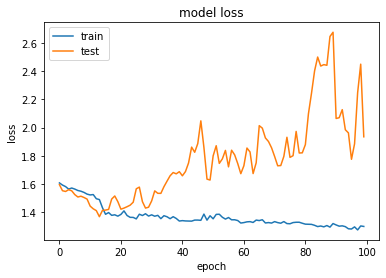

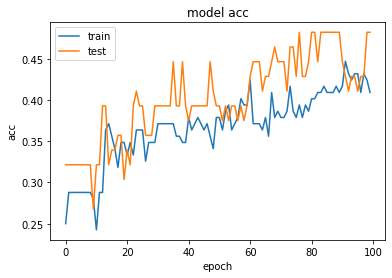

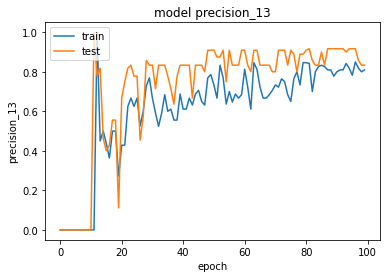

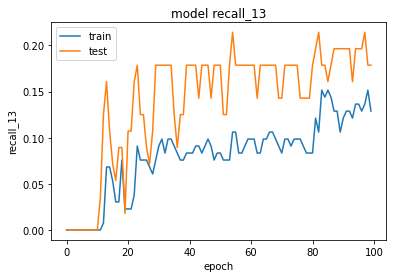

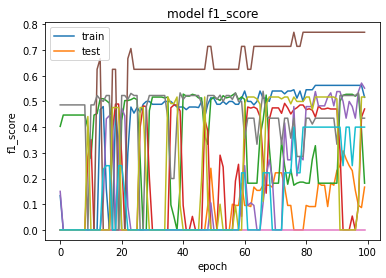

In [114]:

plot_hist(hist) 

In [115]:
model.evaluate(test_x_, test_y_)

1/2 [==============>...............] - ETA: 0s - loss: 2.2965 - acc: 0.6250 - precision_13: 0.8750 - recall_13: 0.2188 - f1_score: 0.5612

2/2 [==============================] - 0s 21ms/step - loss: 1.9347 - acc: 0.4821 - precision_13: 0.8333 - recall_13: 0.1786 - f1_score: 0.4243


[1.9347460269927979,
 0.4821428656578064,
 0.8333333134651184,
 0.1785714328289032,
 array([0.7692307 , 0.        , 0.43478262, 0.51724136, 0.4       ],
       dtype=float32)]